#### __Loading data from your Google Drive__

For loading a file on Colab - you can check the following two sites to get ideas:
* https://datascience.stackexchange.com/questions/29480/uploading-images-folder-from-my-system-into-google-colab
*  https://towardsdatascience.com/the-2-step-guide-to-upload-images-in-google-colab-b51348e882e4

You will load two files in this HW and both of those files are saved in .h5 format. Loading those files from your Google Drive uses the same logic as you used in your first HW to load images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


#**1 Dataset**

The dataset that you will use in this assignment is the cat identification dataset. The data set contains two classes: cat images and noncat images.  The entire data set comes in two files (one file contains allthe training images and another file contains all the test images). The training set (train.h5) contains 209 RGB images with 64x64 resolution and test set (test.h5) contains 50 RGB imagesof the same size. You can use the code snippet below to extract the images from each file:



```
import h5py

test = h5py.File('test.h5', 'r')
test_set_x = test['test_set_x']
test_set_y = test['test_set_y']

train = h5py.File('train.h5', 'r')
train_set_x = train['train_set_x']
train_set_y = train['train_set_y']
```



# **2 Assignment**

For computation and for practice (if needed), you can use Google Colab. In this HW, we have 3 parts. In Parts 1 and 2, you are NOT allowed to use Keras, Tensorflow or PyTorch. In Part 3, you must use KERAS.

## 2.1 (Part 1)

You will implement a binary classifier using logistic regression. In this part, you are NOT allowed to use KERAS, Tensorflow or PyTorch (you should use NumPy).

>The input to your classifier will be RGB image and the binary output will be the class label (whether the given image is cat or not).

>You will implement the pseudo-code that is described in the lecture slides: in Part1 and Part2 of Introduction to Deep Learning section for training. That pseudo-code is also given in Figure 1 for your convenience). There are two pseudo-codes given there: one for each image separately, and one for multiple images (the Matrix Form/Batch Form).

> You are asked to implement both of those above-mentioned pseudo codes individually.  You can use NumPy library (but you are NOT allowed to use KERAS, PyTorch, TensorFlow or any other similar library for this part).



*   Use all the training data to train your neuron (logistic regression unit) and to learn the optimal parameters. You need to train your algorithm for 100 epochs (set learning rate to 0.0001 for this step). Also report the accuracy.

*   Next, you are going to change learning rate value to figure out what learning value will work best for you. Find the optimal learning rate that works best for the training data. You need to train your algorithm for 100 epochs for at least 4 different learning values of your choice on the training data, and report all 4 accuracies obtained on the test data.   

*   Remember, the total number of epochs to be used, the initial values of w vector and b, the learning rate and other similar hyper-parameters has to be decided before training the algorithm. (Note: when you may need to go through more than one epoch, you will need to add additional loop to the pseudo-code given in the lecture slides).

*   Finally, you should repeat your training process without normalizing input images, compare your results with normalized version. Report how normalized images affect your results (in the text box below), if you obtain significant improvement or disimprovement, explain its reasons clearly.

*   Find the best learning rate for both of algorithm (normalized images and non-normalized images). Report what methods you followed.  



##### **Figure 1:** Backpropogation algorithms provided in the course slides. Iterative approach (left), Matrix operation approach (right)

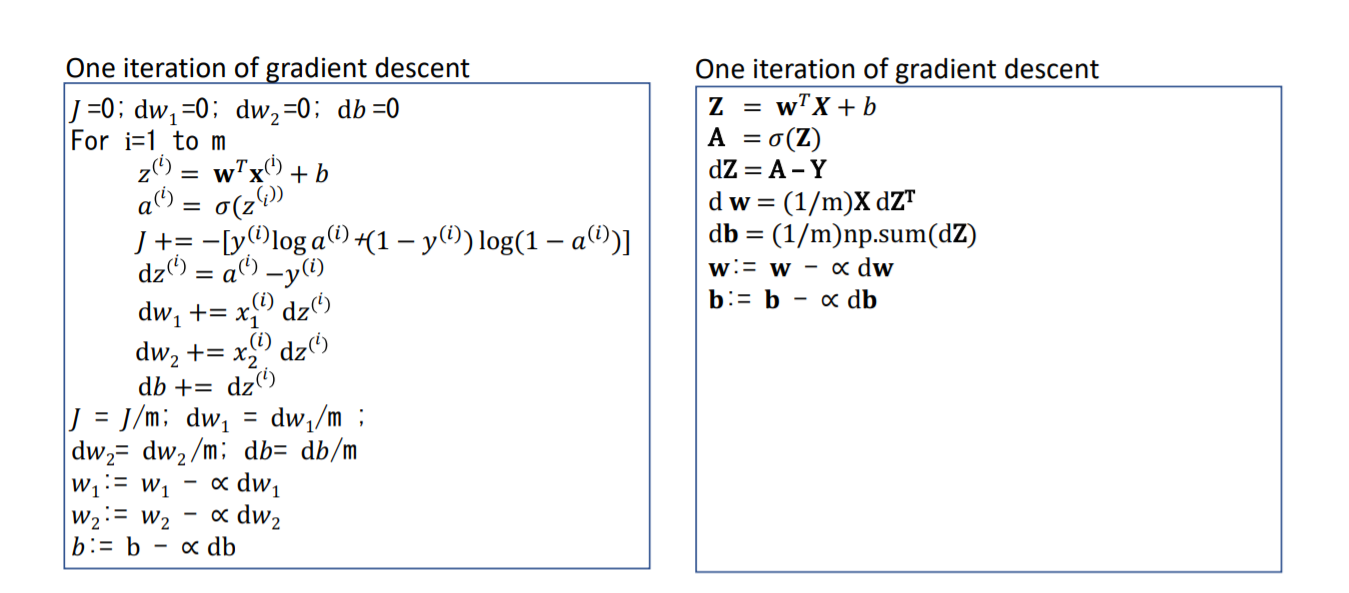

In [ ]:
# Note if you run this code without entering the correct image path according to your own Google Drive, you will not see the image below.
# You do NOT need to run the code in this cell. The image is already shown below.
from IPython.display import Image
Image('images/image1.png')


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define a function that loads your dataset. It should have flag indicating if the dataset is normalized.
test = h5py.File("test.h5", 'r')
#Convert 3-d images into 1-d by vectorizing the matrix
x_test = np.array(test['test_set_x']).reshape(50,-1)/255
y_test = np.array(test['test_set_y'])
train = h5py.File('train.h5', 'r')
x_train = np.array(train['train_set_x']).reshape(209,-1)/255
y_train = np.array(train['train_set_y'])

In [ ]:
def show_rand_batch(x,y):
    idx = np.random.permutation(len(x))[0:8]
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.imshow(x[idx[i]].reshape(64,64,3))
        temp = 'Label: ' + str(y[idx[i]])
        plt.title(temp)
        plt.axis('off')

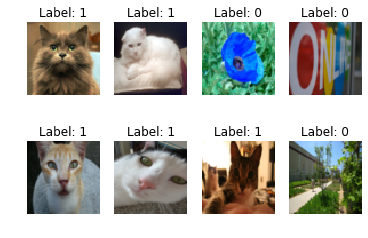

In [ ]:
# x_train, y_train, x_test, y_test = load_data()
show_rand_batch(x_train,y_train)

In [ ]:
# Define a function initializing your weights and bias, returns weights and bias in python dictionary
# Note that setting all the weights to zero is the worst approach to initialize. You may consider random initialiation instead!
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
# Implement the Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
# Define a function, takes the parameters of your architecture with python dictionary, returns updated version
# You can add additional arguments for given function
# Iterative approach, here implement iterative approach that goes over individual samples iteratively.
lrate = 0.01
loss = 0
for i in range(epoch):
    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)

        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)

        loss += np.nan_to_num(CE)

        dz = a - y_train[j]
        dw += x_train[j]*dz
        db += dz

    w = w - (lrate*dw/len(y_train))
    b = b - (lrate*db/len(y_train))
    loss_epoch_train = loss/len(y_train)

    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)
        pred[j] = np.round(a)

    loss = 0
    for j in range(len(y_test)):
        z = np.dot(w,x_test[j]) + b
        a = sigmoid(z)
        pred_test[j] = np.round(a)
        if y_test[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

    loss_epoch_test = loss/len(y_test)
    print('Epoch:', i+1, 'CE loss(Train):', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train)/len(y_train), 'CE loss(Test):', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test)/len(y_test))
    dw = np.zeros(w.shape)
    db = 0
    loss = 0

Epoch: 1 CE loss(Train): [4.95559137] Accuracy_Train: 0.6411483253588517 CE loss(Test): [3.73880768] Accuracy_Test: 0.36
Epoch: 2 CE loss(Train): [2.1444745] Accuracy_Train: 0.41626794258373206 CE loss(Test): [0.92671484] Accuracy_Test: 0.64
Epoch: 3 CE loss(Train): [1.43057529] Accuracy_Train: 0.6363636363636364 CE loss(Test): [3.23034881] Accuracy_Test: 0.36
Epoch: 4 CE loss(Train): [1.89960147] Accuracy_Train: 0.4258373205741627 CE loss(Test): [0.90248821] Accuracy_Test: 0.64
Epoch: 5 CE loss(Train): [1.53212422] Accuracy_Train: 0.645933014354067 CE loss(Test): [3.77516366] Accuracy_Test: 0.36
Epoch: 6 CE loss(Train): [2.14512454] Accuracy_Train: 0.430622009569378 CE loss(Test): [0.87553215] Accuracy_Test: 0.66
Epoch: 7 CE loss(Train): [1.36607519] Accuracy_Train: 0.6411483253588517 CE loss(Test): [3.23405356] Accuracy_Test: 0.36
Epoch: 8 CE loss(Train): [1.88403928] Accuracy_Train: 0.430622009569378 CE loss(Test): [0.86537679] Accuracy_Test: 0.66
Epoch: 9 CE loss(Train): [1.4955237

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
lrate = 0.0001

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)


    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)

    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)


    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train.reshape(-1,1))/len(y_train), 'CE loss:', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test.reshape(-1,1))/len(y_test))

Epoch: 1 CE loss: 2.336426145301329 Accuracy_Train: [0.35885167] CE loss: 1.3514462874881183 Accuracy_Test: [0.62]
Epoch: 2 CE loss: 2.279616076914909 Accuracy_Train: [0.36842105] CE loss: 1.3343401530944063 Accuracy_Test: [0.6]
Epoch: 3 CE loss: 2.224479863799262 Accuracy_Train: [0.36842105] CE loss: 1.3183554992258657 Accuracy_Test: [0.56]
Epoch: 4 CE loss: 2.1710586623164887 Accuracy_Train: [0.36363636] CE loss: 1.303509478335071 Accuracy_Test: [0.56]
Epoch: 5 CE loss: 2.1193878801420944 Accuracy_Train: [0.36363636] CE loss: 1.2898146304563647 Accuracy_Test: [0.56]
Epoch: 6 CE loss: 2.069496678953692 Accuracy_Train: [0.36842105] CE loss: 1.2772783564055918 Accuracy_Test: [0.56]
Epoch: 7 CE loss: 2.0214075554648443 Accuracy_Train: [0.37799043] CE loss: 1.2659024728471029 Accuracy_Test: [0.56]
Epoch: 8 CE loss: 1.9751360186217226 Accuracy_Train: [0.38277512] CE loss: 1.2556828775546578 Accuracy_Test: [0.56]
Epoch: 9 CE loss: 1.9306903771510087 Accuracy_Train: [0.38755981] CE loss: 1.2

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
lrate = 0.005

for i in range(epoch):
    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)

        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)

        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

        dz = a - y_train[j]
        dw += x_train[j]*dz
        db += dz

    w = w - (lrate*dw/len(y_train))
    b = b - (lrate*db/len(y_train))
    loss_epoch_train = loss/len(y_train)

    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)
        pred[j] = np.round(a)

    loss = 0
    for j in range(len(y_test)):
        z = np.dot(w,x_test[j]) + b
        a = sigmoid(z)
        pred_test[j] = np.round(a)
        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

    loss_epoch_test = loss/len(y_test)
    print('Epoch:', i+1, 'CE loss(Train):', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train)/len(y_train), 'CE loss(Test):', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test)/len(y_test))
    dw = np.zeros(w.shape)
    db = 0
    loss = 0

Epoch: 1 CE loss(Train): [4.56402261] Accuracy_Train: 0.5215311004784688 CE loss(Test): [1.69250482] Accuracy_Test: 0.44
Epoch: 2 CE loss(Train): [1.30497013] Accuracy_Train: 0.6076555023923444 CE loss(Test): [1.48907599] Accuracy_Test: 0.44
Epoch: 3 CE loss(Train): [1.05856884] Accuracy_Train: 0.5598086124401914 CE loss(Test): [1.45952581] Accuracy_Test: 0.4
Epoch: 4 CE loss(Train): [1.00165232] Accuracy_Train: 0.5885167464114832 CE loss(Test): [1.43728864] Accuracy_Test: 0.42
Epoch: 5 CE loss(Train): [0.98688747] Accuracy_Train: 0.583732057416268 CE loss(Test): [1.42797552] Accuracy_Test: 0.4
Epoch: 6 CE loss(Train): [0.97627342] Accuracy_Train: 0.5885167464114832 CE loss(Test): [1.41507756] Accuracy_Test: 0.42
Epoch: 7 CE loss(Train): [0.96683024] Accuracy_Train: 0.5885167464114832 CE loss(Test): [1.40486256] Accuracy_Test: 0.4
Epoch: 8 CE loss(Train): [0.95785192] Accuracy_Train: 0.5933014354066986 CE loss(Test): [1.39401369] Accuracy_Test: 0.4
Epoch: 9 CE loss(Train): [0.94920226]

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
lrate = 0.005

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)


    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)

    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)


    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train.reshape(-1,1))/len(y_train), 'CE loss:', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test.reshape(-1,1))/len(y_test))

Epoch: 1 CE loss: 2.7911336633828587 Accuracy_Train: [0.58373206] CE loss: 2.4169281319117366 Accuracy_Test: [0.22]
Epoch: 2 CE loss: 1.0579780949882565 Accuracy_Train: [0.50717703] CE loss: 1.9747185947653958 Accuracy_Test: [0.3]
Epoch: 3 CE loss: 1.0178753255601238 Accuracy_Train: [0.55980861] CE loss: 2.125702277847131 Accuracy_Test: [0.24]
Epoch: 4 CE loss: 1.0003141089895138 Accuracy_Train: [0.54545455] CE loss: 1.9980647187387488 Accuracy_Test: [0.28]
Epoch: 5 CE loss: 0.9861199773621359 Accuracy_Train: [0.55980861] CE loss: 2.0280102270898914 Accuracy_Test: [0.26]
Epoch: 6 CE loss: 0.9735635636005161 Accuracy_Train: [0.5645933] CE loss: 1.9726151525075821 Accuracy_Test: [0.26]
Epoch: 7 CE loss: 0.9618562442416251 Accuracy_Train: [0.55980861] CE loss: 1.9683926333314345 Accuracy_Test: [0.28]
Epoch: 8 CE loss: 0.9508036053119131 Accuracy_Train: [0.55023923] CE loss: 1.9357686895246535 Accuracy_Test: [0.28]
Epoch: 9 CE loss: 0.9403175441099085 Accuracy_Train: [0.55023923] CE loss: 

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 5000
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc1 = 0
acc2 = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)
loss_train = []
loss_test = []
acc_train = []
acc_test= []

In [ ]:
lrate = 0.005

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)
    loss_train.append(loss_epoch_train)

    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)
    acc1 = sum(pred == y_train.reshape(-1,1))/len(y_train)
    acc_train.append(acc1)


    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)
    loss_test.append(loss_epoch_test)
    acc2 = sum(pred_test == y_test.reshape(-1,1))/len(y_test)
    acc_test.append(acc2)

    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', acc1, 'CE loss:', loss_epoch_test, 'Accuracy_Test:', acc2)

Epoch: 1 CE loss: 1.1646189105290965 Accuracy_Train: [0.54066986] CE loss: 1.4915558238220712 Accuracy_Test: [0.42]
Epoch: 2 CE loss: 1.1386958302580479 Accuracy_Train: [0.54545455] CE loss: 1.5223433609565935 Accuracy_Test: [0.44]
Epoch: 3 CE loss: 1.1211616376640525 Accuracy_Train: [0.55023923] CE loss: 1.488029547593153 Accuracy_Test: [0.42]
Epoch: 4 CE loss: 1.1046421727436633 Accuracy_Train: [0.55502392] CE loss: 1.4747273379327277 Accuracy_Test: [0.42]
Epoch: 5 CE loss: 1.0887110653910144 Accuracy_Train: [0.55502392] CE loss: 1.4561242660834868 Accuracy_Test: [0.42]
Epoch: 6 CE loss: 1.0733226214977265 Accuracy_Train: [0.55980861] CE loss: 1.4404652996232834 Accuracy_Test: [0.42]
Epoch: 7 CE loss: 1.0584645306305507 Accuracy_Train: [0.56937799] CE loss: 1.4249744759279208 Accuracy_Test: [0.42]
Epoch: 8 CE loss: 1.044127187292592 Accuracy_Train: [0.5645933] CE loss: 1.4105696565205625 Accuracy_Test: [0.42]
Epoch: 9 CE loss: 1.030300913733518 Accuracy_Train: [0.55980861] CE loss: 1

Epoch: 94 CE loss: 0.6403334563517467 Accuracy_Train: [0.66985646] CE loss: 1.0520840957136404 Accuracy_Test: [0.34]
Epoch: 95 CE loss: 0.6384206084062133 Accuracy_Train: [0.66507177] CE loss: 1.0501242239644157 Accuracy_Test: [0.34]
Epoch: 96 CE loss: 0.6365257842713575 Accuracy_Train: [0.66028708] CE loss: 1.048187841751415 Accuracy_Test: [0.34]
Epoch: 97 CE loss: 0.6346486734520267 Accuracy_Train: [0.66028708] CE loss: 1.046274622520802 Accuracy_Test: [0.34]
Epoch: 98 CE loss: 0.632788973507548 Accuracy_Train: [0.66028708] CE loss: 1.04438423943215 Accuracy_Test: [0.34]
Epoch: 99 CE loss: 0.6309463897214624 Accuracy_Train: [0.66028708] CE loss: 1.0425163658695207 Accuracy_Test: [0.34]
Epoch: 100 CE loss: 0.6291206347933578 Accuracy_Train: [0.66028708] CE loss: 1.0406706759091156 Accuracy_Test: [0.34]
Epoch: 101 CE loss: 0.6273114285507633 Accuracy_Train: [0.66028708] CE loss: 1.0388468447459978 Accuracy_Test: [0.34]
Epoch: 102 CE loss: 0.6255184976792834 Accuracy_Train: [0.66028708]

Epoch: 190 CE loss: 0.510622569353593 Accuracy_Train: [0.76555024] CE loss: 0.9340860722023494 Accuracy_Test: [0.44]
Epoch: 191 CE loss: 0.5096486596902936 Accuracy_Train: [0.76555024] CE loss: 0.9333242870904841 Accuracy_Test: [0.44]
Epoch: 192 CE loss: 0.5086798942143688 Accuracy_Train: [0.76555024] CE loss: 0.9325684108314971 Accuracy_Test: [0.44]
Epoch: 193 CE loss: 0.5077162217685335 Accuracy_Train: [0.77033493] CE loss: 0.9318183755223656 Accuracy_Test: [0.44]
Epoch: 194 CE loss: 0.5067575919433045 Accuracy_Train: [0.77033493] CE loss: 0.9310741144154508 Accuracy_Test: [0.44]
Epoch: 195 CE loss: 0.5058039550632772 Accuracy_Train: [0.77033493] CE loss: 0.9303355618937532 Accuracy_Test: [0.44]
Epoch: 196 CE loss: 0.5048552621737115 Accuracy_Train: [0.77033493] CE loss: 0.9296026534467103 Accuracy_Test: [0.44]
Epoch: 197 CE loss: 0.5039114650274144 Accuracy_Train: [0.76555024] CE loss: 0.9288753256465454 Accuracy_Test: [0.44]
Epoch: 198 CE loss: 0.5029725160719184 Accuracy_Train: [0

Epoch: 281 CE loss: 0.4383623345145395 Accuracy_Train: [0.80861244] CE loss: 0.8829441511710617 Accuracy_Test: [0.48]
Epoch: 282 CE loss: 0.43771152535084057 Accuracy_Train: [0.80861244] CE loss: 0.8825360386130106 Accuracy_Test: [0.48]
Epoch: 283 CE loss: 0.43706315649664895 Accuracy_Train: [0.80861244] CE loss: 0.8821304555333909 Accuracy_Test: [0.48]
Epoch: 284 CE loss: 0.43641721175968723 Accuracy_Train: [0.80861244] CE loss: 0.8817273826695556 Accuracy_Test: [0.48]
Epoch: 285 CE loss: 0.4357736751204131 Accuracy_Train: [0.80861244] CE loss: 0.8813268009717177 Accuracy_Test: [0.48]
Epoch: 286 CE loss: 0.4351325307295317 Accuracy_Train: [0.80861244] CE loss: 0.8809286915997943 Accuracy_Test: [0.48]
Epoch: 287 CE loss: 0.43449376290554403 Accuracy_Train: [0.80861244] CE loss: 0.8805330359203287 Accuracy_Test: [0.48]
Epoch: 288 CE loss: 0.4338573561323383 Accuracy_Train: [0.80861244] CE loss: 0.8801398155034671 Accuracy_Test: [0.48]
Epoch: 289 CE loss: 0.4332232950568165 Accuracy_Trai

Epoch: 373 CE loss: 0.38705321674344567 Accuracy_Train: [0.84688995] CE loss: 0.8540411392655013 Accuracy_Test: [0.54]
Epoch: 374 CE loss: 0.3865754337083139 Accuracy_Train: [0.84688995] CE loss: 0.853805287104622 Accuracy_Test: [0.54]
Epoch: 375 CE loss: 0.38609909669016484 Accuracy_Train: [0.84688995] CE loss: 0.8535708084349867 Accuracy_Test: [0.54]
Epoch: 376 CE loss: 0.3856241985467534 Accuracy_Train: [0.84688995] CE loss: 0.853337695375243 Accuracy_Test: [0.54]
Epoch: 377 CE loss: 0.3851507321868635 Accuracy_Train: [0.84688995] CE loss: 0.853105940111891 Accuracy_Test: [0.54]
Epoch: 378 CE loss: 0.3846786905697229 Accuracy_Train: [0.84688995] CE loss: 0.852875534898558 Accuracy_Test: [0.54]
Epoch: 379 CE loss: 0.3842080667044291 Accuracy_Train: [0.84688995] CE loss: 0.8526464720552747 Accuracy_Test: [0.54]
Epoch: 380 CE loss: 0.383738853649383 Accuracy_Train: [0.84688995] CE loss: 0.8524187439677653 Accuracy_Test: [0.54]
Epoch: 381 CE loss: 0.3832710445117315 Accuracy_Train: [0.8

Epoch: 465 CE loss: 0.34837258727657877 Accuracy_Train: [0.8708134] CE loss: 0.8372613875414514 Accuracy_Test: [0.58]
Epoch: 466 CE loss: 0.34800308050625905 Accuracy_Train: [0.8708134] CE loss: 0.837125739108413 Accuracy_Test: [0.58]
Epoch: 467 CE loss: 0.34763452271114365 Accuracy_Train: [0.8708134] CE loss: 0.836990950722189 Accuracy_Test: [0.58]
Epoch: 468 CE loss: 0.34726690983114333 Accuracy_Train: [0.8708134] CE loss: 0.8368570185080816 Accuracy_Test: [0.58]
Epoch: 469 CE loss: 0.3469002378283004 Accuracy_Train: [0.8708134] CE loss: 0.8367239386171199 Accuracy_Test: [0.58]
Epoch: 470 CE loss: 0.34653450268663866 Accuracy_Train: [0.87559809] CE loss: 0.8365917072258061 Accuracy_Test: [0.58]
Epoch: 471 CE loss: 0.3461697004120145 Accuracy_Train: [0.87559809] CE loss: 0.8364603205358381 Accuracy_Test: [0.58]
Epoch: 472 CE loss: 0.3458058270319693 Accuracy_Train: [0.87559809] CE loss: 0.8363297747738659 Accuracy_Test: [0.58]
Epoch: 473 CE loss: 0.34544287859558404 Accuracy_Train: [0

Epoch: 557 CE loss: 0.31789596050809954 Accuracy_Train: [0.87559809] CE loss: 0.8279561078994118 Accuracy_Test: [0.58]
Epoch: 558 CE loss: 0.31759919020854094 Accuracy_Train: [0.87559809] CE loss: 0.8278859860502357 Accuracy_Test: [0.58]
Epoch: 559 CE loss: 0.3173030727538031 Accuracy_Train: [0.87559809] CE loss: 0.8278164494252086 Accuracy_Test: [0.58]
Epoch: 560 CE loss: 0.3170076056428308 Accuracy_Train: [0.87559809] CE loss: 0.827747495717893 Accuracy_Test: [0.58]
Epoch: 561 CE loss: 0.3167127863873906 Accuracy_Train: [0.87559809] CE loss: 0.8276791226328046 Accuracy_Test: [0.58]
Epoch: 562 CE loss: 0.31641861251199993 Accuracy_Train: [0.87559809] CE loss: 0.8276113278853289 Accuracy_Test: [0.58]
Epoch: 563 CE loss: 0.3161250815538548 Accuracy_Train: [0.87559809] CE loss: 0.8275441092016286 Accuracy_Test: [0.58]
Epoch: 564 CE loss: 0.3158321910627614 Accuracy_Train: [0.87559809] CE loss: 0.8274774643185755 Accuracy_Test: [0.58]
Epoch: 565 CE loss: 0.31553993860106466 Accuracy_Train

Epoch: 648 CE loss: 0.29329061369591986 Accuracy_Train: [0.88995215] CE loss: 0.8237172626212225 Accuracy_Test: [0.58]
Epoch: 649 CE loss: 0.29304439397535875 Accuracy_Train: [0.88995215] CE loss: 0.8236920970621174 Accuracy_Test: [0.58]
Epoch: 650 CE loss: 0.29279864427304847 Accuracy_Train: [0.88995215] CE loss: 0.8236673436929016 Accuracy_Test: [0.58]
Epoch: 651 CE loss: 0.29255336300372914 Accuracy_Train: [0.88995215] CE loss: 0.8236430009548614 Accuracy_Test: [0.58]
Epoch: 652 CE loss: 0.29230854858980043 Accuracy_Train: [0.88995215] CE loss: 0.8236190672955026 Accuracy_Test: [0.58]
Epoch: 653 CE loss: 0.29206419946127854 Accuracy_Train: [0.88995215] CE loss: 0.8235955411685313 Accuracy_Test: [0.58]
Epoch: 654 CE loss: 0.29182031405575287 Accuracy_Train: [0.88995215] CE loss: 0.8235724210338107 Accuracy_Test: [0.58]
Epoch: 655 CE loss: 0.29157689081834043 Accuracy_Train: [0.88995215] CE loss: 0.8235497053573421 Accuracy_Test: [0.58]
Epoch: 656 CE loss: 0.29133392820164555 Accuracy

Epoch: 737 CE loss: 0.2730546387910921 Accuracy_Train: [0.90430622] CE loss: 0.8229286953657237 Accuracy_Test: [0.6]
Epoch: 738 CE loss: 0.2728448151945463 Accuracy_Train: [0.90430622] CE loss: 0.8229347512887009 Accuracy_Test: [0.6]
Epoch: 739 CE loss: 0.27263534610054485 Accuracy_Train: [0.90430622] CE loss: 0.8229411020566623 Accuracy_Test: [0.6]
Epoch: 740 CE loss: 0.2724262304592659 Accuracy_Train: [0.90430622] CE loss: 0.8229477465665503 Accuracy_Test: [0.6]
Epoch: 741 CE loss: 0.27221746722549583 Accuracy_Train: [0.90430622] CE loss: 0.8229546837194974 Accuracy_Test: [0.6]
Epoch: 742 CE loss: 0.2720090553586023 Accuracy_Train: [0.90430622] CE loss: 0.8229619124208114 Accuracy_Test: [0.6]
Epoch: 743 CE loss: 0.2718009938225092 Accuracy_Train: [0.90430622] CE loss: 0.8229694315799557 Accuracy_Test: [0.6]
Epoch: 744 CE loss: 0.27159328158567114 Accuracy_Train: [0.90430622] CE loss: 0.8229772401105327 Accuracy_Test: [0.6]
Epoch: 745 CE loss: 0.2713859176210482 Accuracy_Train: [0.904

Epoch: 824 CE loss: 0.25602428363071905 Accuracy_Train: [0.92344498] CE loss: 0.8244503894583048 Accuracy_Test: [0.6]
Epoch: 825 CE loss: 0.25584181087050456 Accuracy_Train: [0.92344498] CE loss: 0.8244783791291246 Accuracy_Test: [0.6]
Epoch: 826 CE loss: 0.25565961610832605 Accuracy_Train: [0.92344498] CE loss: 0.8245065817021633 Accuracy_Test: [0.6]
Epoch: 827 CE loss: 0.25547769861387815 Accuracy_Train: [0.92344498] CE loss: 0.8245349963824137 Accuracy_Test: [0.6]
Epoch: 828 CE loss: 0.2552960576597318 Accuracy_Train: [0.92344498] CE loss: 0.8245636223778223 Accuracy_Test: [0.6]
Epoch: 829 CE loss: 0.25511469252131563 Accuracy_Train: [0.92344498] CE loss: 0.8245924588992797 Accuracy_Test: [0.6]
Epoch: 830 CE loss: 0.2549336024769049 Accuracy_Train: [0.92344498] CE loss: 0.8246215051606116 Accuracy_Test: [0.6]
Epoch: 831 CE loss: 0.2547527868076048 Accuracy_Train: [0.92344498] CE loss: 0.8246507603785641 Accuracy_Test: [0.6]
Epoch: 832 CE loss: 0.2545722447973359 Accuracy_Train: [0.9

Epoch: 911 CE loss: 0.24111762611945425 Accuracy_Train: [0.93779904] CE loss: 0.8276038644241317 Accuracy_Test: [0.58]
Epoch: 912 CE loss: 0.24095688172594404 Accuracy_Train: [0.93779904] CE loss: 0.8276476915710806 Accuracy_Test: [0.58]
Epoch: 913 CE loss: 0.24079636115092484 Accuracy_Train: [0.93779904] CE loss: 0.8276916723792535 Accuracy_Test: [0.58]
Epoch: 914 CE loss: 0.24063606386690728 Accuracy_Train: [0.93779904] CE loss: 0.8277358062719187 Accuracy_Test: [0.58]
Epoch: 915 CE loss: 0.2404759893482657 Accuracy_Train: [0.93779904] CE loss: 0.8277800926744461 Accuracy_Test: [0.58]
Epoch: 916 CE loss: 0.24031613707123078 Accuracy_Train: [0.93779904] CE loss: 0.8278245310143005 Accuracy_Test: [0.58]
Epoch: 917 CE loss: 0.24015650651387904 Accuracy_Train: [0.93779904] CE loss: 0.82786912072103 Accuracy_Test: [0.58]
Epoch: 918 CE loss: 0.23999709715612574 Accuracy_Train: [0.93779904] CE loss: 0.8279138612262623 Accuracy_Test: [0.58]
Epoch: 919 CE loss: 0.23983790847971506 Accuracy_Tr

Epoch: 1003 CE loss: 0.22720461307923437 Accuracy_Train: [0.94736842] CE loss: 0.832212254966891 Accuracy_Test: [0.58]
Epoch: 1004 CE loss: 0.22706246368271563 Accuracy_Train: [0.94736842] CE loss: 0.8322680473775199 Accuracy_Test: [0.58]
Epoch: 1005 CE loss: 0.2269204963998315 Accuracy_Train: [0.94736842] CE loss: 0.8323239482473045 Accuracy_Test: [0.58]
Epoch: 1006 CE loss: 0.22677871084327358 Accuracy_Train: [0.94736842] CE loss: 0.8323799571624424 Accuracy_Test: [0.58]
Epoch: 1007 CE loss: 0.22663710662696335 Accuracy_Train: [0.94736842] CE loss: 0.8324360737106002 Accuracy_Test: [0.58]
Epoch: 1008 CE loss: 0.22649568336604772 Accuracy_Train: [0.94736842] CE loss: 0.8324922974809169 Accuracy_Test: [0.58]
Epoch: 1009 CE loss: 0.22635444067689384 Accuracy_Train: [0.94736842] CE loss: 0.8325486280639844 Accuracy_Test: [0.58]
Epoch: 1010 CE loss: 0.22621337817708323 Accuracy_Train: [0.94736842] CE loss: 0.8326050650518577 Accuracy_Test: [0.58]
Epoch: 1011 CE loss: 0.226072495485407 Acc

Epoch: 1095 CE loss: 0.214843755599689 Accuracy_Train: [0.9569378] CE loss: 0.8377510526346326 Accuracy_Test: [0.58]
Epoch: 1096 CE loss: 0.2147168804460471 Accuracy_Train: [0.9569378] CE loss: 0.837815261265754 Accuracy_Test: [0.58]
Epoch: 1097 CE loss: 0.21459015633319115 Accuracy_Train: [0.9569378] CE loss: 0.837879545799139 Accuracy_Test: [0.58]
Epoch: 1098 CE loss: 0.21446358296804469 Accuracy_Train: [0.9569378] CE loss: 0.8379439059354198 Accuracy_Test: [0.58]
Epoch: 1099 CE loss: 0.21433716005837583 Accuracy_Train: [0.9569378] CE loss: 0.8380083413762621 Accuracy_Test: [0.58]
Epoch: 1100 CE loss: 0.21421088731279256 Accuracy_Train: [0.9569378] CE loss: 0.8380728518243683 Accuracy_Test: [0.58]
Epoch: 1101 CE loss: 0.21408476444074134 Accuracy_Train: [0.9569378] CE loss: 0.8381374369834697 Accuracy_Test: [0.58]
Epoch: 1102 CE loss: 0.21395879115250244 Accuracy_Train: [0.9569378] CE loss: 0.8382020965583249 Accuracy_Test: [0.58]
Epoch: 1103 CE loss: 0.2138329671591873 Accuracy_Trai

Epoch: 1177 CE loss: 0.2049170365174888 Accuracy_Train: [0.96172249] CE loss: 0.8432434335651009 Accuracy_Test: [0.62]
Epoch: 1178 CE loss: 0.20480164280859522 Accuracy_Train: [0.96172249] CE loss: 0.8433129574660686 Accuracy_Test: [0.62]
Epoch: 1179 CE loss: 0.2046863786458502 Accuracy_Train: [0.96172249] CE loss: 0.8433825358479694 Accuracy_Test: [0.62]
Epoch: 1180 CE loss: 0.20457124379574163 Accuracy_Train: [0.96172249] CE loss: 0.8434521684848733 Accuracy_Test: [0.62]
Epoch: 1181 CE loss: 0.20445623802537635 Accuracy_Train: [0.96172249] CE loss: 0.8435218551516137 Accuracy_Test: [0.62]
Epoch: 1182 CE loss: 0.2043413611024798 Accuracy_Train: [0.96172249] CE loss: 0.8435915956237878 Accuracy_Test: [0.62]
Epoch: 1183 CE loss: 0.2042266127953932 Accuracy_Train: [0.96172249] CE loss: 0.8436613896777494 Accuracy_Test: [0.62]
Epoch: 1184 CE loss: 0.20411199287307202 Accuracy_Train: [0.96172249] CE loss: 0.8437312370906137 Accuracy_Test: [0.62]
Epoch: 1185 CE loss: 0.20399750110508202 Acc

Epoch: 1265 CE loss: 0.19523403208646284 Accuracy_Train: [0.96172249] CE loss: 0.8495469771214533 Accuracy_Test: [0.64]
Epoch: 1266 CE loss: 0.19512920777693035 Accuracy_Train: [0.96172249] CE loss: 0.8496205083134711 Accuracy_Test: [0.64]
Epoch: 1267 CE loss: 0.19502449461524027 Accuracy_Train: [0.96172249] CE loss: 0.8496940767498825 Accuracy_Test: [0.64]
Epoch: 1268 CE loss: 0.19491989241490326 Accuracy_Train: [0.96172249] CE loss: 0.8497676822624749 Accuracy_Test: [0.64]
Epoch: 1269 CE loss: 0.19481540098988734 Accuracy_Train: [0.96172249] CE loss: 0.8498413246835907 Accuracy_Test: [0.64]
Epoch: 1270 CE loss: 0.19471102015461567 Accuracy_Train: [0.96172249] CE loss: 0.84991500384613 Accuracy_Test: [0.64]
Epoch: 1271 CE loss: 0.19460674972396602 Accuracy_Train: [0.96172249] CE loss: 0.8499887195835432 Accuracy_Test: [0.64]
Epoch: 1272 CE loss: 0.19450258951326801 Accuracy_Train: [0.96172249] CE loss: 0.8500624717298305 Accuracy_Test: [0.64]
Epoch: 1273 CE loss: 0.19439853933830223 A

Epoch: 1353 CE loss: 0.18641551154696068 Accuracy_Train: [0.96172249] CE loss: 0.8561430584185742 Accuracy_Test: [0.62]
Epoch: 1354 CE loss: 0.18631980120190547 Accuracy_Train: [0.96172249] CE loss: 0.856219279923165 Accuracy_Test: [0.62]
Epoch: 1355 CE loss: 0.1862241871897783 Accuracy_Train: [0.96172249] CE loss: 0.8562955257988095 Accuracy_Test: [0.62]
Epoch: 1356 CE loss: 0.18612866935911349 Accuracy_Train: [0.96172249] CE loss: 0.8563717959194552 Accuracy_Test: [0.62]
Epoch: 1357 CE loss: 0.18603324755878942 Accuracy_Train: [0.96172249] CE loss: 0.8564480901594554 Accuracy_Test: [0.62]
Epoch: 1358 CE loss: 0.18593792163802786 Accuracy_Train: [0.96172249] CE loss: 0.8565244083935736 Accuracy_Test: [0.62]
Epoch: 1359 CE loss: 0.1858426914463926 Accuracy_Train: [0.96172249] CE loss: 0.8566007504969819 Accuracy_Test: [0.62]
Epoch: 1360 CE loss: 0.18574755683378902 Accuracy_Train: [0.96172249] CE loss: 0.8566771163452487 Accuracy_Test: [0.62]
Epoch: 1361 CE loss: 0.18565251765046237 Ac

Epoch: 1442 CE loss: 0.1782581285014052 Accuracy_Train: [0.96172249] CE loss: 0.8630088361893264 Accuracy_Test: [0.62]
Epoch: 1443 CE loss: 0.1781704353206231 Accuracy_Train: [0.96172249] CE loss: 0.8630867762555221 Accuracy_Test: [0.62]
Epoch: 1444 CE loss: 0.17808282622949537 Accuracy_Train: [0.96172249] CE loss: 0.8631647309259763 Accuracy_Test: [0.62]
Epoch: 1445 CE loss: 0.1779953011034686 Accuracy_Train: [0.96172249] CE loss: 0.8632427001060353 Accuracy_Test: [0.62]
Epoch: 1446 CE loss: 0.17790785981825313 Accuracy_Train: [0.96172249] CE loss: 0.8633206837013425 Accuracy_Test: [0.62]
Epoch: 1447 CE loss: 0.17782050224982332 Accuracy_Train: [0.96172249] CE loss: 0.8633986816178526 Accuracy_Test: [0.62]
Epoch: 1448 CE loss: 0.17773322827441523 Accuracy_Train: [0.96172249] CE loss: 0.8634766937618089 Accuracy_Test: [0.62]
Epoch: 1449 CE loss: 0.17764603776852703 Accuracy_Train: [0.96172249] CE loss: 0.8635547200397585 Accuracy_Test: [0.62]
Epoch: 1450 CE loss: 0.17755893060891748 Ac

Epoch: 1534 CE loss: 0.17052741593852833 Accuracy_Train: [0.96172249] CE loss: 0.8702293654323481 Accuracy_Test: [0.62]
Epoch: 1535 CE loss: 0.1704469687851258 Accuracy_Train: [0.96172249] CE loss: 0.8703082881326993 Accuracy_Test: [0.62]
Epoch: 1536 CE loss: 0.17036659527941084 Accuracy_Train: [0.96172249] CE loss: 0.8703872178759035 Accuracy_Test: [0.62]
Epoch: 1537 CE loss: 0.17028629531825695 Accuracy_Train: [0.96172249] CE loss: 0.8704661545912938 Accuracy_Test: [0.62]
Epoch: 1538 CE loss: 0.17020606879874214 Accuracy_Train: [0.96172249] CE loss: 0.87054509820842 Accuracy_Test: [0.62]
Epoch: 1539 CE loss: 0.1701259156181483 Accuracy_Train: [0.96172249] CE loss: 0.8706240486570569 Accuracy_Test: [0.62]
Epoch: 1540 CE loss: 0.1700458356739604 Accuracy_Train: [0.96172249] CE loss: 0.8707030058672054 Accuracy_Test: [0.62]
Epoch: 1541 CE loss: 0.16996582886386657 Accuracy_Train: [0.96172249] CE loss: 0.8707819697690763 Accuracy_Test: [0.62]
Epoch: 1542 CE loss: 0.16988589508575688 Accu

Epoch: 1630 CE loss: 0.16312623514179322 Accuracy_Train: [0.96172249] CE loss: 0.8778286620805522 Accuracy_Test: [0.62]
Epoch: 1631 CE loss: 0.16305241540281526 Accuracy_Train: [0.96172249] CE loss: 0.877907968271398 Accuracy_Test: [0.62]
Epoch: 1632 CE loss: 0.1629786602709788 Accuracy_Train: [0.96172249] CE loss: 0.8779872756432111 Accuracy_Test: [0.62]
Epoch: 1633 CE loss: 0.16290496966052606 Accuracy_Train: [0.96172249] CE loss: 0.8780665841437977 Accuracy_Test: [0.62]
Epoch: 1634 CE loss: 0.16283134348585931 Accuracy_Train: [0.96172249] CE loss: 0.8781458937211236 Accuracy_Test: [0.62]
Epoch: 1635 CE loss: 0.1627577816615393 Accuracy_Train: [0.96172249] CE loss: 0.8782252043233184 Accuracy_Test: [0.62]
Epoch: 1636 CE loss: 0.16268428410228605 Accuracy_Train: [0.96172249] CE loss: 0.8783045158986766 Accuracy_Test: [0.62]
Epoch: 1637 CE loss: 0.16261085072297687 Accuracy_Train: [0.96172249] CE loss: 0.8783838283956601 Accuracy_Test: [0.62]
Epoch: 1638 CE loss: 0.1625374814386475 Acc

Epoch: 1726 CE loss: 0.15632240198310185 Accuracy_Train: [0.96650718] CE loss: 0.885440500239437 Accuracy_Test: [0.64]
Epoch: 1727 CE loss: 0.15625441499873402 Accuracy_Train: [0.96650718] CE loss: 0.8855197036813318 Accuracy_Test: [0.64]
Epoch: 1728 CE loss: 0.15618648506261965 Accuracy_Train: [0.96650718] CE loss: 0.8855989039754489 Accuracy_Test: [0.64]
Epoch: 1729 CE loss: 0.15611861210265263 Accuracy_Train: [0.96650718] CE loss: 0.8856781010832744 Accuracy_Test: [0.64]
Epoch: 1730 CE loss: 0.15605079604685365 Accuracy_Train: [0.96650718] CE loss: 0.8857572949664135 Accuracy_Test: [0.64]
Epoch: 1731 CE loss: 0.155983036823369 Accuracy_Train: [0.96650718] CE loss: 0.8858364855865968 Accuracy_Test: [0.64]
Epoch: 1732 CE loss: 0.1559153343604711 Accuracy_Train: [0.96650718] CE loss: 0.8859156729056772 Accuracy_Test: [0.64]
Epoch: 1733 CE loss: 0.15584768858655734 Accuracy_Train: [0.96650718] CE loss: 0.885994856885627 Accuracy_Test: [0.64]
Epoch: 1734 CE loss: 0.15578009943015075 Accu

Epoch: 1822 CE loss: 0.15004589141064392 Accuracy_Train: [0.97129187] CE loss: 0.8930245590242468 Accuracy_Test: [0.64]
Epoch: 1823 CE loss: 0.14998306937527522 Accuracy_Train: [0.97129187] CE loss: 0.8931033009884436 Accuracy_Test: [0.64]
Epoch: 1824 CE loss: 0.14992029800259243 Accuracy_Train: [0.97129187] CE loss: 0.8931820366167215 Accuracy_Test: [0.64]
Epoch: 1825 CE loss: 0.14985757723138637 Accuracy_Train: [0.97129187] CE loss: 0.8932607658807947 Accuracy_Test: [0.64]
Epoch: 1826 CE loss: 0.14979490700054962 Accuracy_Train: [0.97129187] CE loss: 0.8933394887524662 Accuracy_Test: [0.64]
Epoch: 1827 CE loss: 0.14973228724907608 Accuracy_Train: [0.97607656] CE loss: 0.893418205203637 Accuracy_Test: [0.64]
Epoch: 1828 CE loss: 0.14966971791606096 Accuracy_Train: [0.97607656] CE loss: 0.893496915206298 Accuracy_Test: [0.64]
Epoch: 1829 CE loss: 0.1496071989406999 Accuracy_Train: [0.97607656] CE loss: 0.8935756187325176 Accuracy_Test: [0.64]
Epoch: 1830 CE loss: 0.14954473026228984 Ac

Epoch: 1918 CE loss: 0.14423757669017045 Accuracy_Train: [0.97607656] CE loss: 0.9005511438327821 Accuracy_Test: [0.64]
Epoch: 1919 CE loss: 0.1441793529687948 Accuracy_Train: [0.97607656] CE loss: 0.9006291608484205 Accuracy_Test: [0.64]
Epoch: 1920 CE loss: 0.14412117446732886 Accuracy_Train: [0.97607656] CE loss: 0.90070716919587 Accuracy_Test: [0.64]
Epoch: 1921 CE loss: 0.14406304113338037 Accuracy_Train: [0.97607656] CE loss: 0.9007851688545477 Accuracy_Test: [0.64]
Epoch: 1922 CE loss: 0.14400495291464058 Accuracy_Train: [0.97607656] CE loss: 0.900863159803945 Accuracy_Test: [0.64]
Epoch: 1923 CE loss: 0.14394690975888275 Accuracy_Train: [0.97607656] CE loss: 0.9009411420236222 Accuracy_Test: [0.64]
Epoch: 1924 CE loss: 0.14388891161396244 Accuracy_Train: [0.97607656] CE loss: 0.9010191154932033 Accuracy_Test: [0.64]
Epoch: 1925 CE loss: 0.14383095842781818 Accuracy_Train: [0.97607656] CE loss: 0.9010970801923811 Accuracy_Test: [0.64]
Epoch: 1926 CE loss: 0.14377305014846942 Acc

Epoch: 2013 CE loss: 0.1389012320526915 Accuracy_Train: [0.98086124] CE loss: 0.9079214183391244 Accuracy_Test: [0.64]
Epoch: 2014 CE loss: 0.13884708122318234 Accuracy_Train: [0.98086124] CE loss: 0.9079985290005129 Accuracy_Test: [0.64]
Epoch: 2015 CE loss: 0.13879297098336688 Accuracy_Train: [0.98086124] CE loss: 0.9080756293230161 Accuracy_Test: [0.64]
Epoch: 2016 CE loss: 0.13873890128800467 Accuracy_Train: [0.98086124] CE loss: 0.9081527192918459 Accuracy_Test: [0.64]
Epoch: 2017 CE loss: 0.13868487209192437 Accuracy_Train: [0.98086124] CE loss: 0.9082297988922617 Accuracy_Test: [0.64]
Epoch: 2018 CE loss: 0.13863088335002194 Accuracy_Train: [0.98086124] CE loss: 0.9083068681095717 Accuracy_Test: [0.64]
Epoch: 2019 CE loss: 0.138576935017262 Accuracy_Train: [0.98086124] CE loss: 0.9083839269291499 Accuracy_Test: [0.64]
Epoch: 2020 CE loss: 0.1385230270486767 Accuracy_Train: [0.98086124] CE loss: 0.9084609753364131 Accuracy_Test: [0.64]
Epoch: 2021 CE loss: 0.13846915939936583 Acc

Epoch: 2110 CE loss: 0.13383114521694817 Accuracy_Train: [0.98086124] CE loss: 0.9153510080372323 Accuracy_Test: [0.64]
Epoch: 2111 CE loss: 0.1337807305710298 Accuracy_Train: [0.98086124] CE loss: 0.9154270542744968 Accuracy_Test: [0.64]
Epoch: 2112 CE loss: 0.1337303524256825 Accuracy_Train: [0.98086124] CE loss: 0.9155030889640803 Accuracy_Test: [0.64]
Epoch: 2113 CE loss: 0.13368001074170935 Accuracy_Train: [0.98086124] CE loss: 0.915579112095699 Accuracy_Test: [0.64]
Epoch: 2114 CE loss: 0.13362970547997002 Accuracy_Train: [0.98086124] CE loss: 0.9156551236591028 Accuracy_Test: [0.64]
Epoch: 2115 CE loss: 0.13357943660138066 Accuracy_Train: [0.98086124] CE loss: 0.915731123644082 Accuracy_Test: [0.64]
Epoch: 2116 CE loss: 0.133529204066914 Accuracy_Train: [0.98086124] CE loss: 0.9158071120404643 Accuracy_Test: [0.64]
Epoch: 2117 CE loss: 0.13347900783759883 Accuracy_Train: [0.98086124] CE loss: 0.915883088838124 Accuracy_Test: [0.64]
Epoch: 2118 CE loss: 0.13342884787452056 Accura

Epoch: 2206 CE loss: 0.12915236333191935 Accuracy_Train: [0.98564593] CE loss: 0.922597446545684 Accuracy_Test: [0.64]
Epoch: 2207 CE loss: 0.12910528176149333 Accuracy_Train: [0.98564593] CE loss: 0.9226723426898586 Accuracy_Test: [0.64]
Epoch: 2208 CE loss: 0.12905823317276968 Accuracy_Train: [0.98564593] CE loss: 0.9227472264673083 Accuracy_Test: [0.64]
Epoch: 2209 CE loss: 0.12901121753154188 Accuracy_Train: [0.98564593] CE loss: 0.922822097871129 Accuracy_Test: [0.64]
Epoch: 2210 CE loss: 0.12896423480365052 Accuracy_Train: [0.98564593] CE loss: 0.9228969568944717 Accuracy_Test: [0.64]
Epoch: 2211 CE loss: 0.1289172849549836 Accuracy_Train: [0.98564593] CE loss: 0.9229718035304981 Accuracy_Test: [0.64]
Epoch: 2212 CE loss: 0.1288703679514768 Accuracy_Train: [0.98564593] CE loss: 0.9230466377724224 Accuracy_Test: [0.64]
Epoch: 2213 CE loss: 0.1288234837591131 Accuracy_Train: [0.98564593] CE loss: 0.9231214596134667 Accuracy_Test: [0.64]
Epoch: 2214 CE loss: 0.1287766323439223 Accur

Epoch: 2302 CE loss: 0.1247781945659383 Accuracy_Train: [0.99043062] CE loss: 0.929730197009171 Accuracy_Test: [0.64]
Epoch: 2303 CE loss: 0.12473412977728934 Accuracy_Train: [0.99043062] CE loss: 0.9298038786621398 Accuracy_Test: [0.64]
Epoch: 2304 CE loss: 0.12469009489173533 Accuracy_Train: [0.99043062] CE loss: 0.9298775474160142 Accuracy_Test: [0.64]
Epoch: 2305 CE loss: 0.12464608987927159 Accuracy_Train: [0.99043062] CE loss: 0.9299512032665068 Accuracy_Test: [0.64]
Epoch: 2306 CE loss: 0.12460211470993393 Accuracy_Train: [0.99043062] CE loss: 0.9300248462093421 Accuracy_Test: [0.64]
Epoch: 2307 CE loss: 0.12455816935379756 Accuracy_Train: [0.99043062] CE loss: 0.930098476240289 Accuracy_Test: [0.64]
Epoch: 2308 CE loss: 0.12451425378097834 Accuracy_Train: [0.99521531] CE loss: 0.9301720933551237 Accuracy_Test: [0.64]
Epoch: 2309 CE loss: 0.124470367961632 Accuracy_Train: [0.99521531] CE loss: 0.9302456975496476 Accuracy_Test: [0.64]
Epoch: 2310 CE loss: 0.12442651186595398 Accu

Epoch: 2395 CE loss: 0.12080431494824796 Accuracy_Train: [0.99521531] CE loss: 0.9365269173874339 Accuracy_Test: [0.64]
Epoch: 2396 CE loss: 0.12076290780906346 Accuracy_Train: [0.99521531] CE loss: 0.9365993839530442 Accuracy_Test: [0.64]
Epoch: 2397 CE loss: 0.12072152794595142 Accuracy_Train: [0.99521531] CE loss: 0.9366718373135359 Accuracy_Test: [0.64]
Epoch: 2398 CE loss: 0.12068017533236833 Accuracy_Train: [0.99521531] CE loss: 0.9367442774665732 Accuracy_Test: [0.64]
Epoch: 2399 CE loss: 0.12063884994180554 Accuracy_Train: [0.99521531] CE loss: 0.9368167044097991 Accuracy_Test: [0.64]
Epoch: 2400 CE loss: 0.1205975517477883 Accuracy_Train: [0.99521531] CE loss: 0.9368891181409037 Accuracy_Test: [0.64]
Epoch: 2401 CE loss: 0.1205562807238762 Accuracy_Train: [0.99521531] CE loss: 0.9369615186575873 Accuracy_Test: [0.64]
Epoch: 2402 CE loss: 0.12051503684366335 Accuracy_Train: [0.99521531] CE loss: 0.9370339059575684 Accuracy_Test: [0.64]
Epoch: 2403 CE loss: 0.12047382008077744 A

Epoch: 2488 CE loss: 0.11706679114059457 Accuracy_Train: [0.99521531] CE loss: 0.9432095614934554 Accuracy_Test: [0.64]
Epoch: 2489 CE loss: 0.11702781142547651 Accuracy_Train: [0.99521531] CE loss: 0.9432807921273246 Accuracy_Test: [0.64]
Epoch: 2490 CE loss: 0.11698885665795053 Accuracy_Train: [0.99521531] CE loss: 0.9433520094086287 Accuracy_Test: [0.64]
Epoch: 2491 CE loss: 0.1169499268144426 Accuracy_Train: [0.99521531] CE loss: 0.943423213336504 Accuracy_Test: [0.64]
Epoch: 2492 CE loss: 0.11691102187140823 Accuracy_Train: [0.99521531] CE loss: 0.9434944039100889 Accuracy_Test: [0.64]
Epoch: 2493 CE loss: 0.11687214180533247 Accuracy_Train: [0.99521531] CE loss: 0.9435655811285533 Accuracy_Test: [0.64]
Epoch: 2494 CE loss: 0.1168332865927298 Accuracy_Train: [0.99521531] CE loss: 0.9436367449910772 Accuracy_Test: [0.64]
Epoch: 2495 CE loss: 0.11679445621014439 Accuracy_Train: [0.99521531] CE loss: 0.9437078954968376 Accuracy_Test: [0.64]
Epoch: 2496 CE loss: 0.11675565063414943 Ac

Epoch: 2582 CE loss: 0.11350867157403097 Accuracy_Train: [0.99521531] CE loss: 0.9498468014530133 Accuracy_Test: [0.64]
Epoch: 2583 CE loss: 0.11347193771667276 Accuracy_Train: [0.99521531] CE loss: 0.9499167749177972 Accuracy_Test: [0.64]
Epoch: 2584 CE loss: 0.1134352267142017 Accuracy_Train: [0.99521531] CE loss: 0.9499867350046539 Accuracy_Test: [0.64]
Epoch: 2585 CE loss: 0.1133985385456304 Accuracy_Train: [0.99521531] CE loss: 0.9500566817138594 Accuracy_Test: [0.64]
Epoch: 2586 CE loss: 0.11336187318999713 Accuracy_Train: [0.99521531] CE loss: 0.9501266150457187 Accuracy_Test: [0.64]
Epoch: 2587 CE loss: 0.11332523062636561 Accuracy_Train: [0.99521531] CE loss: 0.9501965350005328 Accuracy_Test: [0.64]
Epoch: 2588 CE loss: 0.11328861083382494 Accuracy_Train: [0.99521531] CE loss: 0.9502664415786328 Accuracy_Test: [0.64]
Epoch: 2589 CE loss: 0.11325201379148972 Accuracy_Train: [0.99521531] CE loss: 0.9503363347803332 Accuracy_Test: [0.64]
Epoch: 2590 CE loss: 0.11321543947850007 A

Epoch: 2678 CE loss: 0.11008352339876028 Accuracy_Train: [0.99521531] CE loss: 0.956503325114749 Accuracy_Test: [0.64]
Epoch: 2679 CE loss: 0.11004889143176057 Accuracy_Train: [0.99521531] CE loss: 0.9565720170249059 Accuracy_Test: [0.64]
Epoch: 2680 CE loss: 0.11001428041596666 Accuracy_Train: [0.99521531] CE loss: 0.9566406956289368 Accuracy_Test: [0.64]
Epoch: 2681 CE loss: 0.10997969033267456 Accuracy_Train: [0.99521531] CE loss: 0.9567093609280208 Accuracy_Test: [0.64]
Epoch: 2682 CE loss: 0.10994512116320247 Accuracy_Train: [0.99521531] CE loss: 0.956778012923339 Accuracy_Test: [0.64]
Epoch: 2683 CE loss: 0.1099105728888902 Accuracy_Train: [0.99521531] CE loss: 0.9568466516160905 Accuracy_Test: [0.64]
Epoch: 2684 CE loss: 0.10987604549110004 Accuracy_Train: [0.99521531] CE loss: 0.9569152770074737 Accuracy_Test: [0.64]
Epoch: 2685 CE loss: 0.10984153895121625 Accuracy_Train: [0.99521531] CE loss: 0.9569838890986958 Accuracy_Test: [0.64]
Epoch: 2686 CE loss: 0.1098070532506448 Acc

Epoch: 2775 CE loss: 0.10681908819298863 Accuracy_Train: [0.99521531] CE loss: 0.9631046867694825 Accuracy_Test: [0.64]
Epoch: 2776 CE loss: 0.10678640455486359 Accuracy_Train: [0.99521531] CE loss: 0.9631720945626445 Accuracy_Test: [0.64]
Epoch: 2777 CE loss: 0.1067537401518953 Accuracy_Train: [0.99521531] CE loss: 0.9632394891976659 Accuracy_Test: [0.64]
Epoch: 2778 CE loss: 0.10672109496737879 Accuracy_Train: [0.99521531] CE loss: 0.9633068706764025 Accuracy_Test: [0.64]
Epoch: 2779 CE loss: 0.10668846898462832 Accuracy_Train: [0.99521531] CE loss: 0.9633742390007042 Accuracy_Test: [0.64]
Epoch: 2780 CE loss: 0.10665586218697705 Accuracy_Train: [0.99521531] CE loss: 0.9634415941724229 Accuracy_Test: [0.64]
Epoch: 2781 CE loss: 0.10662327455777751 Accuracy_Train: [0.99521531] CE loss: 0.9635089361934338 Accuracy_Test: [0.64]
Epoch: 2782 CE loss: 0.10659070608040125 Accuracy_Train: [0.99521531] CE loss: 0.9635762650656072 Accuracy_Test: [0.64]
Epoch: 2783 CE loss: 0.1065581567382388 A

Epoch: 2870 CE loss: 0.10379777481406126 Accuracy_Train: [0.99521531] CE loss: 0.9694499495610305 Accuracy_Test: [0.64]
Epoch: 2871 CE loss: 0.10376684649719498 Accuracy_Train: [0.99521531] CE loss: 0.9695161163422148 Accuracy_Test: [0.64]
Epoch: 2872 CE loss: 0.10373593591046451 Accuracy_Train: [0.99521531] CE loss: 0.9695822701647212 Accuracy_Test: [0.64]
Epoch: 2873 CE loss: 0.10370504303886993 Accuracy_Train: [0.99521531] CE loss: 0.9696484110308927 Accuracy_Test: [0.64]
Epoch: 2874 CE loss: 0.10367416786742797 Accuracy_Train: [0.99521531] CE loss: 0.9697145389430547 Accuracy_Test: [0.64]
Epoch: 2875 CE loss: 0.10364331038117237 Accuracy_Train: [0.99521531] CE loss: 0.9697806539035505 Accuracy_Test: [0.64]
Epoch: 2876 CE loss: 0.10361247056515327 Accuracy_Train: [0.99521531] CE loss: 0.9698467559147242 Accuracy_Test: [0.64]
Epoch: 2877 CE loss: 0.1035816484044377 Accuracy_Train: [0.99521531] CE loss: 0.9699128449789275 Accuracy_Test: [0.64]
Epoch: 2878 CE loss: 0.10355084388410919 

Epoch: 2966 CE loss: 0.10090741690820662 Accuracy_Train: [0.99521531] CE loss: 0.9757432155844716 Accuracy_Test: [0.64]
Epoch: 2967 CE loss: 0.10087812460411316 Accuracy_Train: [0.99521531] CE loss: 0.9758081495341483 Accuracy_Test: [0.64]
Epoch: 2968 CE loss: 0.10084884866337647 Accuracy_Train: [0.99521531] CE loss: 0.9758730707666591 Accuracy_Test: [0.64]
Epoch: 2969 CE loss: 0.10081958907250449 Accuracy_Train: [0.99521531] CE loss: 0.9759379792846907 Accuracy_Test: [0.64]
Epoch: 2970 CE loss: 0.10079034581801988 Accuracy_Train: [0.99521531] CE loss: 0.97600287509093 Accuracy_Test: [0.64]
Epoch: 2971 CE loss: 0.10076111888645964 Accuracy_Train: [0.99521531] CE loss: 0.9760677581880708 Accuracy_Test: [0.64]
Epoch: 2972 CE loss: 0.10073190826437592 Accuracy_Train: [0.99521531] CE loss: 0.9761326285787969 Accuracy_Test: [0.64]
Epoch: 2973 CE loss: 0.10070271393833503 Accuracy_Train: [0.99521531] CE loss: 0.9761974862658184 Accuracy_Test: [0.64]
Epoch: 2974 CE loss: 0.10067353589491819 A

Epoch: 3061 CE loss: 0.09819588852180842 Accuracy_Train: [0.99521531] CE loss: 0.9818555392468739 Accuracy_Test: [0.64]
Epoch: 3062 CE loss: 0.09816809246544372 Accuracy_Train: [0.99521531] CE loss: 0.9819192774377542 Accuracy_Test: [0.64]
Epoch: 3063 CE loss: 0.09814031155359955 Accuracy_Train: [0.99521531] CE loss: 0.9819830031785982 Accuracy_Test: [0.64]
Epoch: 3064 CE loss: 0.09811254577409423 Accuracy_Train: [0.99521531] CE loss: 0.9820467164723233 Accuracy_Test: [0.64]
Epoch: 3065 CE loss: 0.09808479511475954 Accuracy_Train: [0.99521531] CE loss: 0.9821104173218583 Accuracy_Test: [0.64]
Epoch: 3066 CE loss: 0.09805705956343917 Accuracy_Train: [0.99521531] CE loss: 0.9821741057301518 Accuracy_Test: [0.64]
Epoch: 3067 CE loss: 0.09802933910799069 Accuracy_Train: [0.99521531] CE loss: 0.9822377817001176 Accuracy_Test: [0.64]
Epoch: 3068 CE loss: 0.09800163373628398 Accuracy_Train: [0.99521531] CE loss: 0.9823014452346948 Accuracy_Test: [0.64]
Epoch: 3069 CE loss: 0.09797394343620207

Epoch: 3157 CE loss: 0.09559482755765672 Accuracy_Train: [0.99521531] CE loss: 0.987918058028052 Accuracy_Test: [0.64]
Epoch: 3158 CE loss: 0.09556843161973831 Accuracy_Train: [0.99521531] CE loss: 0.9879806146329438 Accuracy_Test: [0.64]
Epoch: 3159 CE loss: 0.09554204971352173 Accuracy_Train: [0.99521531] CE loss: 0.9880431590771309 Accuracy_Test: [0.64]
Epoch: 3160 CE loss: 0.09551568182799275 Accuracy_Train: [0.99521531] CE loss: 0.9881056913636985 Accuracy_Test: [0.64]
Epoch: 3161 CE loss: 0.09548932795214844 Accuracy_Train: [0.99521531] CE loss: 0.9881682114957248 Accuracy_Test: [0.64]
Epoch: 3162 CE loss: 0.09546298807499717 Accuracy_Train: [0.99521531] CE loss: 0.9882307194763285 Accuracy_Test: [0.64]
Epoch: 3163 CE loss: 0.09543666218555884 Accuracy_Train: [0.99521531] CE loss: 0.9882932153085859 Accuracy_Test: [0.64]
Epoch: 3164 CE loss: 0.09541035027286454 Accuracy_Train: [0.99521531] CE loss: 0.9883556989955912 Accuracy_Test: [0.64]
Epoch: 3165 CE loss: 0.09538405232595702 

Epoch: 3251 CE loss: 0.09317349955865444 Accuracy_Train: [0.99521531] CE loss: 0.9937456423153935 Accuracy_Test: [0.64]
Epoch: 3252 CE loss: 0.0931483759427282 Accuracy_Train: [0.99521531] CE loss: 0.9938070694781439 Accuracy_Test: [0.64]
Epoch: 3253 CE loss: 0.09312326537112203 Accuracy_Train: [0.99521531] CE loss: 0.9938684847755891 Accuracy_Test: [0.64]
Epoch: 3254 CE loss: 0.0930981678338329 Accuracy_Train: [0.99521531] CE loss: 0.9939298882108974 Accuracy_Test: [0.64]
Epoch: 3255 CE loss: 0.09307308332086761 Accuracy_Train: [0.99521531] CE loss: 0.993991279787269 Accuracy_Test: [0.64]
Epoch: 3256 CE loss: 0.09304801182224329 Accuracy_Train: [0.99521531] CE loss: 0.9940526595078925 Accuracy_Test: [0.64]
Epoch: 3257 CE loss: 0.093022953327987 Accuracy_Train: [0.99521531] CE loss: 0.9941140273759538 Accuracy_Test: [0.64]
Epoch: 3258 CE loss: 0.09299790782813612 Accuracy_Train: [0.99521531] CE loss: 0.9941753833946381 Accuracy_Test: [0.64]
Epoch: 3259 CE loss: 0.09297287531273773 Accu

Epoch: 3347 CE loss: 0.0908197181429086 Accuracy_Train: [0.99521531] CE loss: 0.9995890016134791 Accuracy_Test: [0.64]
Epoch: 3348 CE loss: 0.09079580257245666 Accuracy_Train: [0.99521531] CE loss: 0.9996493043279251 Accuracy_Test: [0.64]
Epoch: 3349 CE loss: 0.09077189913042408 Accuracy_Train: [0.99521531] CE loss: 0.9997095954856741 Accuracy_Test: [0.64]
Epoch: 3350 CE loss: 0.09074800780772417 Accuracy_Train: [0.99521531] CE loss: 0.9997698750899722 Accuracy_Test: [0.64]
Epoch: 3351 CE loss: 0.0907241285952791 Accuracy_Train: [0.99521531] CE loss: 0.9998301431440404 Accuracy_Test: [0.64]
Epoch: 3352 CE loss: 0.09070026148402019 Accuracy_Train: [0.99521531] CE loss: 0.9998903996511337 Accuracy_Test: [0.64]
Epoch: 3353 CE loss: 0.09067640646488735 Accuracy_Train: [0.99521531] CE loss: 0.9999506446144847 Accuracy_Test: [0.64]
Epoch: 3354 CE loss: 0.09065256352883004 Accuracy_Train: [0.99521531] CE loss: 1.0000108780373187 Accuracy_Test: [0.64]
Epoch: 3355 CE loss: 0.09062873266680599 A

Epoch: 3441 CE loss: 0.08862347662378701 Accuracy_Train: [0.99521531] CE loss: 1.0052073768951215 Accuracy_Test: [0.62]
Epoch: 3442 CE loss: 0.0886006625781718 Accuracy_Train: [0.99521531] CE loss: 1.0052666074516217 Accuracy_Test: [0.62]
Epoch: 3443 CE loss: 0.08857785984466425 Accuracy_Train: [0.99521531] CE loss: 1.0053258267563516 Accuracy_Test: [0.62]
Epoch: 3444 CE loss: 0.08855506841497619 Accuracy_Train: [0.99521531] CE loss: 1.0053850348125553 Accuracy_Test: [0.62]
Epoch: 3445 CE loss: 0.08853228828082736 Accuracy_Train: [0.99521531] CE loss: 1.005444231623488 Accuracy_Test: [0.62]
Epoch: 3446 CE loss: 0.08850951943394537 Accuracy_Train: [0.99521531] CE loss: 1.0055034171923942 Accuracy_Test: [0.62]
Epoch: 3447 CE loss: 0.08848676186606612 Accuracy_Train: [0.99521531] CE loss: 1.0055625915225013 Accuracy_Test: [0.62]
Epoch: 3448 CE loss: 0.0884640155689333 Accuracy_Train: [0.99521531] CE loss: 1.0056217546170707 Accuracy_Test: [0.62]
Epoch: 3449 CE loss: 0.08844128053429871 Ac

Epoch: 3535 CE loss: 0.08652731449521653 Accuracy_Train: [0.99521531] CE loss: 1.010726302549751 Accuracy_Test: [0.62]
Epoch: 3536 CE loss: 0.08650552860566392 Accuracy_Train: [0.99521531] CE loss: 1.0107844896134643 Accuracy_Test: [0.62]
Epoch: 3537 CE loss: 0.08648375328291302 Accuracy_Train: [0.99521531] CE loss: 1.0108426657299425 Accuracy_Test: [0.62]
Epoch: 3538 CE loss: 0.08646198851938898 Accuracy_Train: [0.99521531] CE loss: 1.0109008309024015 Accuracy_Test: [0.62]
Epoch: 3539 CE loss: 0.08644023430752389 Accuracy_Train: [0.99521531] CE loss: 1.0109589851340786 Accuracy_Test: [0.62]
Epoch: 3540 CE loss: 0.08641849063975714 Accuracy_Train: [0.99521531] CE loss: 1.011017128428193 Accuracy_Test: [0.62]
Epoch: 3541 CE loss: 0.08639675750853526 Accuracy_Train: [0.99521531] CE loss: 1.0110752607879816 Accuracy_Test: [0.62]
Epoch: 3542 CE loss: 0.08637503490631193 Accuracy_Train: [0.99521531] CE loss: 1.0111333822166508 Accuracy_Test: [0.62]
Epoch: 3543 CE loss: 0.08635332282554783 A

Epoch: 3631 CE loss: 0.0844829947158479 Accuracy_Train: [0.99521531] CE loss: 1.016262801324835 Accuracy_Test: [0.62]
Epoch: 3632 CE loss: 0.08446218969455543 Accuracy_Train: [0.99521531] CE loss: 1.0163199521220945 Accuracy_Test: [0.62]
Epoch: 3633 CE loss: 0.0844413945443977 Accuracy_Train: [0.99521531] CE loss: 1.0163770922802795 Accuracy_Test: [0.62]
Epoch: 3634 CE loss: 0.08442060925845128 Accuracy_Train: [0.99521531] CE loss: 1.016434221802556 Accuracy_Test: [0.62]
Epoch: 3635 CE loss: 0.08439983382979926 Accuracy_Train: [0.99521531] CE loss: 1.0164913406921368 Accuracy_Test: [0.62]
Epoch: 3636 CE loss: 0.08437906825153099 Accuracy_Train: [0.99521531] CE loss: 1.016548448952214 Accuracy_Test: [0.62]
Epoch: 3637 CE loss: 0.0843583125167423 Accuracy_Train: [0.99521531] CE loss: 1.0166055465859472 Accuracy_Test: [0.62]
Epoch: 3638 CE loss: 0.08433756661853543 Accuracy_Train: [0.99521531] CE loss: 1.0166626335965332 Accuracy_Test: [0.62]
Epoch: 3639 CE loss: 0.08431683055001904 Accur

Epoch: 3727 CE loss: 0.08252975669576663 Accuracy_Train: [0.99521531] CE loss: 1.0217012173273963 Accuracy_Test: [0.62]
Epoch: 3728 CE loss: 0.08250986862522817 Accuracy_Train: [0.99521531] CE loss: 1.0217573612303323 Accuracy_Test: [0.62]
Epoch: 3729 CE loss: 0.08248998978940476 Accuracy_Train: [0.99521531] CE loss: 1.0218134947976163 Accuracy_Test: [0.62]
Epoch: 3730 CE loss: 0.0824701201819566 Accuracy_Train: [0.99521531] CE loss: 1.0218696180323952 Accuracy_Test: [0.62]
Epoch: 3731 CE loss: 0.08245025979654938 Accuracy_Train: [0.99521531] CE loss: 1.021925730937789 Accuracy_Test: [0.62]
Epoch: 3732 CE loss: 0.08243040862685488 Accuracy_Train: [0.99521531] CE loss: 1.0219818335169237 Accuracy_Test: [0.62]
Epoch: 3733 CE loss: 0.08241056666655044 Accuracy_Train: [0.99521531] CE loss: 1.0220379257729415 Accuracy_Test: [0.62]
Epoch: 3734 CE loss: 0.08239073390931902 Accuracy_Train: [0.99521531] CE loss: 1.0220940077089704 Accuracy_Test: [0.62]
Epoch: 3735 CE loss: 0.08237091034884969 A

Epoch: 3824 CE loss: 0.08064269545235479 Accuracy_Train: [0.99521531] CE loss: 1.02709951235187 Accuracy_Test: [0.62]
Epoch: 3825 CE loss: 0.0806236744567372 Accuracy_Train: [0.99521531] CE loss: 1.0271546681711283 Accuracy_Test: [0.62]
Epoch: 3826 CE loss: 0.08060466210671771 Accuracy_Train: [0.99521531] CE loss: 1.0272098139551387 Accuracy_Test: [0.62]
Epoch: 3827 CE loss: 0.08058565839648561 Accuracy_Train: [0.99521531] CE loss: 1.0272649497069417 Accuracy_Test: [0.62]
Epoch: 3828 CE loss: 0.08056666332023497 Accuracy_Train: [0.99521531] CE loss: 1.0273200754296186 Accuracy_Test: [0.62]
Epoch: 3829 CE loss: 0.08054767687216528 Accuracy_Train: [0.99521531] CE loss: 1.0273751911262012 Accuracy_Test: [0.62]
Epoch: 3830 CE loss: 0.08052869904648106 Accuracy_Train: [0.99521531] CE loss: 1.0274302967997957 Accuracy_Test: [0.62]
Epoch: 3831 CE loss: 0.08050972983739203 Accuracy_Train: [0.99521531] CE loss: 1.0274853924534018 Accuracy_Test: [0.62]
Epoch: 3832 CE loss: 0.08049076923911296 Ac

Epoch: 3920 CE loss: 0.07885529034366148 Accuracy_Train: [0.99521531] CE loss: 1.0323491448740614 Accuracy_Test: [0.62]
Epoch: 3921 CE loss: 0.07883707354678308 Accuracy_Train: [0.99521531] CE loss: 1.0324033511505133 Accuracy_Test: [0.62]
Epoch: 3922 CE loss: 0.07881886486040555 Accuracy_Train: [0.99521531] CE loss: 1.032457547681864 Accuracy_Test: [0.62]
Epoch: 3923 CE loss: 0.07880066427918851 Accuracy_Train: [0.99521531] CE loss: 1.0325117344710666 Accuracy_Test: [0.62]
Epoch: 3924 CE loss: 0.07878247179779639 Accuracy_Train: [0.99521531] CE loss: 1.0325659115211228 Accuracy_Test: [0.62]
Epoch: 3925 CE loss: 0.07876428741089835 Accuracy_Train: [0.99521531] CE loss: 1.0326200788350024 Accuracy_Test: [0.62]
Epoch: 3926 CE loss: 0.0787461111131679 Accuracy_Train: [0.99521531] CE loss: 1.0326742364156984 Accuracy_Test: [0.62]
Epoch: 3927 CE loss: 0.07872794289928335 Accuracy_Train: [0.99521531] CE loss: 1.0327283842661887 Accuracy_Test: [0.62]
Epoch: 3928 CE loss: 0.07870978276392777 A

Epoch: 4015 CE loss: 0.07716018337134539 Accuracy_Train: [0.99521531] CE loss: 1.037455639250618 Accuracy_Test: [0.62]
Epoch: 4016 CE loss: 0.07714271385573639 Accuracy_Train: [0.99521531] CE loss: 1.0375089329375367 Accuracy_Test: [0.62]
Epoch: 4017 CE loss: 0.07712525196338851 Accuracy_Train: [0.99521531] CE loss: 1.0375622171587746 Accuracy_Test: [0.62]
Epoch: 4018 CE loss: 0.07710779768938153 Accuracy_Train: [0.99521531] CE loss: 1.0376154919172378 Accuracy_Test: [0.62]
Epoch: 4019 CE loss: 0.07709035102879952 Accuracy_Train: [0.99521531] CE loss: 1.0376687572158332 Accuracy_Test: [0.62]
Epoch: 4020 CE loss: 0.07707291197673086 Accuracy_Train: [0.99521531] CE loss: 1.0377220130574525 Accuracy_Test: [0.62]
Epoch: 4021 CE loss: 0.07705548052826797 Accuracy_Train: [0.99521531] CE loss: 1.0377752594449858 Accuracy_Test: [0.62]
Epoch: 4022 CE loss: 0.07703805667850748 Accuracy_Train: [0.99521531] CE loss: 1.0378284963813422 Accuracy_Test: [0.62]
Epoch: 4023 CE loss: 0.0770206404225503 A

Epoch: 4112 CE loss: 0.07550042310959446 Accuracy_Train: [0.99521531] CE loss: 1.042581479040776 Accuracy_Test: [0.62]
Epoch: 4113 CE loss: 0.07548367074643138 Accuracy_Train: [0.99521531] CE loss: 1.0426338679227336 Accuracy_Test: [0.62]
Epoch: 4114 CE loss: 0.07546692554819665 Accuracy_Train: [0.99521531] CE loss: 1.0426862476160046 Accuracy_Test: [0.62]
Epoch: 4115 CE loss: 0.07545018751035737 Accuracy_Train: [0.99521531] CE loss: 1.042738618123419 Accuracy_Test: [0.62]
Epoch: 4116 CE loss: 0.07543345662838505 Accuracy_Train: [0.99521531] CE loss: 1.0427909794477606 Accuracy_Test: [0.62]
Epoch: 4117 CE loss: 0.0754167328977545 Accuracy_Train: [0.99521531] CE loss: 1.0428433315918804 Accuracy_Test: [0.62]
Epoch: 4118 CE loss: 0.07540001631394444 Accuracy_Train: [0.99521531] CE loss: 1.0428956745585516 Accuracy_Test: [0.62]
Epoch: 4119 CE loss: 0.07538330687243751 Accuracy_Train: [0.99521531] CE loss: 1.0429480083505782 Accuracy_Test: [0.62]
Epoch: 4120 CE loss: 0.07536660456871995 Ac

Epoch: 4207 CE loss: 0.07394032448587365 Accuracy_Train: [0.99521531] CE loss: 1.0475177814759067 Accuracy_Test: [0.62]
Epoch: 4208 CE loss: 0.07392423306563835 Accuracy_Train: [0.99521531] CE loss: 1.0475693098548566 Accuracy_Test: [0.62]
Epoch: 4209 CE loss: 0.07390814839614246 Accuracy_Train: [0.99521531] CE loss: 1.04762082930798 Accuracy_Test: [0.64]
Epoch: 4210 CE loss: 0.07389207047319699 Accuracy_Train: [0.99521531] CE loss: 1.0476723398380243 Accuracy_Test: [0.64]
Epoch: 4211 CE loss: 0.07387599929261617 Accuracy_Train: [0.99521531] CE loss: 1.0477238414476873 Accuracy_Test: [0.64]
Epoch: 4212 CE loss: 0.0738599348502177 Accuracy_Train: [0.99521531] CE loss: 1.0477753341397176 Accuracy_Test: [0.64]
Epoch: 4213 CE loss: 0.0738438771418229 Accuracy_Train: [0.99521531] CE loss: 1.0478268179168173 Accuracy_Test: [0.64]
Epoch: 4214 CE loss: 0.07382782616325641 Accuracy_Train: [0.99521531] CE loss: 1.0478782927817003 Accuracy_Test: [0.64]
Epoch: 4215 CE loss: 0.07381178191034603 Acc

Epoch: 4303 CE loss: 0.07242574419164427 Accuracy_Train: [0.99521531] CE loss: 1.0524241899792364 Accuracy_Test: [0.64]
Epoch: 4304 CE loss: 0.07241028222017017 Accuracy_Train: [0.99521531] CE loss: 1.0524748737592582 Accuracy_Test: [0.64]
Epoch: 4305 CE loss: 0.0723948266124811 Accuracy_Train: [0.99521531] CE loss: 1.0525255488705363 Accuracy_Test: [0.64]
Epoch: 4306 CE loss: 0.07237937736470285 Accuracy_Train: [0.99521531] CE loss: 1.0525762153156684 Accuracy_Test: [0.64]
Epoch: 4307 CE loss: 0.07236393447296428 Accuracy_Train: [0.99521531] CE loss: 1.0526268730973047 Accuracy_Test: [0.64]
Epoch: 4308 CE loss: 0.07234849793339743 Accuracy_Train: [0.99521531] CE loss: 1.0526775222180766 Accuracy_Test: [0.64]
Epoch: 4309 CE loss: 0.07233306774213745 Accuracy_Train: [0.99521531] CE loss: 1.052728162680614 Accuracy_Test: [0.64]
Epoch: 4310 CE loss: 0.07231764389532253 Accuracy_Train: [0.99521531] CE loss: 1.0527787944875244 Accuracy_Test: [0.64]
Epoch: 4311 CE loss: 0.07230222638909407 A

Epoch: 4399 CE loss: 0.07096987042572729 Accuracy_Train: [0.99521531] CE loss: 1.0572506762634943 Accuracy_Test: [0.64]
Epoch: 4400 CE loss: 0.07095500214713986 Accuracy_Train: [0.99521531] CE loss: 1.0573005397107789 Accuracy_Test: [0.64]
Epoch: 4401 CE loss: 0.07094013987421635 Accuracy_Train: [0.99521531] CE loss: 1.0573503947377334 Accuracy_Test: [0.64]
Epoch: 4402 CE loss: 0.07092528360336885 Accuracy_Train: [0.99521531] CE loss: 1.0574002413468513 Accuracy_Test: [0.64]
Epoch: 4403 CE loss: 0.07091043333101175 Accuracy_Train: [0.99521531] CE loss: 1.0574500795407251 Accuracy_Test: [0.64]
Epoch: 4404 CE loss: 0.07089558905356279 Accuracy_Train: [0.99521531] CE loss: 1.0574999093218655 Accuracy_Test: [0.64]
Epoch: 4405 CE loss: 0.07088075076744203 Accuracy_Train: [0.99521531] CE loss: 1.057549730692812 Accuracy_Test: [0.64]
Epoch: 4406 CE loss: 0.07086591846907288 Accuracy_Train: [0.99521531] CE loss: 1.057599543656121 Accuracy_Test: [0.64]
Epoch: 4407 CE loss: 0.0708510921548812 Ac

Epoch: 4497 CE loss: 0.06954078836674604 Accuracy_Train: [0.99521531] CE loss: 1.0620976555105228 Accuracy_Test: [0.64]
Epoch: 4498 CE loss: 0.06952649201056149 Accuracy_Train: [0.99521531] CE loss: 1.0621467057065448 Accuracy_Test: [0.64]
Epoch: 4499 CE loss: 0.06951220132148063 Accuracy_Train: [0.99521531] CE loss: 1.0621957477269772 Accuracy_Test: [0.64]
Epoch: 4500 CE loss: 0.0694979162961808 Accuracy_Train: [0.99521531] CE loss: 1.0622447815742744 Accuracy_Test: [0.64]
Epoch: 4501 CE loss: 0.06948363693134178 Accuracy_Train: [0.99521531] CE loss: 1.0622938072508794 Accuracy_Test: [0.64]
Epoch: 4502 CE loss: 0.06946936322364602 Accuracy_Train: [0.99521531] CE loss: 1.062342824759245 Accuracy_Test: [0.64]
Epoch: 4503 CE loss: 0.06945509516977856 Accuracy_Train: [0.99521531] CE loss: 1.0623918341018306 Accuracy_Test: [0.64]
Epoch: 4504 CE loss: 0.06944083276642697 Accuracy_Train: [0.99521531] CE loss: 1.0624408352810726 Accuracy_Test: [0.64]
Epoch: 4505 CE loss: 0.06942657601028134 A

Epoch: 4592 CE loss: 0.06820748630612537 Accuracy_Train: [0.99521531] CE loss: 1.0667212566056912 Accuracy_Test: [0.64]
Epoch: 4593 CE loss: 0.06819371383826565 Accuracy_Train: [0.99521531] CE loss: 1.0667695409426907 Accuracy_Test: [0.64]
Epoch: 4594 CE loss: 0.0681799467330378 Accuracy_Train: [0.99521531] CE loss: 1.066817817332966 Accuracy_Test: [0.64]
Epoch: 4595 CE loss: 0.06816618498735343 Accuracy_Train: [0.99521531] CE loss: 1.066866085778916 Accuracy_Test: [0.64]
Epoch: 4596 CE loss: 0.0681524285981268 Accuracy_Train: [0.99521531] CE loss: 1.0669143462828783 Accuracy_Test: [0.64]
Epoch: 4597 CE loss: 0.06813867756227408 Accuracy_Train: [0.99521531] CE loss: 1.066962598847257 Accuracy_Test: [0.64]
Epoch: 4598 CE loss: 0.06812493187671416 Accuracy_Train: [0.99521531] CE loss: 1.067010843474349 Accuracy_Test: [0.64]
Epoch: 4599 CE loss: 0.06811119153836823 Accuracy_Train: [0.99521531] CE loss: 1.0670590801665778 Accuracy_Test: [0.64]
Epoch: 4600 CE loss: 0.06809745654415973 Accur

Epoch: 4688 CE loss: 0.0669093494315649 Accuracy_Train: [0.99521531] CE loss: 1.071320651087522 Accuracy_Test: [0.64]
Epoch: 4689 CE loss: 0.06689607802317576 Accuracy_Train: [0.99521531] CE loss: 1.0713681832031319 Accuracy_Test: [0.64]
Epoch: 4690 CE loss: 0.06688281169137698 Accuracy_Train: [0.99521531] CE loss: 1.0714157075951354 Accuracy_Test: [0.64]
Epoch: 4691 CE loss: 0.0668695504332967 Accuracy_Train: [0.99521531] CE loss: 1.071463224265794 Accuracy_Test: [0.64]
Epoch: 4692 CE loss: 0.06685629424606511 Accuracy_Train: [0.99521531] CE loss: 1.0715107332174292 Accuracy_Test: [0.64]
Epoch: 4693 CE loss: 0.06684304312681465 Accuracy_Train: [0.99521531] CE loss: 1.0715582344523178 Accuracy_Test: [0.64]
Epoch: 4694 CE loss: 0.06682979707267972 Accuracy_Train: [0.99521531] CE loss: 1.071605727972692 Accuracy_Test: [0.64]
Epoch: 4695 CE loss: 0.0668165560807973 Accuracy_Train: [0.99521531] CE loss: 1.0716532137808832 Accuracy_Test: [0.64]
Epoch: 4696 CE loss: 0.066803320148306 Accurac

Epoch: 4785 CE loss: 0.06564524332158844 Accuracy_Train: [0.99521531] CE loss: 1.0758956385681062 Accuracy_Test: [0.64]
Epoch: 4786 CE loss: 0.0656324512815064 Accuracy_Train: [0.99521531] CE loss: 1.075942431988798 Accuracy_Test: [0.64]
Epoch: 4787 CE loss: 0.06561966404917619 Accuracy_Train: [0.99521531] CE loss: 1.0759892179032 Accuracy_Test: [0.64]
Epoch: 4788 CE loss: 0.06560688162192578 Accuracy_Train: [0.99521531] CE loss: 1.0760359963134554 Accuracy_Test: [0.64]
Epoch: 4789 CE loss: 0.06559410399708503 Accuracy_Train: [0.99521531] CE loss: 1.0760827672217852 Accuracy_Test: [0.64]
Epoch: 4790 CE loss: 0.06558133117198585 Accuracy_Train: [0.99521531] CE loss: 1.0761295306303895 Accuracy_Test: [0.64]
Epoch: 4791 CE loss: 0.06556856314396199 Accuracy_Train: [0.99521531] CE loss: 1.076176286541457 Accuracy_Test: [0.64]
Epoch: 4792 CE loss: 0.06555579991034935 Accuracy_Train: [0.99521531] CE loss: 1.0762230349571724 Accuracy_Test: [0.64]
Epoch: 4793 CE loss: 0.06554304146848551 Accur

Epoch: 4882 CE loss: 0.06442641306087513 Accuracy_Train: [0.99521531] CE loss: 1.0803999721401432 Accuracy_Test: [0.64]
Epoch: 4883 CE loss: 0.06441407521562303 Accuracy_Train: [0.99521531] CE loss: 1.0804460475591064 Accuracy_Test: [0.64]
Epoch: 4884 CE loss: 0.06440174192783694 Accuracy_Train: [0.99521531] CE loss: 1.0804921156810767 Accuracy_Test: [0.64]
Epoch: 4885 CE loss: 0.06438941319502765 Accuracy_Train: [0.99521531] CE loss: 1.080538176508192 Accuracy_Test: [0.64]
Epoch: 4886 CE loss: 0.06437708901470754 Accuracy_Train: [0.99521531] CE loss: 1.0805842300425532 Accuracy_Test: [0.64]
Epoch: 4887 CE loss: 0.06436476938439109 Accuracy_Train: [0.99521531] CE loss: 1.0806302762862954 Accuracy_Test: [0.64]
Epoch: 4888 CE loss: 0.06435245430159438 Accuracy_Train: [0.99521531] CE loss: 1.0806763152415235 Accuracy_Test: [0.64]
Epoch: 4889 CE loss: 0.06434014376383536 Accuracy_Train: [0.99521531] CE loss: 1.080722346910356 Accuracy_Test: [0.64]
Epoch: 4890 CE loss: 0.06432783776863384 A

Epoch: 4977 CE loss: 0.06327432794277353 Accuracy_Train: [0.99521531] CE loss: 1.0847448464722955 Accuracy_Test: [0.64]
Epoch: 4978 CE loss: 0.06326241218667604 Accuracy_Train: [0.99521531] CE loss: 1.0847902380218941 Accuracy_Test: [0.64]
Epoch: 4979 CE loss: 0.06325050075939383 Accuracy_Train: [0.99521531] CE loss: 1.0848356224721218 Accuracy_Test: [0.64]
Epoch: 4980 CE loss: 0.06323859365860161 Accuracy_Train: [0.99521531] CE loss: 1.0848809998249662 Accuracy_Test: [0.64]
Epoch: 4981 CE loss: 0.06322669088197629 Accuracy_Train: [0.99521531] CE loss: 1.0849263700825318 Accuracy_Test: [0.64]
Epoch: 4982 CE loss: 0.06321479242719581 Accuracy_Train: [0.99521531] CE loss: 1.0849717332467985 Accuracy_Test: [0.64]
Epoch: 4983 CE loss: 0.06320289829194035 Accuracy_Train: [0.99521531] CE loss: 1.0850170893198523 Accuracy_Test: [0.64]
Epoch: 4984 CE loss: 0.06319100847389132 Accuracy_Train: [0.99521531] CE loss: 1.0850624383036913 Accuracy_Test: [0.64]
Epoch: 4985 CE loss: 0.06317912297073203

Text(0.5, 1.0, 'Learning Rate: 0.005')

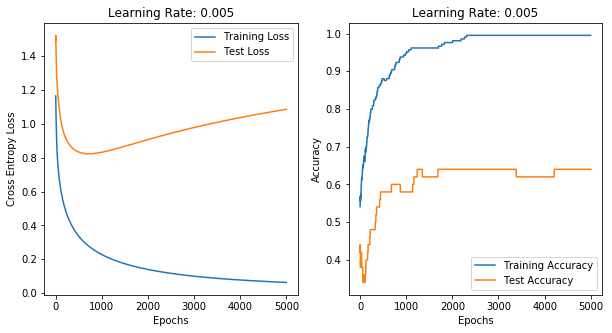

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss_train)
plt.plot(range(epoch),loss_test)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Learning Rate: 0.005')
plt.subplot(1,2,2)
plt.plot(range(epoch),acc_train)
plt.plot(range(epoch),acc_test)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rate: 0.005')

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 5000
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc1 = 0
acc2 = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)
loss_train = []
loss_test = []
acc_train = []
acc_test= []

In [ ]:
lrate = 0.0005

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)
    loss_train.append(loss_epoch_train)

    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)
    acc1 = sum(pred == y_train.reshape(-1,1))/len(y_train)
    acc_train.append(acc1)


    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)
    loss_test.append(loss_epoch_test)
    acc2 = sum(pred_test == y_test.reshape(-1,1))/len(y_test)
    acc_test.append(acc2)

    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', acc1, 'CE loss:', loss_epoch_test, 'Accuracy_Test:', acc2)

Epoch: 1 CE loss: 1.4362498130942027 Accuracy_Train: [0.60287081] CE loss: 2.171209347753395 Accuracy_Test: [0.4]
Epoch: 2 CE loss: 1.4071108094709297 Accuracy_Train: [0.59330144] CE loss: 2.090065888859572 Accuracy_Test: [0.4]
Epoch: 3 CE loss: 1.382777790102321 Accuracy_Train: [0.58373206] CE loss: 2.0182148438252447 Accuracy_Test: [0.42]
Epoch: 4 CE loss: 1.3626463920083205 Accuracy_Train: [0.5645933] CE loss: 1.9548488865815998 Accuracy_Test: [0.44]
Epoch: 5 CE loss: 1.3461194766540066 Accuracy_Train: [0.55980861] CE loss: 1.8991549290311645 Accuracy_Test: [0.44]
Epoch: 6 CE loss: 1.33263067478007 Accuracy_Train: [0.5645933] CE loss: 1.8503363640520367 Accuracy_Test: [0.46]
Epoch: 7 CE loss: 1.3216615333881565 Accuracy_Train: [0.55023923] CE loss: 1.8076314363605672 Accuracy_Test: [0.46]
Epoch: 8 CE loss: 1.3127518625433294 Accuracy_Train: [0.55023923] CE loss: 1.7703267198567048 Accuracy_Test: [0.46]
Epoch: 9 CE loss: 1.3055039192304239 Accuracy_Train: [0.55502392] CE loss: 1.7377

Epoch: 94 CE loss: 1.1807574760189352 Accuracy_Train: [0.53588517] CE loss: 1.404071809343893 Accuracy_Test: [0.52]
Epoch: 95 CE loss: 1.1796433009847365 Accuracy_Train: [0.53588517] CE loss: 1.4026116832587245 Accuracy_Test: [0.52]
Epoch: 96 CE loss: 1.1785318365632762 Accuracy_Train: [0.53588517] CE loss: 1.4011556277162045 Accuracy_Test: [0.52]
Epoch: 97 CE loss: 1.177423073634575 Accuracy_Train: [0.53588517] CE loss: 1.3997036224912782 Accuracy_Test: [0.52]
Epoch: 98 CE loss: 1.176317003119982 Accuracy_Train: [0.53588517] CE loss: 1.398255647638227 Accuracy_Test: [0.52]
Epoch: 99 CE loss: 1.1752136159819313 Accuracy_Train: [0.53588517] CE loss: 1.396811683463585 Accuracy_Test: [0.52]
Epoch: 100 CE loss: 1.1741129032237085 Accuracy_Train: [0.53588517] CE loss: 1.3953717105030048 Accuracy_Test: [0.52]
Epoch: 101 CE loss: 1.1730148558892055 Accuracy_Train: [0.53588517] CE loss: 1.39393570950146 Accuracy_Test: [0.52]
Epoch: 102 CE loss: 1.171919465062685 Accuracy_Train: [0.53588517] CE

Epoch: 191 CE loss: 1.0840868357452602 Accuracy_Train: [0.55502392] CE loss: 1.2788860492430987 Accuracy_Test: [0.52]
Epoch: 192 CE loss: 1.0831984374170625 Accuracy_Train: [0.55502392] CE loss: 1.277745428566287 Accuracy_Test: [0.52]
Epoch: 193 CE loss: 1.0823120250717262 Accuracy_Train: [0.55502392] CE loss: 1.2766074574287862 Accuracy_Test: [0.52]
Epoch: 194 CE loss: 1.0814275926271437 Accuracy_Train: [0.55502392] CE loss: 1.275472125369477 Accuracy_Test: [0.52]
Epoch: 195 CE loss: 1.0805451340246197 Accuracy_Train: [0.55502392] CE loss: 1.2743394219975284 Accuracy_Test: [0.52]
Epoch: 196 CE loss: 1.0796646432287502 Accuracy_Train: [0.55502392] CE loss: 1.2732093369918969 Accuracy_Test: [0.52]
Epoch: 197 CE loss: 1.0787861142273147 Accuracy_Train: [0.55502392] CE loss: 1.2720818601008488 Accuracy_Test: [0.52]
Epoch: 198 CE loss: 1.0779095410311565 Accuracy_Train: [0.55502392] CE loss: 1.270956981141466 Accuracy_Test: [0.52]
Epoch: 199 CE loss: 1.0770349176740752 Accuracy_Train: [0.5

Epoch: 289 CE loss: 1.005615646772936 Accuracy_Train: [0.5645933] CE loss: 1.1783290938848503 Accuracy_Test: [0.52]
Epoch: 290 CE loss: 1.0048961598889987 Accuracy_Train: [0.5645933] CE loss: 1.177407403457623 Accuracy_Test: [0.52]
Epoch: 291 CE loss: 1.0041781591289607 Accuracy_Train: [0.5645933] CE loss: 1.1764876014814951 Accuracy_Test: [0.52]
Epoch: 292 CE loss: 1.0034616402508605 Accuracy_Train: [0.5645933] CE loss: 1.175569682273058 Accuracy_Test: [0.52]
Epoch: 293 CE loss: 1.0027465990273714 Accuracy_Train: [0.56937799] CE loss: 1.1746536401791579 Accuracy_Test: [0.52]
Epoch: 294 CE loss: 1.0020330312457204 Accuracy_Train: [0.56937799] CE loss: 1.173739469576602 Accuracy_Test: [0.52]
Epoch: 295 CE loss: 1.001320932707617 Accuracy_Train: [0.56937799] CE loss: 1.1728271648718722 Accuracy_Test: [0.52]
Epoch: 296 CE loss: 1.0006102992291748 Accuracy_Train: [0.56937799] CE loss: 1.171916720500836 Accuracy_Test: [0.52]
Epoch: 297 CE loss: 0.9999011266408374 Accuracy_Train: [0.56937799

Epoch: 379 CE loss: 0.9463496237857917 Accuracy_Train: [0.58851675] CE loss: 1.1023384511462242 Accuracy_Test: [0.52]
Epoch: 380 CE loss: 0.9457484359588564 Accuracy_Train: [0.59330144] CE loss: 1.1015668696397654 Accuracy_Test: [0.52]
Epoch: 381 CE loss: 0.9451484028854679 Accuracy_Train: [0.59330144] CE loss: 1.1007967577970574 Accuracy_Test: [0.52]
Epoch: 382 CE loss: 0.9445495213716323 Accuracy_Train: [0.58851675] CE loss: 1.100028111751368 Accuracy_Test: [0.52]
Epoch: 383 CE loss: 0.9439517882324531 Accuracy_Train: [0.58851675] CE loss: 1.0992609276485745 Accuracy_Test: [0.52]
Epoch: 384 CE loss: 0.9433552002920887 Accuracy_Train: [0.58851675] CE loss: 1.0984952016470526 Accuracy_Test: [0.52]
Epoch: 385 CE loss: 0.9427597543837084 Accuracy_Train: [0.58851675] CE loss: 1.0977309299175713 Accuracy_Test: [0.52]
Epoch: 386 CE loss: 0.9421654473494527 Accuracy_Train: [0.58851675] CE loss: 1.09696810864317 Accuracy_Test: [0.52]
Epoch: 387 CE loss: 0.9415722760403885 Accuracy_Train: [0.5

Epoch: 466 CE loss: 0.8980465561598421 Accuracy_Train: [0.57894737] CE loss: 1.0403236007354755 Accuracy_Test: [0.52]
Epoch: 467 CE loss: 0.8975347680949397 Accuracy_Train: [0.57416268] CE loss: 1.0396665491241974 Accuracy_Test: [0.52]
Epoch: 468 CE loss: 0.8970238873495411 Accuracy_Train: [0.57416268] CE loss: 1.0390106688766314 Accuracy_Test: [0.52]
Epoch: 469 CE loss: 0.8965139114050084 Accuracy_Train: [0.57416268] CE loss: 1.0383559569338545 Accuracy_Test: [0.52]
Epoch: 470 CE loss: 0.8960048377495565 Accuracy_Train: [0.57416268] CE loss: 1.0377024102441454 Accuracy_Test: [0.52]
Epoch: 471 CE loss: 0.8954966638782386 Accuracy_Train: [0.57416268] CE loss: 1.0370500257629665 Accuracy_Test: [0.52]
Epoch: 472 CE loss: 0.894989387292936 Accuracy_Train: [0.57416268] CE loss: 1.0363988004529316 Accuracy_Test: [0.52]
Epoch: 473 CE loss: 0.8944830055023443 Accuracy_Train: [0.57416268] CE loss: 1.0357487312837954 Accuracy_Test: [0.52]
Epoch: 474 CE loss: 0.8939775160219622 Accuracy_Train: [0

Epoch: 558 CE loss: 0.8544624308150548 Accuracy_Train: [0.58851675] CE loss: 0.9844133934194157 Accuracy_Test: [0.52]
Epoch: 559 CE loss: 0.8540244049648551 Accuracy_Train: [0.58851675] CE loss: 0.983852166665827 Accuracy_Test: [0.52]
Epoch: 560 CE loss: 0.8535870821594197 Accuracy_Train: [0.58851675] CE loss: 0.9832918584021147 Accuracy_Test: [0.52]
Epoch: 561 CE loss: 0.8531504604709281 Accuracy_Train: [0.58851675] CE loss: 0.9827324661890623 Accuracy_Test: [0.52]
Epoch: 562 CE loss: 0.8527145379775856 Accuracy_Train: [0.58851675] CE loss: 0.9821739875940817 Accuracy_Test: [0.52]
Epoch: 563 CE loss: 0.8522793127636163 Accuracy_Train: [0.58851675] CE loss: 0.9816164201912209 Accuracy_Test: [0.52]
Epoch: 564 CE loss: 0.8518447829192518 Accuracy_Train: [0.58851675] CE loss: 0.9810597615611527 Accuracy_Test: [0.52]
Epoch: 565 CE loss: 0.8514109465407226 Accuracy_Train: [0.58851675] CE loss: 0.9805040092911871 Accuracy_Test: [0.52]
Epoch: 566 CE loss: 0.8509778017302491 Accuracy_Train: [0

Epoch: 646 CE loss: 0.8184095167438997 Accuracy_Train: [0.57894737] CE loss: 0.9382892303300338 Accuracy_Test: [0.52]
Epoch: 647 CE loss: 0.8180266163998968 Accuracy_Train: [0.57894737] CE loss: 0.9378002216421527 Accuracy_Test: [0.52]
Epoch: 648 CE loss: 0.8176442713574955 Accuracy_Train: [0.57894737] CE loss: 0.9373119421636429 Accuracy_Test: [0.52]
Epoch: 649 CE loss: 0.8172624801767723 Accuracy_Train: [0.57894737] CE loss: 0.936824390035562 Accuracy_Test: [0.52]
Epoch: 650 CE loss: 0.8168812414227765 Accuracy_Train: [0.57894737] CE loss: 0.9363375634053803 Accuracy_Test: [0.52]
Epoch: 651 CE loss: 0.8165005536655146 Accuracy_Train: [0.57894737] CE loss: 0.9358514604269637 Accuracy_Test: [0.52]
Epoch: 652 CE loss: 0.8161204154799374 Accuracy_Train: [0.57894737] CE loss: 0.9353660792605746 Accuracy_Test: [0.52]
Epoch: 653 CE loss: 0.8157408254459249 Accuracy_Train: [0.57894737] CE loss: 0.9348814180728552 Accuracy_Test: [0.52]
Epoch: 654 CE loss: 0.815361782148272 Accuracy_Train: [0.

Epoch: 735 CE loss: 0.7863539580681348 Accuracy_Train: [0.60287081] CE loss: 0.8974271579738725 Accuracy_Test: [0.56]
Epoch: 736 CE loss: 0.786015369757853 Accuracy_Train: [0.60287081] CE loss: 0.8969964713929641 Accuracy_Test: [0.56]
Epoch: 737 CE loss: 0.7856772264007384 Accuracy_Train: [0.60287081] CE loss: 0.8965663724161581 Accuracy_Test: [0.56]
Epoch: 738 CE loss: 0.7853395269418121 Accuracy_Train: [0.60287081] CE loss: 0.8961368597083169 Accuracy_Test: [0.56]
Epoch: 739 CE loss: 0.7850022703297601 Accuracy_Train: [0.60287081] CE loss: 0.8957079319395176 Accuracy_Test: [0.56]
Epoch: 740 CE loss: 0.7846654555169225 Accuracy_Train: [0.60287081] CE loss: 0.8952795877850405 Accuracy_Test: [0.56]
Epoch: 741 CE loss: 0.7843290814592773 Accuracy_Train: [0.60287081] CE loss: 0.8948518259253408 Accuracy_Test: [0.56]
Epoch: 742 CE loss: 0.7839931471164268 Accuracy_Train: [0.60287081] CE loss: 0.8944246450460454 Accuracy_Test: [0.56]
Epoch: 743 CE loss: 0.7836576514515834 Accuracy_Train: [0

Epoch: 830 CE loss: 0.7560396430519385 Accuracy_Train: [0.61722488] CE loss: 0.8589663705125021 Accuracy_Test: [0.56]
Epoch: 831 CE loss: 0.7557390793271628 Accuracy_Train: [0.61722488] CE loss: 0.8585862108732821 Accuracy_Test: [0.56]
Epoch: 832 CE loss: 0.7554388748593016 Accuracy_Train: [0.61722488] CE loss: 0.8582065328460985 Accuracy_Test: [0.56]
Epoch: 833 CE loss: 0.7551390288835713 Accuracy_Train: [0.61722488] CE loss: 0.8578273355123385 Accuracy_Test: [0.56]
Epoch: 834 CE loss: 0.7548395406376779 Accuracy_Train: [0.61722488] CE loss: 0.8574486179569314 Accuracy_Test: [0.56]
Epoch: 835 CE loss: 0.7545404093618076 Accuracy_Train: [0.61722488] CE loss: 0.8570703792683289 Accuracy_Test: [0.56]
Epoch: 836 CE loss: 0.7542416342986152 Accuracy_Train: [0.61722488] CE loss: 0.8566926185384905 Accuracy_Test: [0.56]
Epoch: 837 CE loss: 0.7539432146932151 Accuracy_Train: [0.61722488] CE loss: 0.8563153348628676 Accuracy_Test: [0.56]
Epoch: 838 CE loss: 0.7536451497931713 Accuracy_Train: [

Epoch: 926 CE loss: 0.7287221391018016 Accuracy_Train: [0.62679426] CE loss: 0.8245467184774486 Accuracy_Test: [0.58]
Epoch: 927 CE loss: 0.7284529003658249 Accuracy_Train: [0.62679426] CE loss: 0.8242090574096648 Accuracy_Test: [0.58]
Epoch: 928 CE loss: 0.7281839574715954 Accuracy_Train: [0.62679426] CE loss: 0.823871803657686 Accuracy_Test: [0.58]
Epoch: 929 CE loss: 0.7279153098517094 Accuracy_Train: [0.62679426] CE loss: 0.8235349565726743 Accuracy_Test: [0.58]
Epoch: 930 CE loss: 0.7276469569404348 Accuracy_Train: [0.62679426] CE loss: 0.8231985155079319 Accuracy_Test: [0.58]
Epoch: 931 CE loss: 0.7273788981737045 Accuracy_Train: [0.62679426] CE loss: 0.8228624798188965 Accuracy_Test: [0.58]
Epoch: 932 CE loss: 0.7271111329891108 Accuracy_Train: [0.62679426] CE loss: 0.8225268488631242 Accuracy_Test: [0.58]
Epoch: 933 CE loss: 0.726843660825896 Accuracy_Train: [0.62679426] CE loss: 0.8221916220002788 Accuracy_Test: [0.58]
Epoch: 934 CE loss: 0.726576481124947 Accuracy_Train: [0.6

Epoch: 1021 CE loss: 0.7043918111244981 Accuracy_Train: [0.64593301] CE loss: 0.794203954180437 Accuracy_Test: [0.6]
Epoch: 1022 CE loss: 0.70414835545073 Accuracy_Train: [0.64593301] CE loss: 0.793902352944629 Accuracy_Test: [0.6]
Epoch: 1023 CE loss: 0.7039051483355063 Accuracy_Train: [0.64593301] CE loss: 0.793601105476982 Accuracy_Test: [0.6]
Epoch: 1024 CE loss: 0.7036621893439721 Accuracy_Train: [0.64593301] CE loss: 0.7933002112864195 Accuracy_Test: [0.6]
Epoch: 1025 CE loss: 0.703419478042423 Accuracy_Train: [0.64593301] CE loss: 0.7929996698831119 Accuracy_Test: [0.6]
Epoch: 1026 CE loss: 0.7031770139983042 Accuracy_Train: [0.64593301] CE loss: 0.792699480778463 Accuracy_Test: [0.6]
Epoch: 1027 CE loss: 0.7029347967802034 Accuracy_Train: [0.64593301] CE loss: 0.7923996434851093 Accuracy_Test: [0.6]
Epoch: 1028 CE loss: 0.7026928259578472 Accuracy_Train: [0.64593301] CE loss: 0.7921001575169078 Accuracy_Test: [0.6]
Epoch: 1029 CE loss: 0.7024511011020983 Accuracy_Train: [0.6459

Epoch: 1116 CE loss: 0.6823165794401856 Accuracy_Train: [0.66507177] CE loss: 0.7670670218942733 Accuracy_Test: [0.6]
Epoch: 1117 CE loss: 0.6820949419998051 Accuracy_Train: [0.66507177] CE loss: 0.7667969878013529 Accuracy_Test: [0.6]
Epoch: 1118 CE loss: 0.6818735164116275 Accuracy_Train: [0.66507177] CE loss: 0.7665272655184084 Accuracy_Test: [0.6]
Epoch: 1119 CE loss: 0.6816523023334538 Accuracy_Train: [0.66507177] CE loss: 0.7662578546461007 Accuracy_Test: [0.6]
Epoch: 1120 CE loss: 0.6814312994239031 Accuracy_Train: [0.66507177] CE loss: 0.7659887547858293 Accuracy_Test: [0.6]
Epoch: 1121 CE loss: 0.6812105073424125 Accuracy_Train: [0.66507177] CE loss: 0.7657199655397195 Accuracy_Test: [0.6]
Epoch: 1122 CE loss: 0.6809899257492307 Accuracy_Train: [0.66507177] CE loss: 0.765451486510628 Accuracy_Test: [0.6]
Epoch: 1123 CE loss: 0.6807695543054186 Accuracy_Train: [0.66507177] CE loss: 0.765183317302133 Accuracy_Test: [0.6]
Epoch: 1124 CE loss: 0.6805493926728452 Accuracy_Train: [0

Epoch: 1211 CE loss: 0.6621620329271222 Accuracy_Train: [0.66507177] CE loss: 0.7427528819367204 Accuracy_Test: [0.6]
Epoch: 1212 CE loss: 0.6619590986659816 Accuracy_Train: [0.66507177] CE loss: 0.7425107778337876 Accuracy_Test: [0.6]
Epoch: 1213 CE loss: 0.6617563470543238 Accuracy_Train: [0.66507177] CE loss: 0.7422689504378072 Accuracy_Test: [0.6]
Epoch: 1214 CE loss: 0.6615537778168047 Accuracy_Train: [0.66507177] CE loss: 0.7420273994056147 Accuracy_Test: [0.6]
Epoch: 1215 CE loss: 0.6613513906786815 Accuracy_Train: [0.66507177] CE loss: 0.7417861243945199 Accuracy_Test: [0.6]
Epoch: 1216 CE loss: 0.6611491853658109 Accuracy_Train: [0.66507177] CE loss: 0.7415451250623064 Accuracy_Test: [0.6]
Epoch: 1217 CE loss: 0.6609471616046464 Accuracy_Train: [0.66507177] CE loss: 0.741304401067231 Accuracy_Test: [0.6]
Epoch: 1218 CE loss: 0.660745319122237 Accuracy_Train: [0.66507177] CE loss: 0.7410639520680212 Accuracy_Test: [0.6]
Epoch: 1219 CE loss: 0.660543657646224 Accuracy_Train: [0.

Epoch: 1306 CE loss: 0.6436625074165633 Accuracy_Train: [0.67464115] CE loss: 0.7209424108914839 Accuracy_Test: [0.6]
Epoch: 1307 CE loss: 0.6434757730902044 Accuracy_Train: [0.67464115] CE loss: 0.7207251225662948 Accuracy_Test: [0.6]
Epoch: 1308 CE loss: 0.6432891977027494 Accuracy_Train: [0.67464115] CE loss: 0.7205080802617665 Accuracy_Test: [0.6]
Epoch: 1309 CE loss: 0.6431027810285613 Accuracy_Train: [0.67942584] CE loss: 0.7202912836735575 Accuracy_Test: [0.62]
Epoch: 1310 CE loss: 0.6429165228424566 Accuracy_Train: [0.67942584] CE loss: 0.7200747324976863 Accuracy_Test: [0.62]
Epoch: 1311 CE loss: 0.6427304229197046 Accuracy_Train: [0.67942584] CE loss: 0.7198584264305241 Accuracy_Test: [0.62]
Epoch: 1312 CE loss: 0.6425444810360237 Accuracy_Train: [0.67942584] CE loss: 0.7196423651687981 Accuracy_Test: [0.62]
Epoch: 1313 CE loss: 0.6423586969675835 Accuracy_Train: [0.67942584] CE loss: 0.7194265484095892 Accuracy_Test: [0.62]
Epoch: 1314 CE loss: 0.6421730704910001 Accuracy_Tr

Epoch: 1399 CE loss: 0.6269481362652795 Accuracy_Train: [0.68899522] CE loss: 0.7017485833622764 Accuracy_Test: [0.62]
Epoch: 1400 CE loss: 0.6267752733077515 Accuracy_Train: [0.68899522] CE loss: 0.7015529172039738 Accuracy_Test: [0.62]
Epoch: 1401 CE loss: 0.6266025500912367 Accuracy_Train: [0.68899522] CE loss: 0.7013574702005206 Accuracy_Test: [0.62]
Epoch: 1402 CE loss: 0.6264299664273526 Accuracy_Train: [0.68899522] CE loss: 0.7011622420780443 Accuracy_Test: [0.62]
Epoch: 1403 CE loss: 0.6262575221280701 Accuracy_Train: [0.68899522] CE loss: 0.7009672325629789 Accuracy_Test: [0.62]
Epoch: 1404 CE loss: 0.6260852170057115 Accuracy_Train: [0.68899522] CE loss: 0.7007724413820631 Accuracy_Test: [0.62]
Epoch: 1405 CE loss: 0.62591305087295 Accuracy_Train: [0.68899522] CE loss: 0.7005778682623397 Accuracy_Test: [0.62]
Epoch: 1406 CE loss: 0.6257410235428079 Accuracy_Train: [0.68899522] CE loss: 0.700383512931158 Accuracy_Test: [0.62]
Epoch: 1407 CE loss: 0.6255691348286574 Accuracy_Tr

Epoch: 1487 CE loss: 0.6122512403924076 Accuracy_Train: [0.6937799] CE loss: 0.6853395330726112 Accuracy_Test: [0.64]
Epoch: 1488 CE loss: 0.6120899902003157 Accuracy_Train: [0.6937799] CE loss: 0.6851621369905085 Accuracy_Test: [0.64]
Epoch: 1489 CE loss: 0.6119288644282628 Accuracy_Train: [0.6937799] CE loss: 0.6849849371004213 Accuracy_Test: [0.64]
Epoch: 1490 CE loss: 0.6117678629157305 Accuracy_Train: [0.6937799] CE loss: 0.684807933154321 Accuracy_Test: [0.64]
Epoch: 1491 CE loss: 0.6116069855024833 Accuracy_Train: [0.6937799] CE loss: 0.6846311249044597 Accuracy_Test: [0.64]
Epoch: 1492 CE loss: 0.6114462320285686 Accuracy_Train: [0.6937799] CE loss: 0.684454512103376 Accuracy_Test: [0.64]
Epoch: 1493 CE loss: 0.6112856023343161 Accuracy_Train: [0.6937799] CE loss: 0.6842780945038914 Accuracy_Test: [0.64]
Epoch: 1494 CE loss: 0.6111250962603371 Accuracy_Train: [0.6937799] CE loss: 0.6841018718591109 Accuracy_Test: [0.64]
Epoch: 1495 CE loss: 0.6109647136475232 Accuracy_Train: [0

Epoch: 1577 CE loss: 0.5982188635680314 Accuracy_Train: [0.69856459] CE loss: 0.670131214739683 Accuracy_Test: [0.64]
Epoch: 1578 CE loss: 0.5980681999713398 Accuracy_Train: [0.69856459] CE loss: 0.669970515536907 Accuracy_Test: [0.64]
Epoch: 1579 CE loss: 0.5979176474093514 Accuracy_Train: [0.69856459] CE loss: 0.669809991322515 Accuracy_Test: [0.64]
Epoch: 1580 CE loss: 0.5977672057446 Accuracy_Train: [0.69856459] CE loss: 0.6696496418734286 Accuracy_Test: [0.64]
Epoch: 1581 CE loss: 0.5976168748398493 Accuracy_Train: [0.69856459] CE loss: 0.6694894669668381 Accuracy_Test: [0.64]
Epoch: 1582 CE loss: 0.5974666545580933 Accuracy_Train: [0.69856459] CE loss: 0.6693294663802081 Accuracy_Test: [0.64]
Epoch: 1583 CE loss: 0.5973165447625571 Accuracy_Train: [0.69856459] CE loss: 0.6691696398912705 Accuracy_Test: [0.64]
Epoch: 1584 CE loss: 0.597166545316694 Accuracy_Train: [0.69856459] CE loss: 0.6690099872780286 Accuracy_Test: [0.64]
Epoch: 1585 CE loss: 0.5970166560841859 Accuracy_Train:

Epoch: 1670 CE loss: 0.5846649656860566 Accuracy_Train: [0.69856459] CE loss: 0.6559066252276273 Accuracy_Test: [0.64]
Epoch: 1671 CE loss: 0.5845240687808173 Accuracy_Train: [0.69856459] CE loss: 0.6557612803800968 Accuracy_Test: [0.64]
Epoch: 1672 CE loss: 0.5843832710517384 Accuracy_Train: [0.69856459] CE loss: 0.6556160909162491 Accuracy_Test: [0.64]
Epoch: 1673 CE loss: 0.5842425723808363 Accuracy_Train: [0.69856459] CE loss: 0.655471056637622 Accuracy_Test: [0.64]
Epoch: 1674 CE loss: 0.5841019726503169 Accuracy_Train: [0.69856459] CE loss: 0.6553261773460135 Accuracy_Test: [0.64]
Epoch: 1675 CE loss: 0.5839614717425754 Accuracy_Train: [0.69856459] CE loss: 0.6551814528434785 Accuracy_Test: [0.64]
Epoch: 1676 CE loss: 0.5838210695401952 Accuracy_Train: [0.69856459] CE loss: 0.6550368829323306 Accuracy_Test: [0.64]
Epoch: 1677 CE loss: 0.5836807659259494 Accuracy_Train: [0.69856459] CE loss: 0.6548924674151404 Accuracy_Test: [0.64]
Epoch: 1678 CE loss: 0.5835405607827985 Accuracy_

Epoch: 1765 CE loss: 0.5717068327692614 Accuracy_Train: [0.70334928] CE loss: 0.6427659954073244 Accuracy_Test: [0.64]
Epoch: 1766 CE loss: 0.5715748558808293 Accuracy_Train: [0.70334928] CE loss: 0.6426345611007079 Accuracy_Test: [0.64]
Epoch: 1767 CE loss: 0.5714429677566258 Accuracy_Train: [0.70334928] CE loss: 0.6425032644541924 Accuracy_Test: [0.64]
Epoch: 1768 CE loss: 0.5713111682950959 Accuracy_Train: [0.70334928] CE loss: 0.6423721052931074 Accuracy_Test: [0.64]
Epoch: 1769 CE loss: 0.5711794573948431 Accuracy_Train: [0.70334928] CE loss: 0.6422410834430243 Accuracy_Test: [0.64]
Epoch: 1770 CE loss: 0.5710478349546271 Accuracy_Train: [0.70334928] CE loss: 0.6421101987297567 Accuracy_Test: [0.64]
Epoch: 1771 CE loss: 0.570916300873365 Accuracy_Train: [0.70334928] CE loss: 0.6419794509793578 Accuracy_Test: [0.64]
Epoch: 1772 CE loss: 0.5707848550501298 Accuracy_Train: [0.70334928] CE loss: 0.6418488400181253 Accuracy_Test: [0.64]
Epoch: 1773 CE loss: 0.5706534973841507 Accuracy_

Epoch: 1859 CE loss: 0.5596758446577448 Accuracy_Train: [0.71291866] CE loss: 0.6309901966277106 Accuracy_Test: [0.66]
Epoch: 1860 CE loss: 0.5595517879175154 Accuracy_Train: [0.71291866] CE loss: 0.6308709707265501 Accuracy_Test: [0.66]
Epoch: 1861 CE loss: 0.5594278110447303 Accuracy_Train: [0.71291866] CE loss: 0.6307518670977386 Accuracy_Test: [0.66]
Epoch: 1862 CE loss: 0.5593039139513984 Accuracy_Train: [0.71291866] CE loss: 0.6306328855884772 Accuracy_Test: [0.66]
Epoch: 1863 CE loss: 0.5591800965496606 Accuracy_Train: [0.71291866] CE loss: 0.6305140260461894 Accuracy_Test: [0.66]
Epoch: 1864 CE loss: 0.5590563587517902 Accuracy_Train: [0.71291866] CE loss: 0.6303952883185199 Accuracy_Test: [0.66]
Epoch: 1865 CE loss: 0.5589327004701913 Accuracy_Train: [0.71291866] CE loss: 0.6302766722533371 Accuracy_Test: [0.66]
Epoch: 1866 CE loss: 0.5588091216173993 Accuracy_Train: [0.71291866] CE loss: 0.6301581776987298 Accuracy_Test: [0.66]
Epoch: 1867 CE loss: 0.5586856221060809 Accuracy

Epoch: 1955 CE loss: 0.548118445220882 Accuracy_Train: [0.73205742] CE loss: 0.6200809656905242 Accuracy_Test: [0.66]
Epoch: 1956 CE loss: 0.5480016726069112 Accuracy_Train: [0.73205742] CE loss: 0.6199728122200701 Accuracy_Test: [0.66]
Epoch: 1957 CE loss: 0.5478849719824254 Accuracy_Train: [0.73205742] CE loss: 0.619864767335635 Accuracy_Test: [0.66]
Epoch: 1958 CE loss: 0.5477683432710786 Accuracy_Train: [0.73205742] CE loss: 0.6197568309047383 Accuracy_Test: [0.66]
Epoch: 1959 CE loss: 0.5476517863966368 Accuracy_Train: [0.73205742] CE loss: 0.6196490027950997 Accuracy_Test: [0.66]
Epoch: 1960 CE loss: 0.5475353012829763 Accuracy_Train: [0.73205742] CE loss: 0.6195412828746377 Accuracy_Test: [0.66]
Epoch: 1961 CE loss: 0.5474188878540838 Accuracy_Train: [0.73205742] CE loss: 0.6194336710114721 Accuracy_Test: [0.66]
Epoch: 1962 CE loss: 0.5473025460340574 Accuracy_Train: [0.73205742] CE loss: 0.6193261670739211 Accuracy_Test: [0.66]
Epoch: 1963 CE loss: 0.5471862757471049 Accuracy_T

Epoch: 2049 CE loss: 0.5374465803011176 Accuracy_Train: [0.73684211] CE loss: 0.6103720075378296 Accuracy_Test: [0.66]
Epoch: 2050 CE loss: 0.5373362553109833 Accuracy_Train: [0.73684211] CE loss: 0.6102735081571246 Accuracy_Test: [0.66]
Epoch: 2051 CE loss: 0.5372259955944662 Accuracy_Train: [0.73684211] CE loss: 0.6101751057510483 Accuracy_Test: [0.66]
Epoch: 2052 CE loss: 0.5371158010848602 Accuracy_Train: [0.73684211] CE loss: 0.6100768002048553 Accuracy_Test: [0.66]
Epoch: 2053 CE loss: 0.5370056717155541 Accuracy_Train: [0.73684211] CE loss: 0.6099785914039767 Accuracy_Test: [0.66]
Epoch: 2054 CE loss: 0.5368956074200305 Accuracy_Train: [0.73684211] CE loss: 0.6098804792340198 Accuracy_Test: [0.66]
Epoch: 2055 CE loss: 0.5367856081318656 Accuracy_Train: [0.73684211] CE loss: 0.6097824635807683 Accuracy_Test: [0.66]
Epoch: 2056 CE loss: 0.5366756737847302 Accuracy_Train: [0.73684211] CE loss: 0.6096845443301832 Accuracy_Test: [0.66]
Epoch: 2057 CE loss: 0.5365658043123883 Accuracy

Epoch: 2144 CE loss: 0.5272482109609162 Accuracy_Train: [0.73684211] CE loss: 0.6014322242445934 Accuracy_Test: [0.7]
Epoch: 2145 CE loss: 0.5271438016778017 Accuracy_Train: [0.73684211] CE loss: 0.6013424488057214 Accuracy_Test: [0.7]
Epoch: 2146 CE loss: 0.5270394517308287 Accuracy_Train: [0.73684211] CE loss: 0.6012527601960711 Accuracy_Test: [0.7]
Epoch: 2147 CE loss: 0.526935161061566 Accuracy_Train: [0.73684211] CE loss: 0.6011631583165946 Accuracy_Test: [0.7]
Epoch: 2148 CE loss: 0.5268309296116636 Accuracy_Train: [0.73684211] CE loss: 0.6010736430683997 Accuracy_Test: [0.7]
Epoch: 2149 CE loss: 0.526726757322851 Accuracy_Train: [0.73684211] CE loss: 0.6009842143527472 Accuracy_Test: [0.7]
Epoch: 2150 CE loss: 0.5266226441369374 Accuracy_Train: [0.73684211] CE loss: 0.6008948720710489 Accuracy_Test: [0.7]
Epoch: 2151 CE loss: 0.5265185899958117 Accuracy_Train: [0.73684211] CE loss: 0.600805616124871 Accuracy_Test: [0.7]
Epoch: 2152 CE loss: 0.5264145948414435 Accuracy_Train: [0.

Epoch: 2240 CE loss: 0.5174874022396617 Accuracy_Train: [0.74641148] CE loss: 0.5931960669263705 Accuracy_Test: [0.72]
Epoch: 2241 CE loss: 0.5173884337997584 Accuracy_Train: [0.74641148] CE loss: 0.5931141965817049 Accuracy_Test: [0.72]
Epoch: 2242 CE loss: 0.5172895194335935 Accuracy_Train: [0.74641148] CE loss: 0.5930324042238538 Accuracy_Test: [0.72]
Epoch: 2243 CE loss: 0.5171906590898465 Accuracy_Train: [0.74641148] CE loss: 0.592950689767429 Accuracy_Test: [0.72]
Epoch: 2244 CE loss: 0.5170918527172655 Accuracy_Train: [0.74641148] CE loss: 0.5928690531271762 Accuracy_Test: [0.72]
Epoch: 2245 CE loss: 0.5169931002646668 Accuracy_Train: [0.74641148] CE loss: 0.5927874942179717 Accuracy_Test: [0.72]
Epoch: 2246 CE loss: 0.516894401680934 Accuracy_Train: [0.74641148] CE loss: 0.5927060129548213 Accuracy_Test: [0.72]
Epoch: 2247 CE loss: 0.5167957569150192 Accuracy_Train: [0.74641148] CE loss: 0.5926246092528623 Accuracy_Test: [0.72]
Epoch: 2248 CE loss: 0.5166971659159417 Accuracy_T

Epoch: 2336 CE loss: 0.5082258953935432 Accuracy_Train: [0.74641148] CE loss: 0.5856803559016024 Accuracy_Test: [0.74]
Epoch: 2337 CE loss: 0.5081318933902537 Accuracy_Train: [0.74641148] CE loss: 0.5856056009380033 Accuracy_Test: [0.74]
Epoch: 2338 CE loss: 0.5080379408293368 Accuracy_Train: [0.74641148] CE loss: 0.5855309163309493 Accuracy_Test: [0.74]
Epoch: 2339 CE loss: 0.5079440376655282 Accuracy_Train: [0.74641148] CE loss: 0.5854563020066558 Accuracy_Test: [0.74]
Epoch: 2340 CE loss: 0.5078501838536227 Accuracy_Train: [0.74641148] CE loss: 0.5853817578914519 Accuracy_Test: [0.74]
Epoch: 2341 CE loss: 0.5077563793484724 Accuracy_Train: [0.74641148] CE loss: 0.585307283911774 Accuracy_Test: [0.74]
Epoch: 2342 CE loss: 0.5076626241049874 Accuracy_Train: [0.74641148] CE loss: 0.5852328799941735 Accuracy_Test: [0.74]
Epoch: 2343 CE loss: 0.5075689180781361 Accuracy_Train: [0.75119617] CE loss: 0.5851585460653067 Accuracy_Test: [0.74]
Epoch: 2344 CE loss: 0.5074752612229444 Accuracy_

Epoch: 2428 CE loss: 0.4997791505774243 Accuracy_Train: [0.75119617] CE loss: 0.5790884459103508 Accuracy_Test: [0.74]
Epoch: 2429 CE loss: 0.4996895148441501 Accuracy_Train: [0.75119617] CE loss: 0.5790198682568887 Accuracy_Test: [0.74]
Epoch: 2430 CE loss: 0.4995999246209542 Accuracy_Train: [0.75119617] CE loss: 0.578951354611221 Accuracy_Test: [0.74]
Epoch: 2431 CE loss: 0.49951037986754665 Accuracy_Train: [0.75119617] CE loss: 0.5788829049089518 Accuracy_Test: [0.74]
Epoch: 2432 CE loss: 0.4994208805436867 Accuracy_Train: [0.75119617] CE loss: 0.5788145190857789 Accuracy_Test: [0.74]
Epoch: 2433 CE loss: 0.49933142660918384 Accuracy_Train: [0.75119617] CE loss: 0.5787461970774929 Accuracy_Test: [0.74]
Epoch: 2434 CE loss: 0.49924201802389817 Accuracy_Train: [0.75119617] CE loss: 0.5786779388199783 Accuracy_Test: [0.74]
Epoch: 2435 CE loss: 0.49915265474773846 Accuracy_Train: [0.75119617] CE loss: 0.5786097442492109 Accuracy_Test: [0.74]
Epoch: 2436 CE loss: 0.4990633367406641 Accur

Epoch: 2520 CE loss: 0.4917182447407604 Accuracy_Train: [0.74641148] CE loss: 0.5730394044339231 Accuracy_Test: [0.74]
Epoch: 2521 CE loss: 0.49163263335180774 Accuracy_Train: [0.74641148] CE loss: 0.5729764572032365 Accuracy_Test: [0.74]
Epoch: 2522 CE loss: 0.49154706396620257 Accuracy_Train: [0.74641148] CE loss: 0.5729135684261386 Accuracy_Test: [0.74]
Epoch: 2523 CE loss: 0.49146153654794433 Accuracy_Train: [0.74641148] CE loss: 0.5728507380461406 Accuracy_Test: [0.74]
Epoch: 2524 CE loss: 0.4913760510610767 Accuracy_Train: [0.74641148] CE loss: 0.572787966006828 Accuracy_Test: [0.74]
Epoch: 2525 CE loss: 0.4912906074696844 Accuracy_Train: [0.74641148] CE loss: 0.5727252522518695 Accuracy_Test: [0.74]
Epoch: 2526 CE loss: 0.49120520573789733 Accuracy_Train: [0.74641148] CE loss: 0.572662596725009 Accuracy_Test: [0.74]
Epoch: 2527 CE loss: 0.4911198458298874 Accuracy_Train: [0.74641148] CE loss: 0.572599999370068 Accuracy_Test: [0.74]
Epoch: 2528 CE loss: 0.49103452770987 Accuracy_

Epoch: 2615 CE loss: 0.48376785872112876 Accuracy_Train: [0.76076555] CE loss: 0.5673128353759784 Accuracy_Test: [0.76]
Epoch: 2616 CE loss: 0.4836860826912303 Accuracy_Train: [0.76076555] CE loss: 0.5672551994217548 Accuracy_Test: [0.76]
Epoch: 2617 CE loss: 0.4836043454289299 Accuracy_Train: [0.76076555] CE loss: 0.5671976168855258 Accuracy_Test: [0.76]
Epoch: 2618 CE loss: 0.4835226469020536 Accuracy_Train: [0.76076555] CE loss: 0.5671400877176362 Accuracy_Test: [0.76]
Epoch: 2619 CE loss: 0.4834409870784648 Accuracy_Train: [0.76076555] CE loss: 0.5670826118684937 Accuracy_Test: [0.76]
Epoch: 2620 CE loss: 0.4833593659260649 Accuracy_Train: [0.76076555] CE loss: 0.5670251892885745 Accuracy_Test: [0.76]
Epoch: 2621 CE loss: 0.4832777834127921 Accuracy_Train: [0.76076555] CE loss: 0.5669678199284173 Accuracy_Test: [0.76]
Epoch: 2622 CE loss: 0.48319623950662194 Accuracy_Train: [0.76076555] CE loss: 0.5669105037386285 Accuracy_Test: [0.76]
Epoch: 2623 CE loss: 0.4831147341755669 Accura

Epoch: 2709 CE loss: 0.4762461633714684 Accuracy_Train: [0.77033493] CE loss: 0.5621220828885768 Accuracy_Test: [0.78]
Epoch: 2710 CE loss: 0.4761678957086977 Accuracy_Train: [0.77033493] CE loss: 0.5620692595992508 Accuracy_Test: [0.78]
Epoch: 2711 CE loss: 0.47608966394532376 Accuracy_Train: [0.77033493] CE loss: 0.5620164853308122 Accuracy_Test: [0.78]
Epoch: 2712 CE loss: 0.47601146805245304 Accuracy_Train: [0.77033493] CE loss: 0.5619637600392544 Accuracy_Test: [0.78]
Epoch: 2713 CE loss: 0.4759333080012242 Accuracy_Train: [0.77033493] CE loss: 0.561911083680626 Accuracy_Test: [0.78]
Epoch: 2714 CE loss: 0.47585518376280855 Accuracy_Train: [0.77033493] CE loss: 0.5618584562110288 Accuracy_Test: [0.78]
Epoch: 2715 CE loss: 0.4757770953084098 Accuracy_Train: [0.77033493] CE loss: 0.5618058775866226 Accuracy_Test: [0.78]
Epoch: 2716 CE loss: 0.4756990426092637 Accuracy_Train: [0.77033493] CE loss: 0.5617533477636185 Accuracy_Test: [0.78]
Epoch: 2717 CE loss: 0.47562102563663844 Accur

Epoch: 2804 CE loss: 0.4689671276338521 Accuracy_Train: [0.77990431] CE loss: 0.5573168264480837 Accuracy_Test: [0.78]
Epoch: 2805 CE loss: 0.4688921457534425 Accuracy_Train: [0.77990431] CE loss: 0.5572684709355188 Accuracy_Test: [0.78]
Epoch: 2806 CE loss: 0.46881719716625886 Accuracy_Train: [0.77990431] CE loss: 0.5572201604947227 Accuracy_Test: [0.78]
Epoch: 2807 CE loss: 0.4687422818462919 Accuracy_Train: [0.77990431] CE loss: 0.5571718950864736 Accuracy_Test: [0.78]
Epoch: 2808 CE loss: 0.46866739976756194 Accuracy_Train: [0.77990431] CE loss: 0.5571236746715943 Accuracy_Test: [0.78]
Epoch: 2809 CE loss: 0.46859255090411656 Accuracy_Train: [0.77990431] CE loss: 0.5570754992109558 Accuracy_Test: [0.78]
Epoch: 2810 CE loss: 0.46851773523003193 Accuracy_Train: [0.77990431] CE loss: 0.5570273686654731 Accuracy_Test: [0.78]
Epoch: 2811 CE loss: 0.46844295271941244 Accuracy_Train: [0.77990431] CE loss: 0.556979282996108 Accuracy_Test: [0.78]
Epoch: 2812 CE loss: 0.46836820334639134 Acc

Epoch: 2901 CE loss: 0.46184515940322673 Accuracy_Train: [0.77990431] CE loss: 0.5528305673538715 Accuracy_Test: [0.78]
Epoch: 2902 CE loss: 0.4617732899111212 Accuracy_Train: [0.77990431] CE loss: 0.5527864076979077 Accuracy_Test: [0.78]
Epoch: 2903 CE loss: 0.46170145131560514 Accuracy_Train: [0.77990431] CE loss: 0.5527422895119373 Accuracy_Test: [0.78]
Epoch: 2904 CE loss: 0.4616296435932401 Accuracy_Train: [0.77990431] CE loss: 0.552698212760844 Accuracy_Test: [0.78]
Epoch: 2905 CE loss: 0.46155786672061283 Accuracy_Train: [0.77990431] CE loss: 0.5526541774095505 Accuracy_Test: [0.78]
Epoch: 2906 CE loss: 0.46148612067433514 Accuracy_Train: [0.77990431] CE loss: 0.5526101834230172 Accuracy_Test: [0.78]
Epoch: 2907 CE loss: 0.4614144054310429 Accuracy_Train: [0.77990431] CE loss: 0.5525662307662443 Accuracy_Test: [0.78]
Epoch: 2908 CE loss: 0.46134272096739704 Accuracy_Train: [0.77990431] CE loss: 0.5525223194042703 Accuracy_Test: [0.78]
Epoch: 2909 CE loss: 0.4612710672600828 Accu

Epoch: 2996 CE loss: 0.45515234361764006 Accuracy_Train: [0.784689] CE loss: 0.5488158226780023 Accuracy_Test: [0.78]
Epoch: 2997 CE loss: 0.4550833079713731 Accuracy_Train: [0.784689] CE loss: 0.548775451042077 Accuracy_Test: [0.78]
Epoch: 2998 CE loss: 0.4550143011010626 Accuracy_Train: [0.784689] CE loss: 0.5487351177045189 Accuracy_Test: [0.78]
Epoch: 2999 CE loss: 0.4549453229854775 Accuracy_Train: [0.784689] CE loss: 0.5486948226336197 Accuracy_Test: [0.78]
Epoch: 3000 CE loss: 0.4548763736034086 Accuracy_Train: [0.784689] CE loss: 0.5486545657977022 Accuracy_Test: [0.78]
Epoch: 3001 CE loss: 0.4548074529336693 Accuracy_Train: [0.784689] CE loss: 0.548614347165124 Accuracy_Test: [0.78]
Epoch: 3002 CE loss: 0.4547385609550938 Accuracy_Train: [0.784689] CE loss: 0.5485741667042754 Accuracy_Test: [0.78]
Epoch: 3003 CE loss: 0.4546696976465379 Accuracy_Train: [0.784689] CE loss: 0.5485340243835788 Accuracy_Test: [0.78]
Epoch: 3004 CE loss: 0.45460086298688007 Accuracy_Train: [0.78468

Epoch: 3093 CE loss: 0.44858681015239954 Accuracy_Train: [0.77990431] CE loss: 0.5450735273224949 Accuracy_Test: [0.78]
Epoch: 3094 CE loss: 0.44852047003701795 Accuracy_Train: [0.77990431] CE loss: 0.5450367276916745 Accuracy_Test: [0.78]
Epoch: 3095 CE loss: 0.4484541567355016 Accuracy_Train: [0.77990431] CE loss: 0.5449999634300263 Accuracy_Test: [0.78]
Epoch: 3096 CE loss: 0.4483878702286037 Accuracy_Train: [0.77990431] CE loss: 0.5449632345088191 Accuracy_Test: [0.78]
Epoch: 3097 CE loss: 0.4483216104970974 Accuracy_Train: [0.77990431] CE loss: 0.5449265408993491 Accuracy_Test: [0.78]
Epoch: 3098 CE loss: 0.44825537752177536 Accuracy_Train: [0.77990431] CE loss: 0.5448898825729427 Accuracy_Test: [0.78]
Epoch: 3099 CE loss: 0.448189171283449 Accuracy_Train: [0.77990431] CE loss: 0.5448532595009549 Accuracy_Test: [0.78]
Epoch: 3100 CE loss: 0.4481229917629488 Accuracy_Train: [0.77990431] CE loss: 0.5448166716547652 Accuracy_Test: [0.78]
Epoch: 3101 CE loss: 0.448056838941124 Accurac

Epoch: 3190 CE loss: 0.4422738916182988 Accuracy_Train: [0.77990431] CE loss: 0.5416645017321179 Accuracy_Test: [0.78]
Epoch: 3191 CE loss: 0.4422100655847742 Accuracy_Train: [0.77990431] CE loss: 0.5416310031890516 Accuracy_Test: [0.78]
Epoch: 3192 CE loss: 0.4421462645841024 Accuracy_Train: [0.77990431] CE loss: 0.5415975373546528 Accuracy_Test: [0.78]
Epoch: 3193 CE loss: 0.4420824885987898 Accuracy_Train: [0.77990431] CE loss: 0.5415641042027626 Accuracy_Test: [0.78]
Epoch: 3194 CE loss: 0.44201873761135985 Accuracy_Train: [0.77990431] CE loss: 0.5415307037072481 Accuracy_Test: [0.78]
Epoch: 3195 CE loss: 0.4419550116043532 Accuracy_Train: [0.77990431] CE loss: 0.5414973358419999 Accuracy_Test: [0.78]
Epoch: 3196 CE loss: 0.4418913105603269 Accuracy_Train: [0.77990431] CE loss: 0.5414640005809346 Accuracy_Test: [0.78]
Epoch: 3197 CE loss: 0.4418276344618557 Accuracy_Train: [0.77990431] CE loss: 0.5414306978979924 Accuracy_Test: [0.78]
Epoch: 3198 CE loss: 0.4417639832915302 Accurac

Epoch: 3285 CE loss: 0.436319821617807 Accuracy_Train: [0.78947368] CE loss: 0.5386246404176862 Accuracy_Test: [0.78]
Epoch: 3286 CE loss: 0.4362582978816946 Accuracy_Train: [0.78947368] CE loss: 0.5385941357179332 Accuracy_Test: [0.78]
Epoch: 3287 CE loss: 0.4361967975895462 Accuracy_Train: [0.78947368] CE loss: 0.5385636613476671 Accuracy_Test: [0.78]
Epoch: 3288 CE loss: 0.43613532072539196 Accuracy_Train: [0.78947368] CE loss: 0.5385332172829327 Accuracy_Test: [0.78]
Epoch: 3289 CE loss: 0.436073867273276 Accuracy_Train: [0.78947368] CE loss: 0.5385028034997996 Accuracy_Test: [0.78]
Epoch: 3290 CE loss: 0.4360124372172589 Accuracy_Train: [0.78947368] CE loss: 0.5384724199743579 Accuracy_Test: [0.78]
Epoch: 3291 CE loss: 0.4359510305414154 Accuracy_Train: [0.78947368] CE loss: 0.5384420666827202 Accuracy_Test: [0.78]
Epoch: 3292 CE loss: 0.43588964722983603 Accuracy_Train: [0.78947368] CE loss: 0.5384117436010195 Accuracy_Test: [0.78]
Epoch: 3293 CE loss: 0.43582828726662515 Accurac

Epoch: 3379 CE loss: 0.4306369683789553 Accuracy_Train: [0.79425837] CE loss: 0.5358866229703311 Accuracy_Test: [0.78]
Epoch: 3380 CE loss: 0.4305775805410722 Accuracy_Train: [0.79425837] CE loss: 0.5358588673801962 Accuracy_Test: [0.78]
Epoch: 3381 CE loss: 0.4305182147096428 Accuracy_Train: [0.79425837] CE loss: 0.5358311399595764 Accuracy_Test: [0.78]
Epoch: 3382 CE loss: 0.43045887087004225 Accuracy_Train: [0.79425837] CE loss: 0.5358034406864517 Accuracy_Test: [0.78]
Epoch: 3383 CE loss: 0.43039954900765776 Accuracy_Train: [0.79425837] CE loss: 0.5357757695388211 Accuracy_Test: [0.78]
Epoch: 3384 CE loss: 0.4303402491078903 Accuracy_Train: [0.79425837] CE loss: 0.5357481264947029 Accuracy_Test: [0.78]
Epoch: 3385 CE loss: 0.43028097115615477 Accuracy_Train: [0.79425837] CE loss: 0.5357205115321347 Accuracy_Test: [0.78]
Epoch: 3386 CE loss: 0.4302217151378791 Accuracy_Train: [0.79425837] CE loss: 0.5356929246291743 Accuracy_Test: [0.78]
Epoch: 3387 CE loss: 0.43016248103850513 Accu

Epoch: 3472 CE loss: 0.42520618377340896 Accuracy_Train: [0.79904306] CE loss: 0.53342306027043 Accuracy_Test: [0.78]
Epoch: 3473 CE loss: 0.42514878167460785 Accuracy_Train: [0.79904306] CE loss: 0.5333978326951049 Accuracy_Test: [0.78]
Epoch: 3474 CE loss: 0.4250914002778659 Accuracy_Train: [0.79904306] CE loss: 0.5333726313215522 Accuracy_Test: [0.78]
Epoch: 3475 CE loss: 0.4250340395697485 Accuracy_Train: [0.79904306] CE loss: 0.5333474561294623 Accuracy_Test: [0.78]
Epoch: 3476 CE loss: 0.4249766995368339 Accuracy_Train: [0.79904306] CE loss: 0.5333223070985444 Accuracy_Test: [0.78]
Epoch: 3477 CE loss: 0.42491938016571146 Accuracy_Train: [0.79904306] CE loss: 0.533297184208525 Accuracy_Test: [0.78]
Epoch: 3478 CE loss: 0.42486208144298365 Accuracy_Train: [0.79904306] CE loss: 0.5332720874391477 Accuracy_Test: [0.78]
Epoch: 3479 CE loss: 0.4248048033552645 Accuracy_Train: [0.79904306] CE loss: 0.5332470167701727 Accuracy_Test: [0.78]
Epoch: 3480 CE loss: 0.42474754588917996 Accura

Epoch: 3564 CE loss: 0.42001019564003306 Accuracy_Train: [0.81818182] CE loss: 0.531209301441232 Accuracy_Test: [0.78]
Epoch: 3565 CE loss: 0.4199546433797933 Accuracy_Train: [0.81818182] CE loss: 0.5311864015564985 Accuracy_Test: [0.78]
Epoch: 3566 CE loss: 0.41989911063473234 Accuracy_Train: [0.81818182] CE loss: 0.5311635260758747 Accuracy_Test: [0.78]
Epoch: 3567 CE loss: 0.41984359739247584 Accuracy_Train: [0.81818182] CE loss: 0.5311406749805816 Accuracy_Test: [0.78]
Epoch: 3568 CE loss: 0.41978810364066016 Accuracy_Train: [0.81818182] CE loss: 0.5311178482518539 Accuracy_Test: [0.78]
Epoch: 3569 CE loss: 0.41973262936693306 Accuracy_Train: [0.81818182] CE loss: 0.5310950458709454 Accuracy_Test: [0.78]
Epoch: 3570 CE loss: 0.4196771745589528 Accuracy_Train: [0.81818182] CE loss: 0.5310722678191238 Accuracy_Test: [0.78]
Epoch: 3571 CE loss: 0.41962173920438867 Accuracy_Train: [0.81818182] CE loss: 0.5310495140776723 Accuracy_Test: [0.78]
Epoch: 3572 CE loss: 0.41956632329092125 Ac

Epoch: 3657 CE loss: 0.4149257468889621 Accuracy_Train: [0.8277512] CE loss: 0.5291816213850236 Accuracy_Test: [0.8]
Epoch: 3658 CE loss: 0.414871957986194 Accuracy_Train: [0.8277512] CE loss: 0.5291609127511829 Accuracy_Test: [0.8]
Epoch: 3659 CE loss: 0.41481818749300287 Accuracy_Train: [0.8277512] CE loss: 0.5291402268406151 Accuracy_Test: [0.8]
Epoch: 3660 CE loss: 0.4147644353979802 Accuracy_Train: [0.8277512] CE loss: 0.5291195636359466 Accuracy_Test: [0.8]
Epoch: 3661 CE loss: 0.414710701689728 Accuracy_Train: [0.8277512] CE loss: 0.5290989231198161 Accuracy_Test: [0.8]
Epoch: 3662 CE loss: 0.41465698635685794 Accuracy_Train: [0.8277512] CE loss: 0.529078305274878 Accuracy_Test: [0.8]
Epoch: 3663 CE loss: 0.4146032893879909 Accuracy_Train: [0.8277512] CE loss: 0.5290577100838031 Accuracy_Test: [0.8]
Epoch: 3664 CE loss: 0.4145496107717582 Accuracy_Train: [0.8277512] CE loss: 0.5290371375292722 Accuracy_Test: [0.8]
Epoch: 3665 CE loss: 0.4144959504968006 Accuracy_Train: [0.827751

Epoch: 3750 CE loss: 0.41000068294116065 Accuracy_Train: [0.83253589] CE loss: 0.5273507153651033 Accuracy_Test: [0.8]
Epoch: 3751 CE loss: 0.4099485585734237 Accuracy_Train: [0.83253589] CE loss: 0.5273320474984833 Accuracy_Test: [0.8]
Epoch: 3752 CE loss: 0.4098964515951227 Accuracy_Train: [0.83253589] CE loss: 0.5273134007992166 Accuracy_Test: [0.8]
Epoch: 3753 CE loss: 0.4098443619957227 Accuracy_Train: [0.83253589] CE loss: 0.5272947752512114 Accuracy_Test: [0.8]
Epoch: 3754 CE loss: 0.4097922897646963 Accuracy_Train: [0.83253589] CE loss: 0.5272761708383893 Accuracy_Test: [0.8]
Epoch: 3755 CE loss: 0.40974023489152644 Accuracy_Train: [0.83253589] CE loss: 0.5272575875446861 Accuracy_Test: [0.8]
Epoch: 3756 CE loss: 0.4096881973657041 Accuracy_Train: [0.83253589] CE loss: 0.5272390253540488 Accuracy_Test: [0.8]
Epoch: 3757 CE loss: 0.4096361771767295 Accuracy_Train: [0.83253589] CE loss: 0.5272204842504395 Accuracy_Test: [0.8]
Epoch: 3758 CE loss: 0.4095841743141114 Accuracy_Train

Epoch: 3845 CE loss: 0.4051250814158643 Accuracy_Train: [0.83732057] CE loss: 0.5256695942734911 Accuracy_Test: [0.8]
Epoch: 3846 CE loss: 0.40507456320830326 Accuracy_Train: [0.83732057] CE loss: 0.525652867245025 Accuracy_Test: [0.8]
Epoch: 3847 CE loss: 0.40502406142784503 Accuracy_Train: [0.83732057] CE loss: 0.5256361599124806 Accuracy_Test: [0.8]
Epoch: 3848 CE loss: 0.40497357606476153 Accuracy_Train: [0.83732057] CE loss: 0.5256194722609665 Accuracy_Test: [0.8]
Epoch: 3849 CE loss: 0.4049231071093308 Accuracy_Train: [0.83732057] CE loss: 0.5256028042756049 Accuracy_Test: [0.8]
Epoch: 3850 CE loss: 0.4048726545518399 Accuracy_Train: [0.83732057] CE loss: 0.5255861559415285 Accuracy_Test: [0.8]
Epoch: 3851 CE loss: 0.40482221838258464 Accuracy_Train: [0.83732057] CE loss: 0.5255695272438824 Accuracy_Test: [0.8]
Epoch: 3852 CE loss: 0.4047717985918673 Accuracy_Train: [0.83732057] CE loss: 0.5255529181678249 Accuracy_Test: [0.8]
Epoch: 3853 CE loss: 0.40472139516999955 Accuracy_Tra

Epoch: 3940 CE loss: 0.4003978772653713 Accuracy_Train: [0.83732057] CE loss: 0.5241664456364252 Accuracy_Test: [0.8]
Epoch: 3941 CE loss: 0.40034887728270774 Accuracy_Train: [0.83732057] CE loss: 0.5241515248734574 Accuracy_Test: [0.8]
Epoch: 3942 CE loss: 0.4002998928377752 Accuracy_Train: [0.83732057] CE loss: 0.5241366224443302 Accuracy_Test: [0.8]
Epoch: 3943 CE loss: 0.40025092392157435 Accuracy_Train: [0.83732057] CE loss: 0.5241217383352568 Accuracy_Test: [0.8]
Epoch: 3944 CE loss: 0.40020197052511425 Accuracy_Train: [0.83732057] CE loss: 0.5241068725324585 Accuracy_Test: [0.8]
Epoch: 3945 CE loss: 0.4001530326394107 Accuracy_Train: [0.83732057] CE loss: 0.5240920250221704 Accuracy_Test: [0.8]
Epoch: 3946 CE loss: 0.40010411025548687 Accuracy_Train: [0.83732057] CE loss: 0.5240771957906365 Accuracy_Test: [0.8]
Epoch: 3947 CE loss: 0.4000552033643731 Accuracy_Train: [0.83732057] CE loss: 0.5240623848241128 Accuracy_Test: [0.8]
Epoch: 3948 CE loss: 0.4000063119571074 Accuracy_Tra

Epoch: 4035 CE loss: 0.39581103218448527 Accuracy_Train: [0.84688995] CE loss: 0.5228289600959442 Accuracy_Test: [0.8]
Epoch: 4036 CE loss: 0.39576346909623866 Accuracy_Train: [0.84688995] CE loss: 0.5228157209921359 Accuracy_Test: [0.8]
Epoch: 4037 CE loss: 0.3957159207225036 Accuracy_Train: [0.84688995] CE loss: 0.5228024989606294 Accuracy_Test: [0.8]
Epoch: 4038 CE loss: 0.3956683870549443 Accuracy_Train: [0.84688995] CE loss: 0.5227892939886505 Accuracy_Test: [0.8]
Epoch: 4039 CE loss: 0.395620868085232 Accuracy_Train: [0.84688995] CE loss: 0.5227761060634365 Accuracy_Test: [0.8]
Epoch: 4040 CE loss: 0.39557336380504393 Accuracy_Train: [0.84688995] CE loss: 0.5227629351722342 Accuracy_Test: [0.8]
Epoch: 4041 CE loss: 0.39552587420606455 Accuracy_Train: [0.84688995] CE loss: 0.5227497813023004 Accuracy_Test: [0.8]
Epoch: 4042 CE loss: 0.39547839927998407 Accuracy_Train: [0.84688995] CE loss: 0.5227366444409021 Accuracy_Test: [0.8]
Epoch: 4043 CE loss: 0.3954309390185006 Accuracy_Tra

Epoch: 4131 CE loss: 0.39131090455756345 Accuracy_Train: [0.84688995] CE loss: 0.5216340642672581 Accuracy_Test: [0.8]
Epoch: 4132 CE loss: 0.39126471697965504 Accuracy_Train: [0.84688995] CE loss: 0.5216224072931204 Accuracy_Test: [0.8]
Epoch: 4133 CE loss: 0.3912185433454193 Accuracy_Train: [0.84688995] CE loss: 0.5216107662105451 Accuracy_Test: [0.8]
Epoch: 4134 CE loss: 0.39117238364712836 Accuracy_Train: [0.84688995] CE loss: 0.5215991410077055 Accuracy_Test: [0.8]
Epoch: 4135 CE loss: 0.3911262378770629 Accuracy_Train: [0.84688995] CE loss: 0.5215875316727826 Accuracy_Test: [0.8]
Epoch: 4136 CE loss: 0.39108010602750765 Accuracy_Train: [0.84688995] CE loss: 0.5215759381939667 Accuracy_Test: [0.8]
Epoch: 4137 CE loss: 0.3910339880907542 Accuracy_Train: [0.85167464] CE loss: 0.5215643605594574 Accuracy_Test: [0.8]
Epoch: 4138 CE loss: 0.39098788405909995 Accuracy_Train: [0.85167464] CE loss: 0.521552798757466 Accuracy_Test: [0.8]
Epoch: 4139 CE loss: 0.39094179392484874 Accuracy_Tr

Epoch: 4225 CE loss: 0.387029202439296 Accuracy_Train: [0.85645933] CE loss: 0.520606213626619 Accuracy_Test: [0.8]
Epoch: 4226 CE loss: 0.3869842925864635 Accuracy_Train: [0.85645933] CE loss: 0.5205960000019076 Accuracy_Test: [0.8]
Epoch: 4227 CE loss: 0.38693939597666366 Accuracy_Train: [0.85645933] CE loss: 0.5205858011971898 Accuracy_Test: [0.8]
Epoch: 4228 CE loss: 0.3868945126027133 Accuracy_Train: [0.85645933] CE loss: 0.520575617201494 Accuracy_Test: [0.8]
Epoch: 4229 CE loss: 0.38684964245743514 Accuracy_Train: [0.85645933] CE loss: 0.520565448003855 Accuracy_Test: [0.8]
Epoch: 4230 CE loss: 0.3868047855336571 Accuracy_Train: [0.85645933] CE loss: 0.5205552935933173 Accuracy_Test: [0.8]
Epoch: 4231 CE loss: 0.3867599418242129 Accuracy_Train: [0.85645933] CE loss: 0.5205451539589323 Accuracy_Test: [0.8]
Epoch: 4232 CE loss: 0.3867151113219412 Accuracy_Train: [0.85645933] CE loss: 0.5205350290897636 Accuracy_Test: [0.8]
Epoch: 4233 CE loss: 0.3866702940196869 Accuracy_Train: [0

Epoch: 4321 CE loss: 0.38277723651619877 Accuracy_Train: [0.86124402] CE loss: 0.51969174556755 Accuracy_Test: [0.8]
Epoch: 4322 CE loss: 0.3827335660118742 Accuracy_Train: [0.86124402] CE loss: 0.5196829058493827 Accuracy_Test: [0.8]
Epoch: 4323 CE loss: 0.3826899080854626 Accuracy_Train: [0.86124402] CE loss: 0.5196740799366196 Accuracy_Test: [0.8]
Epoch: 4324 CE loss: 0.38264626273028757 Accuracy_Train: [0.86124402] CE loss: 0.5196652678190938 Accuracy_Test: [0.8]
Epoch: 4325 CE loss: 0.38260262993967825 Accuracy_Train: [0.86124402] CE loss: 0.5196564694866479 Accuracy_Test: [0.8]
Epoch: 4326 CE loss: 0.3825590097069689 Accuracy_Train: [0.86124402] CE loss: 0.5196476849291317 Accuracy_Test: [0.8]
Epoch: 4327 CE loss: 0.3825154020254986 Accuracy_Train: [0.86124402] CE loss: 0.519638914136403 Accuracy_Test: [0.8]
Epoch: 4328 CE loss: 0.38247180688861093 Accuracy_Train: [0.86124402] CE loss: 0.5196301570983277 Accuracy_Test: [0.8]
Epoch: 4329 CE loss: 0.3824282242896554 Accuracy_Train:

Epoch: 4417 CE loss: 0.37864128597826996 Accuracy_Train: [0.86124402] CE loss: 0.5189046591352127 Accuracy_Test: [0.78]
Epoch: 4418 CE loss: 0.3785987932159498 Accuracy_Train: [0.86124402] CE loss: 0.5188970995097614 Accuracy_Test: [0.78]
Epoch: 4419 CE loss: 0.37855631241297955 Accuracy_Train: [0.86124402] CE loss: 0.5188895527496463 Accuracy_Test: [0.78]
Epoch: 4420 CE loss: 0.3785138435631461 Accuracy_Train: [0.86124402] CE loss: 0.5188820188454479 Accuracy_Test: [0.78]
Epoch: 4421 CE loss: 0.3784713866602419 Accuracy_Train: [0.86124402] CE loss: 0.5188744977877537 Accuracy_Test: [0.78]
Epoch: 4422 CE loss: 0.37842894169806274 Accuracy_Train: [0.86124402] CE loss: 0.5188669895671569 Accuracy_Test: [0.78]
Epoch: 4423 CE loss: 0.37838650867041007 Accuracy_Train: [0.86124402] CE loss: 0.5188594941742591 Accuracy_Test: [0.78]
Epoch: 4424 CE loss: 0.3783440875710894 Accuracy_Train: [0.86602871] CE loss: 0.5188520115996711 Accuracy_Test: [0.78]
Epoch: 4425 CE loss: 0.37830167839391105 Acc

Epoch: 4512 CE loss: 0.374657026557728 Accuracy_Train: [0.8708134] CE loss: 0.5182426579282555 Accuracy_Test: [0.78]
Epoch: 4513 CE loss: 0.37461564281884707 Accuracy_Train: [0.8708134] CE loss: 0.5182362794615467 Accuracy_Test: [0.78]
Epoch: 4514 CE loss: 0.3745742704691252 Accuracy_Train: [0.8708134] CE loss: 0.5182299129977328 Accuracy_Test: [0.78]
Epoch: 4515 CE loss: 0.3745329095027689 Accuracy_Train: [0.8708134] CE loss: 0.5182235585280758 Accuracy_Test: [0.78]
Epoch: 4516 CE loss: 0.3744915599139895 Accuracy_Train: [0.8708134] CE loss: 0.5182172160438456 Accuracy_Test: [0.78]
Epoch: 4517 CE loss: 0.3744502216970028 Accuracy_Train: [0.8708134] CE loss: 0.5182108855363173 Accuracy_Test: [0.78]
Epoch: 4518 CE loss: 0.37440889484602835 Accuracy_Train: [0.8708134] CE loss: 0.5182045669967746 Accuracy_Test: [0.78]
Epoch: 4519 CE loss: 0.37436757935529 Accuracy_Train: [0.8708134] CE loss: 0.5181982604165069 Accuracy_Test: [0.78]
Epoch: 4520 CE loss: 0.3743262752190164 Accuracy_Train: [

Epoch: 4609 CE loss: 0.370694992108742 Accuracy_Train: [0.88038278] CE loss: 0.5176785674089301 Accuracy_Test: [0.78]
Epoch: 4610 CE loss: 0.3706546867568505 Accuracy_Train: [0.88038278] CE loss: 0.5176733135390543 Accuracy_Test: [0.78]
Epoch: 4611 CE loss: 0.3706143922513414 Accuracy_Train: [0.88038278] CE loss: 0.5176680708558553 Accuracy_Test: [0.78]
Epoch: 4612 CE loss: 0.3705741085868153 Accuracy_Train: [0.88038278] CE loss: 0.5176628393512399 Accuracy_Test: [0.78]
Epoch: 4613 CE loss: 0.37053383575787585 Accuracy_Train: [0.88038278] CE loss: 0.5176576190171209 Accuracy_Test: [0.78]
Epoch: 4614 CE loss: 0.37049357375913056 Accuracy_Train: [0.88038278] CE loss: 0.5176524098454179 Accuracy_Test: [0.78]
Epoch: 4615 CE loss: 0.37045332258519126 Accuracy_Train: [0.88038278] CE loss: 0.5176472118280573 Accuracy_Test: [0.78]
Epoch: 4616 CE loss: 0.37041308223067354 Accuracy_Train: [0.88038278] CE loss: 0.5176420249569711 Accuracy_Test: [0.78]
Epoch: 4617 CE loss: 0.3703728526901967 Accur

Epoch: 4704 CE loss: 0.36691367747910536 Accuracy_Train: [0.88038278] CE loss: 0.5172282980823156 Accuracy_Test: [0.78]
Epoch: 4705 CE loss: 0.36687437894825453 Accuracy_Train: [0.88038278] CE loss: 0.5172240716777423 Accuracy_Test: [0.78]
Epoch: 4706 CE loss: 0.36683509076762433 Accuracy_Train: [0.88038278] CE loss: 0.517219855718786 Accuracy_Test: [0.78]
Epoch: 4707 CE loss: 0.3667958129321685 Accuracy_Train: [0.88038278] CE loss: 0.517215650197939 Accuracy_Test: [0.78]
Epoch: 4708 CE loss: 0.36675654543684344 Accuracy_Train: [0.88038278] CE loss: 0.5172114551076971 Accuracy_Test: [0.78]
Epoch: 4709 CE loss: 0.3667172882766097 Accuracy_Train: [0.88038278] CE loss: 0.5172072704405618 Accuracy_Test: [0.78]
Epoch: 4710 CE loss: 0.36667804144643135 Accuracy_Train: [0.88038278] CE loss: 0.5172030961890425 Accuracy_Test: [0.78]
Epoch: 4711 CE loss: 0.3666388049412757 Accuracy_Train: [0.88038278] CE loss: 0.5171989323456527 Accuracy_Test: [0.78]
Epoch: 4712 CE loss: 0.3665995787561136 Accur

Epoch: 4801 CE loss: 0.36314917866749763 Accuracy_Train: [0.88038278] CE loss: 0.5168658846225882 Accuracy_Test: [0.78]
Epoch: 4802 CE loss: 0.3631108611250429 Accuracy_Train: [0.88038278] CE loss: 0.5168626373341951 Accuracy_Test: [0.78]
Epoch: 4803 CE loss: 0.36307255345941136 Accuracy_Train: [0.88038278] CE loss: 0.5168593997898315 Accuracy_Test: [0.78]
Epoch: 4804 CE loss: 0.3630342556658887 Accuracy_Train: [0.88038278] CE loss: 0.5168561719825374 Accuracy_Test: [0.78]
Epoch: 4805 CE loss: 0.3629959677397619 Accuracy_Train: [0.88038278] CE loss: 0.5168529539053612 Accuracy_Test: [0.78]
Epoch: 4806 CE loss: 0.36295768967632286 Accuracy_Train: [0.88038278] CE loss: 0.5168497455513558 Accuracy_Test: [0.78]
Epoch: 4807 CE loss: 0.362919421470866 Accuracy_Train: [0.88038278] CE loss: 0.51684654691358 Accuracy_Test: [0.78]
Epoch: 4808 CE loss: 0.3628811631186888 Accuracy_Train: [0.88038278] CE loss: 0.5168433579850968 Accuracy_Test: [0.78]
Epoch: 4809 CE loss: 0.362842914615093 Accuracy_

Epoch: 4896 CE loss: 0.35955246974701527 Accuracy_Train: [0.88038278] CE loss: 0.5165999533577236 Accuracy_Test: [0.78]
Epoch: 4897 CE loss: 0.3595150698933646 Accuracy_Train: [0.88038278] CE loss: 0.5165976014267213 Accuracy_Test: [0.78]
Epoch: 4898 CE loss: 0.3594776794828202 Accuracy_Train: [0.88038278] CE loss: 0.5165952586025221 Accuracy_Test: [0.78]
Epoch: 4899 CE loss: 0.35944029851096493 Accuracy_Train: [0.88038278] CE loss: 0.5165929248786681 Accuracy_Test: [0.78]
Epoch: 4900 CE loss: 0.35940292697338555 Accuracy_Train: [0.88038278] CE loss: 0.5165906002487047 Accuracy_Test: [0.78]
Epoch: 4901 CE loss: 0.35936556486567145 Accuracy_Train: [0.88038278] CE loss: 0.5165882847061855 Accuracy_Test: [0.78]
Epoch: 4902 CE loss: 0.3593282121834154 Accuracy_Train: [0.88038278] CE loss: 0.5165859782446655 Accuracy_Test: [0.78]
Epoch: 4903 CE loss: 0.3592908689222125 Accuracy_Train: [0.88038278] CE loss: 0.5165836808577065 Accuracy_Test: [0.78]
Epoch: 4904 CE loss: 0.35925353507766156 Acc

Epoch: 4991 CE loss: 0.35604104525782193 Accuracy_Train: [0.88038278] CE loss: 0.5164163036949052 Accuracy_Test: [0.78]
Epoch: 4992 CE loss: 0.3560045231888233 Accuracy_Train: [0.88038278] CE loss: 0.5164147887598444 Accuracy_Test: [0.78]
Epoch: 4993 CE loss: 0.35596801015647883 Accuracy_Train: [0.88038278] CE loss: 0.5164132823400412 Accuracy_Test: [0.78]
Epoch: 4994 CE loss: 0.35593150615664715 Accuracy_Train: [0.88038278] CE loss: 0.5164117844295 Accuracy_Test: [0.78]
Epoch: 4995 CE loss: 0.35589501118519 Accuracy_Train: [0.88038278] CE loss: 0.5164102950222295 Accuracy_Test: [0.78]
Epoch: 4996 CE loss: 0.35585852523797207 Accuracy_Train: [0.88038278] CE loss: 0.5164088141122428 Accuracy_Test: [0.78]
Epoch: 4997 CE loss: 0.3558220483108602 Accuracy_Train: [0.88038278] CE loss: 0.5164073416935578 Accuracy_Test: [0.78]
Epoch: 4998 CE loss: 0.3557855803997243 Accuracy_Train: [0.88038278] CE loss: 0.5164058777601961 Accuracy_Test: [0.78]
Epoch: 4999 CE loss: 0.35574912150043736 Accuracy

Text(0.5, 1.0, 'Learning Rate: 0.0005')

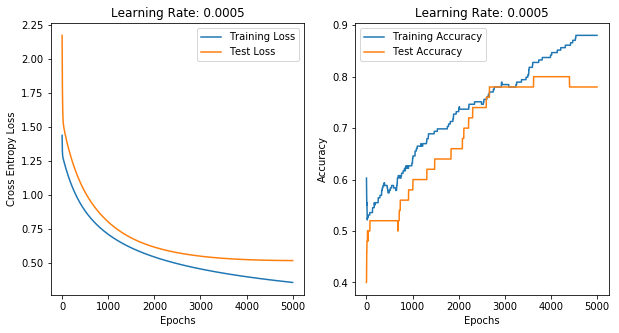

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss_train)
plt.plot(range(epoch),loss_test)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Learning Rate: 0.0005')
plt.subplot(1,2,2)
plt.plot(range(epoch),acc_train)
plt.plot(range(epoch),acc_test)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rate: 0.0005')

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 5000
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc1 = 0
acc2 = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)
loss_train = []
loss_test = []
acc_train = []
acc_test= []

In [ ]:
lrate = 0.9

for i in range(epoch):
    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)

        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

        dz = a - y_train[j]
        dw += x_train[j]*dz
        db += dz

    w = w - (lrate*dw/len(y_train))
    b = b - (lrate*db/len(y_train))
    loss_epoch_train = loss/len(y_train)
    loss_train.append(loss_epoch_train)

    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)
        pred[j] = np.round(a)
    acc1 = sum(pred == y_train)/len(y_train)
    acc_train.append(acc1)

    loss = 0
    for j in range(len(y_test)):
        z = np.dot(w,x_test[j]) + b
        a = sigmoid(z)
        pred_test[j] = np.round(a)
        if y_test[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)
    loss_epoch_test = loss/len(y_test)
    loss_test.append(loss_epoch_test)
    acc2 = sum(pred_test == y_test)/len(y_test)
    acc_test.append(acc2)
    print('Epoch:', i+1, 'CE loss(Train):', loss_epoch_train, 'Accuracy_Train:', acc1, 'CE loss(Test):', loss_epoch_test, 'Accuracy_Test:', acc2)
    dw = np.zeros(w.shape)
    db = 0
    loss = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Epoch: 1 CE loss(Train): [2.62639787] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 2 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [293.03649757] Accuracy_Test: 0.34
Epoch: 3 CE loss(Train): [148.48053161] Accuracy_Train: 0.3444976076555024 CE loss(Test): [1.22108871] Accuracy_Test: 0.66
Epoch: 4 CE loss(Train): [1.24465936] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 5 CE loss(Train): [17.0204618] Accuracy_Train: 0.6555023923444976 CE loss(Test): [295.47537439] Accuracy_Test: 0.34
Epoch: 6 CE loss(Train): [153.5895647] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 7 CE loss(Train): [0.4075292] Accuracy_Train: 0.6555023923444976 CE loss(Test): [13.06854706] Accuracy_Test: 0.34
Epoch: 8 CE loss(Train): [25.20096251] Accuracy_Train: 0.6555023923444976 CE loss(Test): [243.31005061] Accuracy_Test: 0.34
Epoch: 9 CE loss(Train): [117.55740305] Accuracy_Train

Epoch: 70 CE loss(Train): [65.33997068] Accuracy_Train: 0.7177033492822966 CE loss(Test): [53.06808376] Accuracy_Test: 0.48
Epoch: 71 CE loss(Train): [25.40992594] Accuracy_Train: 0.40669856459330145 CE loss(Test): [0.38542738] Accuracy_Test: 0.68
Epoch: 72 CE loss(Train): [1.37704069] Accuracy_Train: 0.6555023923444976 CE loss(Test): [152.13664204] Accuracy_Test: 0.34
Epoch: 73 CE loss(Train): [74.34704763] Accuracy_Train: 0.7177033492822966 CE loss(Test): [49.379057] Accuracy_Test: 0.52
Epoch: 74 CE loss(Train): [23.35006992] Accuracy_Train: 0.42105263157894735 CE loss(Test): [0.23483213] Accuracy_Test: 0.68
Epoch: 75 CE loss(Train): [1.3883053] Accuracy_Train: 0.6555023923444976 CE loss(Test): [177.22202339] Accuracy_Test: 0.34
Epoch: 76 CE loss(Train): [76.03994207] Accuracy_Train: 0.7416267942583732 CE loss(Test): [43.80285591] Accuracy_Test: 0.52
Epoch: 77 CE loss(Train): [20.48283823] Accuracy_Train: 0.47368421052631576 CE loss(Test): [0.12410247] Accuracy_Test: 0.72
Epoch: 78 C

Epoch: 138 CE loss(Train): [14.18304309] Accuracy_Train: 0.5502392344497608 CE loss(Test): [0.39236545] Accuracy_Test: 0.8
Epoch: 139 CE loss(Train): [1.02480712] Accuracy_Train: 0.6555023923444976 CE loss(Test): [219.0096969] Accuracy_Test: 0.34
Epoch: 140 CE loss(Train): [105.46496539] Accuracy_Train: 0.861244019138756 CE loss(Test): [17.24077217] Accuracy_Test: 0.7
Epoch: 141 CE loss(Train): [6.39731267] Accuracy_Train: 0.8660287081339713 CE loss(Test): [15.78025231] Accuracy_Test: 0.72
Epoch: 142 CE loss(Train): [5.57892156] Accuracy_Train: 0.8660287081339713 CE loss(Test): [19.12864624] Accuracy_Test: 0.68
Epoch: 143 CE loss(Train): [6.89632886] Accuracy_Train: 0.8373205741626795 CE loss(Test): [11.75096831] Accuracy_Test: 0.74
Epoch: 144 CE loss(Train): [4.45664078] Accuracy_Train: 0.7511961722488039 CE loss(Test): [61.58349801] Accuracy_Test: 0.48
Epoch: 145 CE loss(Train): [25.33073536] Accuracy_Train: 0.40669856459330145 CE loss(Test): [0.59682236] Accuracy_Test: 0.66
Epoch: 1

Epoch: 205 CE loss(Train): [0.6631494] Accuracy_Train: 0.6555023923444976 CE loss(Test): [152.04645558] Accuracy_Test: 0.34
Epoch: 206 CE loss(Train): [106.28689129] Accuracy_Train: 0.8660287081339713 CE loss(Test): [36.963386] Accuracy_Test: 0.6
Epoch: 207 CE loss(Train): [11.69434203] Accuracy_Train: 0.6411483253588517 CE loss(Test): [1.53981528] Accuracy_Test: 0.8
Epoch: 208 CE loss(Train): [2.24942355] Accuracy_Train: 0.6555023923444976 CE loss(Test): [278.59176097] Accuracy_Test: 0.34
Epoch: 209 CE loss(Train): [132.06936599] Accuracy_Train: 0.7416267942583732 CE loss(Test): [3.25583551] Accuracy_Test: 0.8
Epoch: 210 CE loss(Train): [2.59048936] Accuracy_Train: 0.6746411483253588 CE loss(Test): [206.25700963] Accuracy_Test: 0.32
Epoch: 211 CE loss(Train): [95.68151691] Accuracy_Train: 0.49760765550239233 CE loss(Test): [9.02962272e-06] Accuracy_Test: 0.8
Epoch: 212 CE loss(Train): [1.60557453] Accuracy_Train: 0.6555023923444976 CE loss(Test): [173.47928041] Accuracy_Test: 0.34
Epo

Epoch: 271 CE loss(Train): [1.65805539] Accuracy_Train: 0.7081339712918661 CE loss(Test): [146.42541105] Accuracy_Test: 0.36
Epoch: 272 CE loss(Train): [57.70145726] Accuracy_Train: 0.46411483253588515 CE loss(Test): [0.15879918] Accuracy_Test: 0.76
Epoch: 273 CE loss(Train): [1.29250754] Accuracy_Train: 0.6555023923444976 CE loss(Test): [171.17563391] Accuracy_Test: 0.34
Epoch: 274 CE loss(Train): [111.88798842] Accuracy_Train: 0.8995215311004785 CE loss(Test): [28.87632468] Accuracy_Test: 0.7
Epoch: 275 CE loss(Train): [7.26961695] Accuracy_Train: 0.8277511961722488 CE loss(Test): [6.00734729] Accuracy_Test: 0.82
Epoch: 276 CE loss(Train): [1.94729152] Accuracy_Train: 0.7320574162679426 CE loss(Test): [108.51795289] Accuracy_Test: 0.38
Epoch: 277 CE loss(Train): [40.73111722] Accuracy_Train: 0.46411483253588515 CE loss(Test): [0.16724246] Accuracy_Test: 0.76
Epoch: 278 CE loss(Train): [0.95589414] Accuracy_Train: 0.6555023923444976 CE loss(Test): [169.87214848] Accuracy_Test: 0.34
Ep

Epoch: 337 CE loss(Train): [1.01198118] Accuracy_Train: 0.6842105263157895 CE loss(Test): [210.52616523] Accuracy_Test: 0.32
Epoch: 338 CE loss(Train): [90.95208956] Accuracy_Train: 0.5789473684210527 CE loss(Test): [1.94728065] Accuracy_Test: 0.78
Epoch: 339 CE loss(Train): [2.06381754] Accuracy_Train: 0.6555023923444976 CE loss(Test): [247.65248957] Accuracy_Test: 0.32
Epoch: 340 CE loss(Train): [132.95288852] Accuracy_Train: 0.8851674641148325 CE loss(Test): [10.45958577] Accuracy_Test: 0.78
Epoch: 341 CE loss(Train): [1.67364894] Accuracy_Train: 0.8421052631578947 CE loss(Test): [55.40410936] Accuracy_Test: 0.54
Epoch: 342 CE loss(Train): [14.41213897] Accuracy_Train: 0.6220095693779905 CE loss(Test): [1.83322341] Accuracy_Test: 0.78
Epoch: 343 CE loss(Train): [1.99634531] Accuracy_Train: 0.6555023923444976 CE loss(Test): [258.21116926] Accuracy_Test: 0.32
Epoch: 344 CE loss(Train): [121.85615629] Accuracy_Train: 0.8086124401913876 CE loss(Test): [6.22774034] Accuracy_Test: 0.8
Epo

Epoch: 405 CE loss(Train): [1.85737908] Accuracy_Train: 0.9473684210526315 CE loss(Test): [19.79826503] Accuracy_Test: 0.76
Epoch: 406 CE loss(Train): [1.81584794] Accuracy_Train: 0.9473684210526315 CE loss(Test): [19.95928327] Accuracy_Test: 0.76
Epoch: 407 CE loss(Train): [1.77458569] Accuracy_Train: 0.9473684210526315 CE loss(Test): [20.12056604] Accuracy_Test: 0.76
Epoch: 408 CE loss(Train): [1.73335285] Accuracy_Train: 0.9473684210526315 CE loss(Test): [20.27439738] Accuracy_Test: 0.76
Epoch: 409 CE loss(Train): [1.69209754] Accuracy_Train: 0.9473684210526315 CE loss(Test): [20.39827644] Accuracy_Test: 0.76
Epoch: 410 CE loss(Train): [1.65017514] Accuracy_Train: 0.9473684210526315 CE loss(Test): [20.45904598] Accuracy_Test: 0.74
Epoch: 411 CE loss(Train): [1.60656045] Accuracy_Train: 0.9473684210526315 CE loss(Test): [20.55763382] Accuracy_Test: 0.74
Epoch: 412 CE loss(Train): [1.56453709] Accuracy_Train: 0.9473684210526315 CE loss(Test): [20.56018146] Accuracy_Test: 0.72
Epoch: 4

Epoch: 473 CE loss(Train): [1.36623655] Accuracy_Train: 0.9569377990430622 CE loss(Test): [23.59410748] Accuracy_Test: 0.72
Epoch: 474 CE loss(Train): [1.37229115] Accuracy_Train: 0.9569377990430622 CE loss(Test): [20.27519064] Accuracy_Test: 0.74
Epoch: 475 CE loss(Train): [1.143651] Accuracy_Train: 0.9569377990430622 CE loss(Test): [23.93035153] Accuracy_Test: 0.74
Epoch: 476 CE loss(Train): [1.49273672] Accuracy_Train: 0.9569377990430622 CE loss(Test): [20.24622565] Accuracy_Test: 0.74
Epoch: 477 CE loss(Train): [1.06655502] Accuracy_Train: 0.9569377990430622 CE loss(Test): [24.02546592] Accuracy_Test: 0.72
Epoch: 478 CE loss(Train): [1.41518127] Accuracy_Train: 0.9569377990430622 CE loss(Test): [20.40286522] Accuracy_Test: 0.74
Epoch: 479 CE loss(Train): [1.16415427] Accuracy_Train: 0.9569377990430622 CE loss(Test): [24.38259719] Accuracy_Test: 0.72
Epoch: 480 CE loss(Train): [1.35440123] Accuracy_Train: 0.9617224880382775 CE loss(Test): [19.84731379] Accuracy_Test: 0.74
Epoch: 481

Epoch: 542 CE loss(Train): [0.09848093] Accuracy_Train: 0.9617224880382775 CE loss(Test): [28.8671327] Accuracy_Test: 0.7
Epoch: 543 CE loss(Train): [0.94317452] Accuracy_Train: 0.9665071770334929 CE loss(Test): [14.92346929] Accuracy_Test: 0.72
Epoch: 544 CE loss(Train): [0.28604218] Accuracy_Train: 0.9569377990430622 CE loss(Test): [29.44669469] Accuracy_Test: 0.7
Epoch: 545 CE loss(Train): [0.98891277] Accuracy_Train: 0.9617224880382775 CE loss(Test): [13.91847404] Accuracy_Test: 0.74
Epoch: 546 CE loss(Train): [0.39937074] Accuracy_Train: 0.9425837320574163 CE loss(Test): [30.56969134] Accuracy_Test: 0.7
Epoch: 547 CE loss(Train): [1.1697779] Accuracy_Train: 0.9090909090909091 CE loss(Test): [10.82281134] Accuracy_Test: 0.74
Epoch: 548 CE loss(Train): [0.84005287] Accuracy_Train: 0.8421052631578947 CE loss(Test): [57.90092934] Accuracy_Test: 0.48
Epoch: 549 CE loss(Train): [10.07970809] Accuracy_Train: 0.6746411483253588 CE loss(Test): [2.77678459] Accuracy_Test: 0.78
Epoch: 550 CE

Epoch: 609 CE loss(Train): [0.45067133] Accuracy_Train: 0.9808612440191388 CE loss(Test): [21.51211691] Accuracy_Test: 0.7
Epoch: 610 CE loss(Train): [0.27331961] Accuracy_Train: 0.9760765550239234 CE loss(Test): [30.40479507] Accuracy_Test: 0.7
Epoch: 611 CE loss(Train): [0.42251346] Accuracy_Train: 0.9808612440191388 CE loss(Test): [21.55240388] Accuracy_Test: 0.7
Epoch: 612 CE loss(Train): [0.26687939] Accuracy_Train: 0.9808612440191388 CE loss(Test): [30.46029263] Accuracy_Test: 0.7
Epoch: 613 CE loss(Train): [0.39329359] Accuracy_Train: 0.9808612440191388 CE loss(Test): [21.66110734] Accuracy_Test: 0.7
Epoch: 614 CE loss(Train): [0.25432604] Accuracy_Train: 0.9808612440191388 CE loss(Test): [30.59206099] Accuracy_Test: 0.7
Epoch: 615 CE loss(Train): [0.37335518] Accuracy_Train: 0.9808612440191388 CE loss(Test): [21.67193543] Accuracy_Test: 0.7
Epoch: 616 CE loss(Train): [0.25514938] Accuracy_Train: 0.9808612440191388 CE loss(Test): [30.57538536] Accuracy_Test: 0.7
Epoch: 617 CE lo

Epoch: 680 CE loss(Train): [0.00042748] Accuracy_Train: 1.0 CE loss(Test): [29.05260125] Accuracy_Test: 0.72
Epoch: 681 CE loss(Train): [0.00042149] Accuracy_Train: 1.0 CE loss(Test): [29.05183231] Accuracy_Test: 0.72
Epoch: 682 CE loss(Train): [0.00041572] Accuracy_Train: 1.0 CE loss(Test): [29.05106997] Accuracy_Test: 0.72
Epoch: 683 CE loss(Train): [0.00041016] Accuracy_Train: 1.0 CE loss(Test): [29.05031446] Accuracy_Test: 0.72
Epoch: 684 CE loss(Train): [0.00040479] Accuracy_Train: 1.0 CE loss(Test): [29.04956595] Accuracy_Test: 0.72
Epoch: 685 CE loss(Train): [0.00039961] Accuracy_Train: 1.0 CE loss(Test): [29.04882457] Accuracy_Test: 0.72
Epoch: 686 CE loss(Train): [0.00039459] Accuracy_Train: 1.0 CE loss(Test): [29.04809037] Accuracy_Test: 0.72
Epoch: 687 CE loss(Train): [0.00038974] Accuracy_Train: 1.0 CE loss(Test): [29.04736339] Accuracy_Test: 0.72
Epoch: 688 CE loss(Train): [0.00038504] Accuracy_Train: 1.0 CE loss(Test): [29.04664364] Accuracy_Test: 0.72
Epoch: 689 CE loss(

Epoch: 757 CE loss(Train): [0.00022236] Accuracy_Train: 1.0 CE loss(Test): [29.00963639] Accuracy_Test: 0.72
Epoch: 758 CE loss(Train): [0.00022111] Accuracy_Train: 1.0 CE loss(Test): [29.00922663] Accuracy_Test: 0.72
Epoch: 759 CE loss(Train): [0.00021988] Accuracy_Train: 1.0 CE loss(Test): [29.00881944] Accuracy_Test: 0.72
Epoch: 760 CE loss(Train): [0.00021866] Accuracy_Train: 1.0 CE loss(Test): [29.00841477] Accuracy_Test: 0.72
Epoch: 761 CE loss(Train): [0.00021745] Accuracy_Train: 1.0 CE loss(Test): [29.00801262] Accuracy_Test: 0.72
Epoch: 762 CE loss(Train): [0.00021626] Accuracy_Train: 1.0 CE loss(Test): [29.00761294] Accuracy_Test: 0.72
Epoch: 763 CE loss(Train): [0.00021508] Accuracy_Train: 1.0 CE loss(Test): [29.00721571] Accuracy_Test: 0.72
Epoch: 764 CE loss(Train): [0.00021392] Accuracy_Train: 1.0 CE loss(Test): [29.0068209] Accuracy_Test: 0.72
Epoch: 765 CE loss(Train): [0.00021277] Accuracy_Train: 1.0 CE loss(Test): [29.00642849] Accuracy_Test: 0.72
Epoch: 766 CE loss(T

Epoch: 833 CE loss(Train): [0.00015719] Accuracy_Train: 1.0 CE loss(Test): [28.98426001] Accuracy_Test: 0.72
Epoch: 834 CE loss(Train): [0.0001566] Accuracy_Train: 1.0 CE loss(Test): [28.98398746] Accuracy_Test: 0.72
Epoch: 835 CE loss(Train): [0.00015601] Accuracy_Train: 1.0 CE loss(Test): [28.98371615] Accuracy_Test: 0.72
Epoch: 836 CE loss(Train): [0.00015544] Accuracy_Train: 1.0 CE loss(Test): [28.98344609] Accuracy_Test: 0.72
Epoch: 837 CE loss(Train): [0.00015486] Accuracy_Train: 1.0 CE loss(Test): [28.98317725] Accuracy_Test: 0.72
Epoch: 838 CE loss(Train): [0.00015429] Accuracy_Train: 1.0 CE loss(Test): [28.98290964] Accuracy_Test: 0.72
Epoch: 839 CE loss(Train): [0.00015373] Accuracy_Train: 1.0 CE loss(Test): [28.98264323] Accuracy_Test: 0.72
Epoch: 840 CE loss(Train): [0.00015317] Accuracy_Train: 1.0 CE loss(Test): [28.98237802] Accuracy_Test: 0.72
Epoch: 841 CE loss(Train): [0.00015261] Accuracy_Train: 1.0 CE loss(Test): [28.98211399] Accuracy_Test: 0.72
Epoch: 842 CE loss(T

Epoch: 911 CE loss(Train): [0.00012196] Accuracy_Train: 1.0 CE loss(Test): [28.96609777] Accuracy_Test: 0.72
Epoch: 912 CE loss(Train): [0.00012161] Accuracy_Train: 1.0 CE loss(Test): [28.96589839] Accuracy_Test: 0.72
Epoch: 913 CE loss(Train): [0.00012127] Accuracy_Train: 1.0 CE loss(Test): [28.9656997] Accuracy_Test: 0.72
Epoch: 914 CE loss(Train): [0.00012093] Accuracy_Train: 1.0 CE loss(Test): [28.9655017] Accuracy_Test: 0.72
Epoch: 915 CE loss(Train): [0.00012059] Accuracy_Train: 1.0 CE loss(Test): [28.96530438] Accuracy_Test: 0.72
Epoch: 916 CE loss(Train): [0.00012025] Accuracy_Train: 1.0 CE loss(Test): [28.96510774] Accuracy_Test: 0.72
Epoch: 917 CE loss(Train): [0.00011991] Accuracy_Train: 1.0 CE loss(Test): [28.96491177] Accuracy_Test: 0.72
Epoch: 918 CE loss(Train): [0.00011958] Accuracy_Train: 1.0 CE loss(Test): [28.96471647] Accuracy_Test: 0.72
Epoch: 919 CE loss(Train): [0.00011925] Accuracy_Train: 1.0 CE loss(Test): [28.96452184] Accuracy_Test: 0.72
Epoch: 920 CE loss(Tr

Epoch: 989 CE loss(Train): [9.99361069e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95232338] Accuracy_Test: 0.72
Epoch: 990 CE loss(Train): [9.97064772e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9521667] Accuracy_Test: 0.72
Epoch: 991 CE loss(Train): [9.94779248e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95201045] Accuracy_Test: 0.72
Epoch: 992 CE loss(Train): [9.92504419e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95185463] Accuracy_Test: 0.72
Epoch: 993 CE loss(Train): [9.90240209e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95169923] Accuracy_Test: 0.72
Epoch: 994 CE loss(Train): [9.87986542e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95154426] Accuracy_Test: 0.72
Epoch: 995 CE loss(Train): [9.85743342e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9513897] Accuracy_Test: 0.72
Epoch: 996 CE loss(Train): [9.83510537e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95123556] Accuracy_Test: 0.72
Epoch: 997 CE loss(Train): [9.81288052e-05] Accuracy_Train: 1.0 CE loss(Test): [28.95108183] Accur

Epoch: 1062 CE loss(Train): [8.55937868e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94188285] Accuracy_Test: 0.72
Epoch: 1063 CE loss(Train): [8.54263427e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94175222] Accuracy_Test: 0.72
Epoch: 1064 CE loss(Train): [8.52595642e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94162189] Accuracy_Test: 0.72
Epoch: 1065 CE loss(Train): [8.50934472e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94149185] Accuracy_Test: 0.72
Epoch: 1066 CE loss(Train): [8.49279877e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94136211] Accuracy_Test: 0.72
Epoch: 1067 CE loss(Train): [8.47631818e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94123266] Accuracy_Test: 0.72
Epoch: 1068 CE loss(Train): [8.45990256e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9411035] Accuracy_Test: 0.72
Epoch: 1069 CE loss(Train): [8.44355151e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94097462] Accuracy_Test: 0.72
Epoch: 1070 CE loss(Train): [8.42726466e-05] Accuracy_Train: 1.0 CE loss(Test): [28.94084

Epoch: 1135 CE loss(Train): [7.4900761e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93304686] Accuracy_Test: 0.72
Epoch: 1136 CE loss(Train): [7.4773068e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93293468] Accuracy_Test: 0.72
Epoch: 1137 CE loss(Train): [7.46458161e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93282272] Accuracy_Test: 0.72
Epoch: 1138 CE loss(Train): [7.45190031e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93271098] Accuracy_Test: 0.72
Epoch: 1139 CE loss(Train): [7.43926267e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93259945] Accuracy_Test: 0.72
Epoch: 1140 CE loss(Train): [7.42666846e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93248813] Accuracy_Test: 0.72
Epoch: 1141 CE loss(Train): [7.41411744e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93237702] Accuracy_Test: 0.72
Epoch: 1142 CE loss(Train): [7.40160941e-05] Accuracy_Train: 1.0 CE loss(Test): [28.93226612] Accuracy_Test: 0.72
Epoch: 1143 CE loss(Train): [7.38914414e-05] Accuracy_Train: 1.0 CE loss(Test): [28.932155

Epoch: 1210 CE loss(Train): [6.64097847e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92517869] Accuracy_Test: 0.72
Epoch: 1211 CE loss(Train): [6.63097224e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92508057] Accuracy_Test: 0.72
Epoch: 1212 CE loss(Train): [6.62099652e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92498263] Accuracy_Test: 0.72
Epoch: 1213 CE loss(Train): [6.61105117e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92488484] Accuracy_Test: 0.72
Epoch: 1214 CE loss(Train): [6.60113605e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92478721] Accuracy_Test: 0.72
Epoch: 1215 CE loss(Train): [6.59125102e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92468975] Accuracy_Test: 0.72
Epoch: 1216 CE loss(Train): [6.58139593e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92459245] Accuracy_Test: 0.72
Epoch: 1217 CE loss(Train): [6.57157066e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9244953] Accuracy_Test: 0.72
Epoch: 1218 CE loss(Train): [6.56177507e-05] Accuracy_Train: 1.0 CE loss(Test): [28.92439

Epoch: 1282 CE loss(Train): [5.99093805e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91849956] Accuracy_Test: 0.72
Epoch: 1283 CE loss(Train): [5.98281498e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91841187] Accuracy_Test: 0.72
Epoch: 1284 CE loss(Train): [5.97471416e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91832432] Accuracy_Test: 0.72
Epoch: 1285 CE loss(Train): [5.96663553e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91823689] Accuracy_Test: 0.72
Epoch: 1286 CE loss(Train): [5.95857897e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91814959] Accuracy_Test: 0.72
Epoch: 1287 CE loss(Train): [5.95054441e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91806241] Accuracy_Test: 0.72
Epoch: 1288 CE loss(Train): [5.94253176e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91797537] Accuracy_Test: 0.72
Epoch: 1289 CE loss(Train): [5.93454091e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91788845] Accuracy_Test: 0.72
Epoch: 1290 CE loss(Train): [5.92657179e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9178

Epoch: 1355 CE loss(Train): [5.45125284e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91241341] Accuracy_Test: 0.72
Epoch: 1356 CE loss(Train): [5.44454162e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91233417] Accuracy_Test: 0.72
Epoch: 1357 CE loss(Train): [5.43784709e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91225503] Accuracy_Test: 0.72
Epoch: 1358 CE loss(Train): [5.4311692e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91217599] Accuracy_Test: 0.72
Epoch: 1359 CE loss(Train): [5.42450787e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91209706] Accuracy_Test: 0.72
Epoch: 1360 CE loss(Train): [5.41786306e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91201823] Accuracy_Test: 0.72
Epoch: 1361 CE loss(Train): [5.41123469e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9119395] Accuracy_Test: 0.72
Epoch: 1362 CE loss(Train): [5.4046227e-05] Accuracy_Train: 1.0 CE loss(Test): [28.91186087] Accuracy_Test: 0.72
Epoch: 1363 CE loss(Train): [5.39802704e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9117823

Epoch: 1429 CE loss(Train): [4.99599179e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90681239] Accuracy_Test: 0.72
Epoch: 1430 CE loss(Train): [4.99036529e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90674013] Accuracy_Test: 0.72
Epoch: 1431 CE loss(Train): [4.98475159e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90666794] Accuracy_Test: 0.72
Epoch: 1432 CE loss(Train): [4.97915065e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90659585] Accuracy_Test: 0.72
Epoch: 1433 CE loss(Train): [4.97356242e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90652383] Accuracy_Test: 0.72
Epoch: 1434 CE loss(Train): [4.96798686e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90645191] Accuracy_Test: 0.72
Epoch: 1435 CE loss(Train): [4.96242393e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90638006] Accuracy_Test: 0.72
Epoch: 1436 CE loss(Train): [4.95687358e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90630831] Accuracy_Test: 0.72
Epoch: 1437 CE loss(Train): [4.95133576e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9062

Epoch: 1503 CE loss(Train): [4.61157466e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90168229] Accuracy_Test: 0.72
Epoch: 1504 CE loss(Train): [4.60678873e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90161581] Accuracy_Test: 0.72
Epoch: 1505 CE loss(Train): [4.60201282e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90154941] Accuracy_Test: 0.72
Epoch: 1506 CE loss(Train): [4.59724692e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90148308] Accuracy_Test: 0.72
Epoch: 1507 CE loss(Train): [4.59249098e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90141681] Accuracy_Test: 0.72
Epoch: 1508 CE loss(Train): [4.58774498e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90135062] Accuracy_Test: 0.72
Epoch: 1509 CE loss(Train): [4.58300888e-05] Accuracy_Train: 1.0 CE loss(Test): [28.9012845] Accuracy_Test: 0.72
Epoch: 1510 CE loss(Train): [4.57828266e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90121845] Accuracy_Test: 0.72
Epoch: 1511 CE loss(Train): [4.57356628e-05] Accuracy_Train: 1.0 CE loss(Test): [28.90115

Epoch: 1576 CE loss(Train): [4.28673019e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89700794] Accuracy_Test: 0.72
Epoch: 1577 CE loss(Train): [4.28260095e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89694629] Accuracy_Test: 0.72
Epoch: 1578 CE loss(Train): [4.27847975e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8968847] Accuracy_Test: 0.72
Epoch: 1579 CE loss(Train): [4.27436655e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89682317] Accuracy_Test: 0.72
Epoch: 1580 CE loss(Train): [4.27026134e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8967617] Accuracy_Test: 0.72
Epoch: 1581 CE loss(Train): [4.26616409e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8967003] Accuracy_Test: 0.72
Epoch: 1582 CE loss(Train): [4.26207478e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89663895] Accuracy_Test: 0.72
Epoch: 1583 CE loss(Train): [4.25799339e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89657766] Accuracy_Test: 0.72
Epoch: 1584 CE loss(Train): [4.25391989e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8965164

Epoch: 1649 CE loss(Train): [4.00503613e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89266009] Accuracy_Test: 0.72
Epoch: 1650 CE loss(Train): [4.00143673e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89260258] Accuracy_Test: 0.72
Epoch: 1651 CE loss(Train): [3.99784386e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89254511] Accuracy_Test: 0.72
Epoch: 1652 CE loss(Train): [3.9942575e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8924877] Accuracy_Test: 0.72
Epoch: 1653 CE loss(Train): [3.99067764e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89243035] Accuracy_Test: 0.72
Epoch: 1654 CE loss(Train): [3.98710426e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89237304] Accuracy_Test: 0.72
Epoch: 1655 CE loss(Train): [3.98353734e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89231579] Accuracy_Test: 0.72
Epoch: 1656 CE loss(Train): [3.97997687e-05] Accuracy_Train: 1.0 CE loss(Test): [28.89225859] Accuracy_Test: 0.72
Epoch: 1657 CE loss(Train): [3.97642282e-05] Accuracy_Train: 1.0 CE loss(Test): [28.892201

Epoch: 1722 CE loss(Train): [3.75840393e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88859368] Accuracy_Test: 0.72
Epoch: 1723 CE loss(Train): [3.75523826e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88853975] Accuracy_Test: 0.72
Epoch: 1724 CE loss(Train): [3.75207798e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88848587] Accuracy_Test: 0.72
Epoch: 1725 CE loss(Train): [3.74892306e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88843204] Accuracy_Test: 0.72
Epoch: 1726 CE loss(Train): [3.7457735e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88837825] Accuracy_Test: 0.72
Epoch: 1727 CE loss(Train): [3.74262929e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8883245] Accuracy_Test: 0.72
Epoch: 1728 CE loss(Train): [3.7394904e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8882708] Accuracy_Test: 0.72
Epoch: 1729 CE loss(Train): [3.73635683e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88821715] Accuracy_Test: 0.72
Epoch: 1730 CE loss(Train): [3.73322857e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88816354

Epoch: 1796 CE loss(Train): [3.53784595e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88472169] Accuracy_Test: 0.72
Epoch: 1797 CE loss(Train): [3.53504436e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88467094] Accuracy_Test: 0.72
Epoch: 1798 CE loss(Train): [3.53224725e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88462024] Accuracy_Test: 0.72
Epoch: 1799 CE loss(Train): [3.52945461e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88456957] Accuracy_Test: 0.72
Epoch: 1800 CE loss(Train): [3.52666643e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88451894] Accuracy_Test: 0.72
Epoch: 1801 CE loss(Train): [3.5238827e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88446836] Accuracy_Test: 0.72
Epoch: 1802 CE loss(Train): [3.5211034e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88441781] Accuracy_Test: 0.72
Epoch: 1803 CE loss(Train): [3.51832853e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8843673] Accuracy_Test: 0.72
Epoch: 1804 CE loss(Train): [3.51555808e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8843168

Epoch: 1868 CE loss(Train): [3.3469742e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88116688] Accuracy_Test: 0.72
Epoch: 1869 CE loss(Train): [3.34446958e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88111887] Accuracy_Test: 0.72
Epoch: 1870 CE loss(Train): [3.34196874e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88107089] Accuracy_Test: 0.72
Epoch: 1871 CE loss(Train): [3.33947168e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88102295] Accuracy_Test: 0.72
Epoch: 1872 CE loss(Train): [3.33697839e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88097504] Accuracy_Test: 0.72
Epoch: 1873 CE loss(Train): [3.33448886e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88092717] Accuracy_Test: 0.72
Epoch: 1874 CE loss(Train): [3.33200308e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88087934] Accuracy_Test: 0.72
Epoch: 1875 CE loss(Train): [3.32952104e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88083154] Accuracy_Test: 0.72
Epoch: 1876 CE loss(Train): [3.32704274e-05] Accuracy_Train: 1.0 CE loss(Test): [28.88078

Epoch: 1942 CE loss(Train): [3.17132716e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87770687] Accuracy_Test: 0.72
Epoch: 1943 CE loss(Train): [3.169081e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87766136] Accuracy_Test: 0.72
Epoch: 1944 CE loss(Train): [3.16683806e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87761588] Accuracy_Test: 0.72
Epoch: 1945 CE loss(Train): [3.16459832e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87757043] Accuracy_Test: 0.72
Epoch: 1946 CE loss(Train): [3.16236177e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87752501] Accuracy_Test: 0.72
Epoch: 1947 CE loss(Train): [3.16012843e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87747962] Accuracy_Test: 0.72
Epoch: 1948 CE loss(Train): [3.15789826e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87743426] Accuracy_Test: 0.72
Epoch: 1949 CE loss(Train): [3.15567128e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87738894] Accuracy_Test: 0.72
Epoch: 1950 CE loss(Train): [3.15344747e-05] Accuracy_Train: 1.0 CE loss(Test): [28.877343

Epoch: 2014 CE loss(Train): [3.01742396e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87450859] Accuracy_Test: 0.72
Epoch: 2015 CE loss(Train): [3.0153926e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87446526] Accuracy_Test: 0.72
Epoch: 2016 CE loss(Train): [3.013364e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87442195] Accuracy_Test: 0.72
Epoch: 2017 CE loss(Train): [3.01133817e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87437867] Accuracy_Test: 0.72
Epoch: 2018 CE loss(Train): [3.00931508e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87433542] Accuracy_Test: 0.72
Epoch: 2019 CE loss(Train): [3.00729474e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8742922] Accuracy_Test: 0.72
Epoch: 2020 CE loss(Train): [3.00527713e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87424901] Accuracy_Test: 0.72
Epoch: 2021 CE loss(Train): [3.00326227e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87420585] Accuracy_Test: 0.72
Epoch: 2022 CE loss(Train): [3.00125013e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87416271

Epoch: 2087 CE loss(Train): [2.87605917e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87141809] Accuracy_Test: 0.72
Epoch: 2088 CE loss(Train): [2.87421553e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87137675] Accuracy_Test: 0.72
Epoch: 2089 CE loss(Train): [2.87237428e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87133543] Accuracy_Test: 0.72
Epoch: 2090 CE loss(Train): [2.87053541e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87129414] Accuracy_Test: 0.72
Epoch: 2091 CE loss(Train): [2.86869891e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87125287] Accuracy_Test: 0.72
Epoch: 2092 CE loss(Train): [2.8668648e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87121163] Accuracy_Test: 0.72
Epoch: 2093 CE loss(Train): [2.86503305e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87117042] Accuracy_Test: 0.72
Epoch: 2094 CE loss(Train): [2.86320366e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87112923] Accuracy_Test: 0.72
Epoch: 2095 CE loss(Train): [2.86137664e-05] Accuracy_Train: 1.0 CE loss(Test): [28.87108

Epoch: 2159 CE loss(Train): [2.74915427e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86850569] Accuracy_Test: 0.72
Epoch: 2160 CE loss(Train): [2.74747134e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86846613] Accuracy_Test: 0.72
Epoch: 2161 CE loss(Train): [2.74579048e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86842659] Accuracy_Test: 0.72
Epoch: 2162 CE loss(Train): [2.7441117e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86838708] Accuracy_Test: 0.72
Epoch: 2163 CE loss(Train): [2.742435e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86834759] Accuracy_Test: 0.72
Epoch: 2164 CE loss(Train): [2.74076037e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86830812] Accuracy_Test: 0.72
Epoch: 2165 CE loss(Train): [2.7390878e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86826868] Accuracy_Test: 0.72
Epoch: 2166 CE loss(Train): [2.73741729e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86822926] Accuracy_Test: 0.72
Epoch: 2167 CE loss(Train): [2.73574885e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86818986

Epoch: 2233 CE loss(Train): [2.62999891e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86564001] Accuracy_Test: 0.72
Epoch: 2234 CE loss(Train): [2.62846014e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86560211] Accuracy_Test: 0.72
Epoch: 2235 CE loss(Train): [2.6269232e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86556424] Accuracy_Test: 0.72
Epoch: 2236 CE loss(Train): [2.62538807e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86552639] Accuracy_Test: 0.72
Epoch: 2237 CE loss(Train): [2.62385475e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86548856] Accuracy_Test: 0.72
Epoch: 2238 CE loss(Train): [2.62232324e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86545076] Accuracy_Test: 0.72
Epoch: 2239 CE loss(Train): [2.62079354e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86541297] Accuracy_Test: 0.72
Epoch: 2240 CE loss(Train): [2.61926564e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8653752] Accuracy_Test: 0.72
Epoch: 2241 CE loss(Train): [2.61773954e-05] Accuracy_Train: 1.0 CE loss(Test): [28.865337

Epoch: 2308 CE loss(Train): [2.51943049e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86285595] Accuracy_Test: 0.72
Epoch: 2309 CE loss(Train): [2.51801969e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8628196] Accuracy_Test: 0.72
Epoch: 2310 CE loss(Train): [2.51661048e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86278327] Accuracy_Test: 0.72
Epoch: 2311 CE loss(Train): [2.51520287e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86274696] Accuracy_Test: 0.72
Epoch: 2312 CE loss(Train): [2.51379685e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86271067] Accuracy_Test: 0.72
Epoch: 2313 CE loss(Train): [2.51239242e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86267439] Accuracy_Test: 0.72
Epoch: 2314 CE loss(Train): [2.51098957e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86263814] Accuracy_Test: 0.72
Epoch: 2315 CE loss(Train): [2.5095883e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86260191] Accuracy_Test: 0.72
Epoch: 2316 CE loss(Train): [2.50818862e-05] Accuracy_Train: 1.0 CE loss(Test): [28.862565

Epoch: 2380 CE loss(Train): [2.42177769e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86028763] Accuracy_Test: 0.72
Epoch: 2381 CE loss(Train): [2.42047525e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86025264] Accuracy_Test: 0.72
Epoch: 2382 CE loss(Train): [2.41917422e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86021766] Accuracy_Test: 0.72
Epoch: 2383 CE loss(Train): [2.41787461e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86018271] Accuracy_Test: 0.72
Epoch: 2384 CE loss(Train): [2.41657641e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86014777] Accuracy_Test: 0.72
Epoch: 2385 CE loss(Train): [2.41527962e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86011285] Accuracy_Test: 0.72
Epoch: 2386 CE loss(Train): [2.41398424e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86007795] Accuracy_Test: 0.72
Epoch: 2387 CE loss(Train): [2.41269026e-05] Accuracy_Train: 1.0 CE loss(Test): [28.86004307] Accuracy_Test: 0.72
Epoch: 2388 CE loss(Train): [2.41139768e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8600

Epoch: 2454 CE loss(Train): [2.32907681e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8577459] Accuracy_Test: 0.72
Epoch: 2455 CE loss(Train): [2.32787321e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8577122] Accuracy_Test: 0.72
Epoch: 2456 CE loss(Train): [2.32667086e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85767851] Accuracy_Test: 0.72
Epoch: 2457 CE loss(Train): [2.32546976e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85764484] Accuracy_Test: 0.72
Epoch: 2458 CE loss(Train): [2.32426992e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85761119] Accuracy_Test: 0.72
Epoch: 2459 CE loss(Train): [2.32307133e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85757755] Accuracy_Test: 0.72
Epoch: 2460 CE loss(Train): [2.32187399e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85754393] Accuracy_Test: 0.72
Epoch: 2461 CE loss(Train): [2.3206779e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85751032] Accuracy_Test: 0.72
Epoch: 2462 CE loss(Train): [2.31948305e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8574767

Epoch: 2528 CE loss(Train): [2.24328264e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8552958] Accuracy_Test: 0.72
Epoch: 2529 CE loss(Train): [2.24216701e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85526329] Accuracy_Test: 0.72
Epoch: 2530 CE loss(Train): [2.24105249e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85523079] Accuracy_Test: 0.72
Epoch: 2531 CE loss(Train): [2.23993909e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85519831] Accuracy_Test: 0.72
Epoch: 2532 CE loss(Train): [2.23882682e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85516584] Accuracy_Test: 0.72
Epoch: 2533 CE loss(Train): [2.23771565e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85513339] Accuracy_Test: 0.72
Epoch: 2534 CE loss(Train): [2.23660561e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85510095] Accuracy_Test: 0.72
Epoch: 2535 CE loss(Train): [2.23549668e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85506853] Accuracy_Test: 0.72
Epoch: 2536 CE loss(Train): [2.23438885e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85503

Epoch: 2603 CE loss(Train): [2.16261225e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85289907] Accuracy_Test: 0.72
Epoch: 2604 CE loss(Train): [2.16157626e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85286768] Accuracy_Test: 0.72
Epoch: 2605 CE loss(Train): [2.16054128e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85283629] Accuracy_Test: 0.72
Epoch: 2606 CE loss(Train): [2.1595073e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85280493] Accuracy_Test: 0.72
Epoch: 2607 CE loss(Train): [2.15847431e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85277357] Accuracy_Test: 0.72
Epoch: 2608 CE loss(Train): [2.15744233e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85274223] Accuracy_Test: 0.72
Epoch: 2609 CE loss(Train): [2.15641134e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8527109] Accuracy_Test: 0.72
Epoch: 2610 CE loss(Train): [2.15538135e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85267959] Accuracy_Test: 0.72
Epoch: 2611 CE loss(Train): [2.15435236e-05] Accuracy_Train: 1.0 CE loss(Test): [28.852648

Epoch: 2678 CE loss(Train): [2.08760262e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8505831] Accuracy_Test: 0.72
Epoch: 2679 CE loss(Train): [2.08663802e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85055274] Accuracy_Test: 0.72
Epoch: 2680 CE loss(Train): [2.08567433e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8505224] Accuracy_Test: 0.72
Epoch: 2681 CE loss(Train): [2.08471154e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85049206] Accuracy_Test: 0.72
Epoch: 2682 CE loss(Train): [2.08374965e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85046174] Accuracy_Test: 0.72
Epoch: 2683 CE loss(Train): [2.08278865e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85043143] Accuracy_Test: 0.72
Epoch: 2684 CE loss(Train): [2.08182855e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85040114] Accuracy_Test: 0.72
Epoch: 2685 CE loss(Train): [2.08086935e-05] Accuracy_Train: 1.0 CE loss(Test): [28.85037086] Accuracy_Test: 0.72
Epoch: 2686 CE loss(Train): [2.07991104e-05] Accuracy_Train: 1.0 CE loss(Test): [28.850340

Epoch: 2752 CE loss(Train): [2.01857792e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84837164] Accuracy_Test: 0.72
Epoch: 2753 CE loss(Train): [2.01767676e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84834223] Accuracy_Test: 0.72
Epoch: 2754 CE loss(Train): [2.01677641e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84831283] Accuracy_Test: 0.72
Epoch: 2755 CE loss(Train): [2.01587687e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84828345] Accuracy_Test: 0.72
Epoch: 2756 CE loss(Train): [2.01497815e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84825408] Accuracy_Test: 0.72
Epoch: 2757 CE loss(Train): [2.01408024e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84822473] Accuracy_Test: 0.72
Epoch: 2758 CE loss(Train): [2.01318313e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84819538] Accuracy_Test: 0.72
Epoch: 2759 CE loss(Train): [2.01228683e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84816605] Accuracy_Test: 0.72
Epoch: 2760 CE loss(Train): [2.01139134e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8481

Epoch: 2825 CE loss(Train): [1.95486504e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84625693] Accuracy_Test: 0.72
Epoch: 2826 CE loss(Train): [1.9540205e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8462284] Accuracy_Test: 0.72
Epoch: 2827 CE loss(Train): [1.95317669e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84619989] Accuracy_Test: 0.72
Epoch: 2828 CE loss(Train): [1.95233363e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84617138] Accuracy_Test: 0.72
Epoch: 2829 CE loss(Train): [1.9514913e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84614289] Accuracy_Test: 0.72
Epoch: 2830 CE loss(Train): [1.9506497e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84611441] Accuracy_Test: 0.72
Epoch: 2831 CE loss(Train): [1.94980884e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84608594] Accuracy_Test: 0.72
Epoch: 2832 CE loss(Train): [1.94896872e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84605748] Accuracy_Test: 0.72
Epoch: 2833 CE loss(Train): [1.94812932e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84602904

Epoch: 2899 CE loss(Train): [1.89430172e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84417671] Accuracy_Test: 0.72
Epoch: 2900 CE loss(Train): [1.89350928e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84414901] Accuracy_Test: 0.72
Epoch: 2901 CE loss(Train): [1.89271752e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84412133] Accuracy_Test: 0.72
Epoch: 2902 CE loss(Train): [1.89192643e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84409366] Accuracy_Test: 0.72
Epoch: 2903 CE loss(Train): [1.891136e-05] Accuracy_Train: 1.0 CE loss(Test): [28.844066] Accuracy_Test: 0.72
Epoch: 2904 CE loss(Train): [1.89034625e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84403835] Accuracy_Test: 0.72
Epoch: 2905 CE loss(Train): [1.88955716e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84401072] Accuracy_Test: 0.72
Epoch: 2906 CE loss(Train): [1.88876874e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84398309] Accuracy_Test: 0.72
Epoch: 2907 CE loss(Train): [1.88798098e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84395547

Epoch: 2974 CE loss(Train): [1.83667459e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84212949] Accuracy_Test: 0.72
Epoch: 2975 CE loss(Train): [1.83593019e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84210259] Accuracy_Test: 0.72
Epoch: 2976 CE loss(Train): [1.8351864e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84207571] Accuracy_Test: 0.72
Epoch: 2977 CE loss(Train): [1.83444322e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84204883] Accuracy_Test: 0.72
Epoch: 2978 CE loss(Train): [1.83370065e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84202196] Accuracy_Test: 0.72
Epoch: 2979 CE loss(Train): [1.83295868e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8419951] Accuracy_Test: 0.72
Epoch: 2980 CE loss(Train): [1.83221732e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84196826] Accuracy_Test: 0.72
Epoch: 2981 CE loss(Train): [1.83147657e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84194142] Accuracy_Test: 0.72
Epoch: 2982 CE loss(Train): [1.83073643e-05] Accuracy_Train: 1.0 CE loss(Test): [28.841914

Epoch: 3049 CE loss(Train): [1.78248933e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84014007] Accuracy_Test: 0.72
Epoch: 3050 CE loss(Train): [1.78178871e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84011392] Accuracy_Test: 0.72
Epoch: 3051 CE loss(Train): [1.78108865e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84008778] Accuracy_Test: 0.72
Epoch: 3052 CE loss(Train): [1.78038914e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84006165] Accuracy_Test: 0.72
Epoch: 3053 CE loss(Train): [1.77969019e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84003553] Accuracy_Test: 0.72
Epoch: 3054 CE loss(Train): [1.7789918e-05] Accuracy_Train: 1.0 CE loss(Test): [28.84000941] Accuracy_Test: 0.72
Epoch: 3055 CE loss(Train): [1.77829396e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83998331] Accuracy_Test: 0.72
Epoch: 3056 CE loss(Train): [1.77759667e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83995722] Accuracy_Test: 0.72
Epoch: 3057 CE loss(Train): [1.77689994e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83993

Epoch: 3121 CE loss(Train): [1.73343069e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83828143] Accuracy_Test: 0.72
Epoch: 3122 CE loss(Train): [1.73276855e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83825595] Accuracy_Test: 0.72
Epoch: 3123 CE loss(Train): [1.73210694e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83823049] Accuracy_Test: 0.72
Epoch: 3124 CE loss(Train): [1.73144583e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83820503] Accuracy_Test: 0.72
Epoch: 3125 CE loss(Train): [1.73078523e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83817958] Accuracy_Test: 0.72
Epoch: 3126 CE loss(Train): [1.73012514e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83815414] Accuracy_Test: 0.72
Epoch: 3127 CE loss(Train): [1.72946557e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83812871] Accuracy_Test: 0.72
Epoch: 3128 CE loss(Train): [1.7288065e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83810329] Accuracy_Test: 0.72
Epoch: 3129 CE loss(Train): [1.72814794e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83807

Epoch: 3193 CE loss(Train): [1.68703131e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83647014] Accuracy_Test: 0.72
Epoch: 3194 CE loss(Train): [1.68640457e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8364453] Accuracy_Test: 0.72
Epoch: 3195 CE loss(Train): [1.6857783e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83642048] Accuracy_Test: 0.72
Epoch: 3196 CE loss(Train): [1.68515251e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83639566] Accuracy_Test: 0.72
Epoch: 3197 CE loss(Train): [1.68452719e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83637085] Accuracy_Test: 0.72
Epoch: 3198 CE loss(Train): [1.68390233e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83634605] Accuracy_Test: 0.72
Epoch: 3199 CE loss(Train): [1.68327795e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83632125] Accuracy_Test: 0.72
Epoch: 3200 CE loss(Train): [1.68265403e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83629647] Accuracy_Test: 0.72
Epoch: 3201 CE loss(Train): [1.68203058e-05] Accuracy_Train: 1.0 CE loss(Test): [28.836271

Epoch: 3267 CE loss(Train): [1.64189241e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83465522] Accuracy_Test: 0.72
Epoch: 3268 CE loss(Train): [1.64129917e-05] Accuracy_Train: 1.0 CE loss(Test): [28.834631] Accuracy_Test: 0.72
Epoch: 3269 CE loss(Train): [1.64070636e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8346068] Accuracy_Test: 0.72
Epoch: 3270 CE loss(Train): [1.64011399e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8345826] Accuracy_Test: 0.72
Epoch: 3271 CE loss(Train): [1.63952205e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83455841] Accuracy_Test: 0.72
Epoch: 3272 CE loss(Train): [1.63893054e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83453423] Accuracy_Test: 0.72
Epoch: 3273 CE loss(Train): [1.63833946e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83451006] Accuracy_Test: 0.72
Epoch: 3274 CE loss(Train): [1.63774882e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83448589] Accuracy_Test: 0.72
Epoch: 3275 CE loss(Train): [1.6371586e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83446174]

Epoch: 3340 CE loss(Train): [1.59969744e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83290875] Accuracy_Test: 0.72
Epoch: 3341 CE loss(Train): [1.59913467e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83288512] Accuracy_Test: 0.72
Epoch: 3342 CE loss(Train): [1.5985723e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83286149] Accuracy_Test: 0.72
Epoch: 3343 CE loss(Train): [1.59801034e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83283787] Accuracy_Test: 0.72
Epoch: 3344 CE loss(Train): [1.59744877e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83281427] Accuracy_Test: 0.72
Epoch: 3345 CE loss(Train): [1.5968876e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83279066] Accuracy_Test: 0.72
Epoch: 3346 CE loss(Train): [1.59632683e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83276707] Accuracy_Test: 0.72
Epoch: 3347 CE loss(Train): [1.59576646e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83274349] Accuracy_Test: 0.72
Epoch: 3348 CE loss(Train): [1.59520649e-05] Accuracy_Train: 1.0 CE loss(Test): [28.832719

Epoch: 3414 CE loss(Train): [1.55910833e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83118058] Accuracy_Test: 0.72
Epoch: 3415 CE loss(Train): [1.55857411e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8311575] Accuracy_Test: 0.72
Epoch: 3416 CE loss(Train): [1.55804026e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83113444] Accuracy_Test: 0.72
Epoch: 3417 CE loss(Train): [1.55750678e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83111138] Accuracy_Test: 0.72
Epoch: 3418 CE loss(Train): [1.55697367e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83108833] Accuracy_Test: 0.72
Epoch: 3419 CE loss(Train): [1.55644093e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83106529] Accuracy_Test: 0.72
Epoch: 3420 CE loss(Train): [1.55590856e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83104225] Accuracy_Test: 0.72
Epoch: 3421 CE loss(Train): [1.55537656e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83101922] Accuracy_Test: 0.72
Epoch: 3422 CE loss(Train): [1.55484493e-05] Accuracy_Train: 1.0 CE loss(Test): [28.83099

Epoch: 3486 CE loss(Train): [1.52156965e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82953788] Accuracy_Test: 0.72
Epoch: 3487 CE loss(Train): [1.52106117e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82951533] Accuracy_Test: 0.72
Epoch: 3488 CE loss(Train): [1.52055303e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82949278] Accuracy_Test: 0.72
Epoch: 3489 CE loss(Train): [1.52004524e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82947024] Accuracy_Test: 0.72
Epoch: 3490 CE loss(Train): [1.51953779e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82944771] Accuracy_Test: 0.72
Epoch: 3491 CE loss(Train): [1.51903068e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82942518] Accuracy_Test: 0.72
Epoch: 3492 CE loss(Train): [1.51852392e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82940266] Accuracy_Test: 0.72
Epoch: 3493 CE loss(Train): [1.5180175e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82938015] Accuracy_Test: 0.72
Epoch: 3494 CE loss(Train): [1.51751142e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82935

Epoch: 3559 CE loss(Train): [1.48533388e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82790952] Accuracy_Test: 0.72
Epoch: 3560 CE loss(Train): [1.48484964e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82788747] Accuracy_Test: 0.72
Epoch: 3561 CE loss(Train): [1.48436571e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82786542] Accuracy_Test: 0.72
Epoch: 3562 CE loss(Train): [1.48388211e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82784338] Accuracy_Test: 0.72
Epoch: 3563 CE loss(Train): [1.48339882e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82782134] Accuracy_Test: 0.72
Epoch: 3564 CE loss(Train): [1.48291586e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82779931] Accuracy_Test: 0.72
Epoch: 3565 CE loss(Train): [1.48243321e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82777729] Accuracy_Test: 0.72
Epoch: 3566 CE loss(Train): [1.48195088e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82775528] Accuracy_Test: 0.72
Epoch: 3567 CE loss(Train): [1.48146887e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8277

Epoch: 3634 CE loss(Train): [1.44988233e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82627365] Accuracy_Test: 0.72
Epoch: 3635 CE loss(Train): [1.44942122e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82625208] Accuracy_Test: 0.72
Epoch: 3636 CE loss(Train): [1.44896042e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82623052] Accuracy_Test: 0.72
Epoch: 3637 CE loss(Train): [1.4484999e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82620897] Accuracy_Test: 0.72
Epoch: 3638 CE loss(Train): [1.44803969e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82618742] Accuracy_Test: 0.72
Epoch: 3639 CE loss(Train): [1.44757977e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82616588] Accuracy_Test: 0.72
Epoch: 3640 CE loss(Train): [1.44712014e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82614435] Accuracy_Test: 0.72
Epoch: 3641 CE loss(Train): [1.44666082e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82612282] Accuracy_Test: 0.72
Epoch: 3642 CE loss(Train): [1.44620178e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82610

Epoch: 3708 CE loss(Train): [1.41654491e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82469472] Accuracy_Test: 0.72
Epoch: 3709 CE loss(Train): [1.41610504e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82467361] Accuracy_Test: 0.72
Epoch: 3710 CE loss(Train): [1.41566545e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82465251] Accuracy_Test: 0.72
Epoch: 3711 CE loss(Train): [1.41522613e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82463142] Accuracy_Test: 0.72
Epoch: 3712 CE loss(Train): [1.41478709e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82461033] Accuracy_Test: 0.72
Epoch: 3713 CE loss(Train): [1.41434833e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82458925] Accuracy_Test: 0.72
Epoch: 3714 CE loss(Train): [1.41390984e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82456817] Accuracy_Test: 0.72
Epoch: 3715 CE loss(Train): [1.41347163e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82454711] Accuracy_Test: 0.72
Epoch: 3716 CE loss(Train): [1.4130337e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82452

Epoch: 3781 CE loss(Train): [1.3851461e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82316976] Accuracy_Test: 0.72
Epoch: 3782 CE loss(Train): [1.38472578e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82314908] Accuracy_Test: 0.72
Epoch: 3783 CE loss(Train): [1.38430571e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82312842] Accuracy_Test: 0.72
Epoch: 3784 CE loss(Train): [1.3838859e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82310776] Accuracy_Test: 0.72
Epoch: 3785 CE loss(Train): [1.38346634e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8230871] Accuracy_Test: 0.72
Epoch: 3786 CE loss(Train): [1.38304705e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82306646] Accuracy_Test: 0.72
Epoch: 3787 CE loss(Train): [1.38262801e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82304581] Accuracy_Test: 0.72
Epoch: 3788 CE loss(Train): [1.38220923e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82302518] Accuracy_Test: 0.72
Epoch: 3789 CE loss(Train): [1.38179071e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8230045

Epoch: 3855 CE loss(Train): [1.35472513e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82165552] Accuracy_Test: 0.72
Epoch: 3856 CE loss(Train): [1.35432331e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82163527] Accuracy_Test: 0.72
Epoch: 3857 CE loss(Train): [1.35392173e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82161502] Accuracy_Test: 0.72
Epoch: 3858 CE loss(Train): [1.35352039e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82159478] Accuracy_Test: 0.72
Epoch: 3859 CE loss(Train): [1.35311929e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82157455] Accuracy_Test: 0.72
Epoch: 3860 CE loss(Train): [1.35271844e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82155432] Accuracy_Test: 0.72
Epoch: 3861 CE loss(Train): [1.35231782e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8215341] Accuracy_Test: 0.72
Epoch: 3862 CE loss(Train): [1.35191745e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82151388] Accuracy_Test: 0.72
Epoch: 3863 CE loss(Train): [1.35151732e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82149

Epoch: 3927 CE loss(Train): [1.32639897e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82021145] Accuracy_Test: 0.72
Epoch: 3928 CE loss(Train): [1.32601401e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82019159] Accuracy_Test: 0.72
Epoch: 3929 CE loss(Train): [1.32562927e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82017174] Accuracy_Test: 0.72
Epoch: 3930 CE loss(Train): [1.32524476e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82015189] Accuracy_Test: 0.72
Epoch: 3931 CE loss(Train): [1.32486047e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82013205] Accuracy_Test: 0.72
Epoch: 3932 CE loss(Train): [1.32447641e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82011221] Accuracy_Test: 0.72
Epoch: 3933 CE loss(Train): [1.32409258e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82009238] Accuracy_Test: 0.72
Epoch: 3934 CE loss(Train): [1.32370897e-05] Accuracy_Train: 1.0 CE loss(Test): [28.82007255] Accuracy_Test: 0.72
Epoch: 3935 CE loss(Train): [1.32332559e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8200

Epoch: 4001 CE loss(Train): [1.29851086e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81875606] Accuracy_Test: 0.72
Epoch: 4002 CE loss(Train): [1.29814213e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81873659] Accuracy_Test: 0.72
Epoch: 4003 CE loss(Train): [1.29777362e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81871712] Accuracy_Test: 0.72
Epoch: 4004 CE loss(Train): [1.29740532e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81869765] Accuracy_Test: 0.72
Epoch: 4005 CE loss(Train): [1.29703723e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8186782] Accuracy_Test: 0.72
Epoch: 4006 CE loss(Train): [1.29666936e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81865874] Accuracy_Test: 0.72
Epoch: 4007 CE loss(Train): [1.29630169e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8186393] Accuracy_Test: 0.72
Epoch: 4008 CE loss(Train): [1.29593424e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81861985] Accuracy_Test: 0.72
Epoch: 4009 CE loss(Train): [1.295567e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81860042

Epoch: 4074 CE loss(Train): [1.27214086e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81734776] Accuracy_Test: 0.72
Epoch: 4075 CE loss(Train): [1.27178717e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81732865] Accuracy_Test: 0.72
Epoch: 4076 CE loss(Train): [1.27143368e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81730954] Accuracy_Test: 0.72
Epoch: 4077 CE loss(Train): [1.27108039e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81729045] Accuracy_Test: 0.72
Epoch: 4078 CE loss(Train): [1.27072729e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81727135] Accuracy_Test: 0.72
Epoch: 4079 CE loss(Train): [1.2703744e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81725226] Accuracy_Test: 0.72
Epoch: 4080 CE loss(Train): [1.2700217e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81723318] Accuracy_Test: 0.72
Epoch: 4081 CE loss(Train): [1.2696692e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8172141] Accuracy_Test: 0.72
Epoch: 4082 CE loss(Train): [1.2693169e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81719503]

Epoch: 4148 CE loss(Train): [1.24649571e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81594683] Accuracy_Test: 0.72
Epoch: 4149 CE loss(Train): [1.24615633e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81592808] Accuracy_Test: 0.72
Epoch: 4150 CE loss(Train): [1.24581714e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81590933] Accuracy_Test: 0.72
Epoch: 4151 CE loss(Train): [1.24547814e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81589059] Accuracy_Test: 0.72
Epoch: 4152 CE loss(Train): [1.24513933e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81587185] Accuracy_Test: 0.72
Epoch: 4153 CE loss(Train): [1.2448007e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81585312] Accuracy_Test: 0.72
Epoch: 4154 CE loss(Train): [1.24446227e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81583439] Accuracy_Test: 0.72
Epoch: 4155 CE loss(Train): [1.24412401e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81581567] Accuracy_Test: 0.72
Epoch: 4156 CE loss(Train): [1.24378595e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81579

Epoch: 4220 CE loss(Train): [1.22253078e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81460854] Accuracy_Test: 0.72
Epoch: 4221 CE loss(Train): [1.22220451e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81459012] Accuracy_Test: 0.72
Epoch: 4222 CE loss(Train): [1.22187842e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8145717] Accuracy_Test: 0.72
Epoch: 4223 CE loss(Train): [1.22155251e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81455329] Accuracy_Test: 0.72
Epoch: 4224 CE loss(Train): [1.22122678e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81453489] Accuracy_Test: 0.72
Epoch: 4225 CE loss(Train): [1.22090122e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81451649] Accuracy_Test: 0.72
Epoch: 4226 CE loss(Train): [1.22057584e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81449809] Accuracy_Test: 0.72
Epoch: 4227 CE loss(Train): [1.22025063e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8144797] Accuracy_Test: 0.72
Epoch: 4228 CE loss(Train): [1.2199256e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8144613

Epoch: 4294 CE loss(Train): [1.19885529e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81325754] Accuracy_Test: 0.72
Epoch: 4295 CE loss(Train): [1.19854172e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81323945] Accuracy_Test: 0.72
Epoch: 4296 CE loss(Train): [1.19822832e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81322136] Accuracy_Test: 0.72
Epoch: 4297 CE loss(Train): [1.19791508e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81320328] Accuracy_Test: 0.72
Epoch: 4298 CE loss(Train): [1.19760201e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8131852] Accuracy_Test: 0.72
Epoch: 4299 CE loss(Train): [1.19728911e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81316713] Accuracy_Test: 0.72
Epoch: 4300 CE loss(Train): [1.19697637e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81314906] Accuracy_Test: 0.72
Epoch: 4301 CE loss(Train): [1.1966638e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81313099] Accuracy_Test: 0.72
Epoch: 4302 CE loss(Train): [1.1963514e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8131129

Epoch: 4367 CE loss(Train): [1.17639417e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81194819] Accuracy_Test: 0.72
Epoch: 4368 CE loss(Train): [1.17609242e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81193041] Accuracy_Test: 0.72
Epoch: 4369 CE loss(Train): [1.17579082e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81191264] Accuracy_Test: 0.72
Epoch: 4370 CE loss(Train): [1.17548938e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81189487] Accuracy_Test: 0.72
Epoch: 4371 CE loss(Train): [1.17518809e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8118771] Accuracy_Test: 0.72
Epoch: 4372 CE loss(Train): [1.17488696e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81185934] Accuracy_Test: 0.72
Epoch: 4373 CE loss(Train): [1.17458599e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81184158] Accuracy_Test: 0.72
Epoch: 4374 CE loss(Train): [1.17428517e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81182383] Accuracy_Test: 0.72
Epoch: 4375 CE loss(Train): [1.17398451e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81180

Epoch: 4440 CE loss(Train): [1.15477135e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81066121] Accuracy_Test: 0.72
Epoch: 4441 CE loss(Train): [1.15448075e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81064373] Accuracy_Test: 0.72
Epoch: 4442 CE loss(Train): [1.1541903e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81062626] Accuracy_Test: 0.72
Epoch: 4443 CE loss(Train): [1.15389999e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81060879] Accuracy_Test: 0.72
Epoch: 4444 CE loss(Train): [1.15360984e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81059132] Accuracy_Test: 0.72
Epoch: 4445 CE loss(Train): [1.15331983e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81057386] Accuracy_Test: 0.72
Epoch: 4446 CE loss(Train): [1.15302997e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8105564] Accuracy_Test: 0.72
Epoch: 4447 CE loss(Train): [1.15274026e-05] Accuracy_Train: 1.0 CE loss(Test): [28.81053895] Accuracy_Test: 0.72
Epoch: 4448 CE loss(Train): [1.15245069e-05] Accuracy_Train: 1.0 CE loss(Test): [28.810521

Epoch: 4513 CE loss(Train): [1.13394067e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80939579] Accuracy_Test: 0.72
Epoch: 4514 CE loss(Train): [1.13366061e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80937861] Accuracy_Test: 0.72
Epoch: 4515 CE loss(Train): [1.1333807e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80936142] Accuracy_Test: 0.72
Epoch: 4516 CE loss(Train): [1.13310092e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80934424] Accuracy_Test: 0.72
Epoch: 4517 CE loss(Train): [1.13282129e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80932706] Accuracy_Test: 0.72
Epoch: 4518 CE loss(Train): [1.1325418e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80930989] Accuracy_Test: 0.72
Epoch: 4519 CE loss(Train): [1.13226244e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80929272] Accuracy_Test: 0.72
Epoch: 4520 CE loss(Train): [1.13198323e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80927556] Accuracy_Test: 0.72
Epoch: 4521 CE loss(Train): [1.13170415e-05] Accuracy_Train: 1.0 CE loss(Test): [28.809258

Epoch: 4585 CE loss(Train): [1.1141295e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80816809] Accuracy_Test: 0.72
Epoch: 4586 CE loss(Train): [1.11385929e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80815117] Accuracy_Test: 0.72
Epoch: 4587 CE loss(Train): [1.11358922e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80813427] Accuracy_Test: 0.72
Epoch: 4588 CE loss(Train): [1.11331928e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80811736] Accuracy_Test: 0.72
Epoch: 4589 CE loss(Train): [1.11304947e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80810046] Accuracy_Test: 0.72
Epoch: 4590 CE loss(Train): [1.11277979e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80808356] Accuracy_Test: 0.72
Epoch: 4591 CE loss(Train): [1.11251025e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80806667] Accuracy_Test: 0.72
Epoch: 4592 CE loss(Train): [1.11224084e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80804978] Accuracy_Test: 0.72
Epoch: 4593 CE loss(Train): [1.11197157e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80803

Epoch: 4657 CE loss(Train): [1.09500904e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80695991] Accuracy_Test: 0.72
Epoch: 4658 CE loss(Train): [1.09474817e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80694327] Accuracy_Test: 0.72
Epoch: 4659 CE loss(Train): [1.09448743e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80692663] Accuracy_Test: 0.72
Epoch: 4660 CE loss(Train): [1.09422681e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80690999] Accuracy_Test: 0.72
Epoch: 4661 CE loss(Train): [1.09396632e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80689335] Accuracy_Test: 0.72
Epoch: 4662 CE loss(Train): [1.09370596e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80687672] Accuracy_Test: 0.72
Epoch: 4663 CE loss(Train): [1.09344572e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80686009] Accuracy_Test: 0.72
Epoch: 4664 CE loss(Train): [1.09318561e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80684347] Accuracy_Test: 0.72
Epoch: 4665 CE loss(Train): [1.09292562e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8068

Epoch: 4730 CE loss(Train): [1.07629173e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80575423] Accuracy_Test: 0.72
Epoch: 4731 CE loss(Train): [1.07603984e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80573785] Accuracy_Test: 0.72
Epoch: 4732 CE loss(Train): [1.07578807e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80572147] Accuracy_Test: 0.72
Epoch: 4733 CE loss(Train): [1.07553642e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80570509] Accuracy_Test: 0.72
Epoch: 4734 CE loss(Train): [1.07528489e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80568872] Accuracy_Test: 0.72
Epoch: 4735 CE loss(Train): [1.07503348e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80567235] Accuracy_Test: 0.72
Epoch: 4736 CE loss(Train): [1.07478219e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80565598] Accuracy_Test: 0.72
Epoch: 4737 CE loss(Train): [1.07453102e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80563962] Accuracy_Test: 0.72
Epoch: 4738 CE loss(Train): [1.07427997e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8056

Epoch: 4802 CE loss(Train): [1.05845683e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80458344] Accuracy_Test: 0.72
Epoch: 4803 CE loss(Train): [1.05821335e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80456731] Accuracy_Test: 0.72
Epoch: 4804 CE loss(Train): [1.05796998e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80455117] Accuracy_Test: 0.72
Epoch: 4805 CE loss(Train): [1.05772673e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80453505] Accuracy_Test: 0.72
Epoch: 4806 CE loss(Train): [1.05748359e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80451892] Accuracy_Test: 0.72
Epoch: 4807 CE loss(Train): [1.05724057e-05] Accuracy_Train: 1.0 CE loss(Test): [28.8045028] Accuracy_Test: 0.72
Epoch: 4808 CE loss(Train): [1.05699765e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80448668] Accuracy_Test: 0.72
Epoch: 4809 CE loss(Train): [1.05675486e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80447057] Accuracy_Test: 0.72
Epoch: 4810 CE loss(Train): [1.05651217e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80445

Epoch: 4876 CE loss(Train): [1.04074167e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80339852] Accuracy_Test: 0.72
Epoch: 4877 CE loss(Train): [1.0405064e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80338263] Accuracy_Test: 0.72
Epoch: 4878 CE loss(Train): [1.04027124e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80336675] Accuracy_Test: 0.72
Epoch: 4879 CE loss(Train): [1.04003619e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80335086] Accuracy_Test: 0.72
Epoch: 4880 CE loss(Train): [1.03980124e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80333499] Accuracy_Test: 0.72
Epoch: 4881 CE loss(Train): [1.03956641e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80331911] Accuracy_Test: 0.72
Epoch: 4882 CE loss(Train): [1.03933168e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80330324] Accuracy_Test: 0.72
Epoch: 4883 CE loss(Train): [1.03909706e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80328737] Accuracy_Test: 0.72
Epoch: 4884 CE loss(Train): [1.03886254e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80327

Epoch: 4950 CE loss(Train): [1.02361903e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80223163] Accuracy_Test: 0.72
Epoch: 4951 CE loss(Train): [1.02339157e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80221598] Accuracy_Test: 0.72
Epoch: 4952 CE loss(Train): [1.0231642e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80220033] Accuracy_Test: 0.72
Epoch: 4953 CE loss(Train): [1.02293694e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80218469] Accuracy_Test: 0.72
Epoch: 4954 CE loss(Train): [1.02270978e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80216905] Accuracy_Test: 0.72
Epoch: 4955 CE loss(Train): [1.02248273e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80215342] Accuracy_Test: 0.72
Epoch: 4956 CE loss(Train): [1.02225578e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80213779] Accuracy_Test: 0.72
Epoch: 4957 CE loss(Train): [1.02202893e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80212216] Accuracy_Test: 0.72
Epoch: 4958 CE loss(Train): [1.02180218e-05] Accuracy_Train: 1.0 CE loss(Test): [28.80210

Text(0.5, 1.0, 'Learning Rate: 0.9')

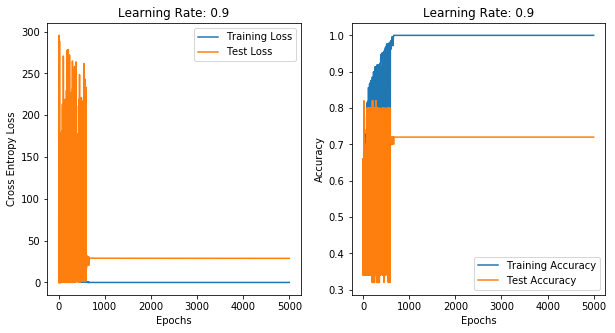

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss_train)
plt.plot(range(epoch),loss_test)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Learning Rate: 0.9')
plt.subplot(1,2,2)
plt.plot(range(epoch),acc_train)
plt.plot(range(epoch),acc_test)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rate: 0.9')

now without normalization

In [ ]:
test = h5py.File("test.h5", 'r')
#Convert 3-d images into 1-d by vectorizing the matrix
x_test = np.array(test['test_set_x']).reshape(50,-1)
y_test = np.array(test['test_set_y'])
train = h5py.File('train.h5', 'r')
x_train = np.array(train['train_set_x']).reshape(209,-1)
y_train = np.array(train['train_set_y'])

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.001)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
lrate = 0.01
loss = 0

for i in range(epoch):
    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)

        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        loss += np.nan_to_num(CE)

        dz = a - y_train[j]
        dw += x_train[j]*dz
        db += dz

    w = w - (lrate*dw/len(y_train))
    b = b - (lrate*db/len(y_train))
    loss_epoch_train = loss/len(y_train)

    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)
        pred[j] = np.round(a)

    loss = 0
    for j in range(len(y_test)):
        z = np.dot(w,x_test[j]) + b
        a = sigmoid(z)
        pred_test[j] = np.round(a)
        if y_test[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

    loss_epoch_test = loss/len(y_test)
    print('Epoch:', i+1, 'CE loss(Train):', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train)/len(y_train), 'CE loss(Test):', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test)/len(y_test))
    dw = np.zeros(w.shape)
    db = 0
    loss = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in add
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log


Epoch: 1 CE loss(Train): [inf] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 2 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


Epoch: 3 CE loss(Train): [inf] Accuracy_Train: 0.3492822966507177 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 4 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 5 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 6 CE loss(Train): [inf] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 7 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 8 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 9 CE loss(Train): [inf] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 10 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 11 CE loss(Train): [inf] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 12 CE loss(Train): [inf] Accuracy_Tra

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
lrate = 0.0001

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)


    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)

    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)


    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train.reshape(-1,1))/len(y_train), 'CE loss:', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test.reshape(-1,1))/len(y_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Epoch: 1 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 2 CE loss: nan Accuracy_Train: [0.35406699] CE loss: nan Accuracy_Test: [0.66]
Epoch: 3 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 4 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 5 CE loss: nan Accuracy_Train: [0.3492823] CE loss: nan Accuracy_Test: [0.66]
Epoch: 6 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 7 CE loss: nan Accuracy_Train: [0.67464115] CE loss: nan Accuracy_Test: [0.36]
Epoch: 8 CE loss: nan Accuracy_Train: [0.33971292] CE loss: nan Accuracy_Test: [0.66]
Epoch: 9 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 10 CE loss: nan Accuracy_Train: [0.68421053] CE loss: nan Accuracy_Test: [0.4]
Epoch: 11 CE loss: nan Accuracy_Train: [0.3492823] CE loss: nan Accuracy_Test: [0.66]
Epoch: 12 CE loss: nan Accuracy_Train: [0.65550239] CE 

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
lrate = 0.005

for i in range(epoch):
    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)

        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)

        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

        dz = a - y_train[j]
        dw += x_train[j]*dz
        db += dz

    w = w - (lrate*dw/len(y_train))
    b = b - (lrate*db/len(y_train))
    loss_epoch_train = loss/len(y_train)

    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)
        pred[j] = np.round(a)

    loss = 0
    for j in range(len(y_test)):
        z = np.dot(w,x_test[j]) + b
        a = sigmoid(z)
        pred_test[j] = np.round(a)
        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

    loss_epoch_test = loss/len(y_test)
    print('Epoch:', i+1, 'CE loss(Train):', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train)/len(y_train), 'CE loss(Test):', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test)/len(y_test))
    dw = np.zeros(w.shape)
    db = 0
    loss = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


Epoch: 1 CE loss(Train): [33.5659208] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 2 CE loss(Train): [0.] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 3 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 4 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 5 CE loss(Train): [0.] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 6 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 7 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 8 CE loss(Train): [0.] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 9 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 10 CE loss(Train): [0.] Accuracy_Train: 

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 50
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)

In [ ]:
lrate = 0.005

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)


    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)

    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)


    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', sum(pred == y_train.reshape(-1,1))/len(y_train), 'CE loss:', loss_epoch_test, 'Accuracy_Test:', sum(pred_test == y_test.reshape(-1,1))/len(y_test))

Epoch: 1 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 2 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 3 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 4 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 5 CE loss: nan 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 6 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 7 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 8 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 9 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 10 CE loss: nan Accuracy_Train: [0.71291866] CE loss: nan Accuracy_Test: [0.42]
Epoch: 11 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 12 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 13 CE loss: nan Accuracy_Train: [0.6507177] CE loss: nan Accuracy_Test: [0.34]
Epoch: 14 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 15 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 16 CE loss: nan Accuracy_Train: [0.72248804] CE loss: nan Accura

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 5000
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc1 = 0
acc2 = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)
loss_train = []
loss_test = []
acc_train = []
acc_test= []

In [ ]:
lrate = 0.005

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)
    loss_train.append(loss_epoch_train)

    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)
    acc1 = sum(pred == y_train.reshape(-1,1))/len(y_train)
    acc_train.append(acc1)


    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)
    loss_test.append(loss_epoch_test)
    acc2 = sum(pred_test == y_test.reshape(-1,1))/len(y_test)
    acc_test.append(acc2)

    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', acc1, 'CE loss:', loss_epoch_test, 'Accuracy_Test:', acc2)

Epoch: 1 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 2 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 3 CE loss: nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


 Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 4 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 5 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 6 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 7 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 8 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 9 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 10 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 11 CE loss: nan Accuracy_Train: [0.6507177] CE loss: nan Accuracy_Test: [0.34]
Epoch: 12 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 13 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 14 CE loss: nan Accuracy_Train: [0.74162679] CE loss: nan Accurac

Epoch: 101 CE loss: nan Accuracy_Train: [0.45933014] CE loss: nan Accuracy_Test: [0.7]
Epoch: 102 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 103 CE loss: nan Accuracy_Train: [0.784689] CE loss: nan Accuracy_Test: [0.54]
Epoch: 104 CE loss: nan Accuracy_Train: [0.5215311] CE loss: nan Accuracy_Test: [0.78]
Epoch: 105 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 106 CE loss: nan Accuracy_Train: [0.81339713] CE loss: nan Accuracy_Test: [0.58]
Epoch: 107 CE loss: nan Accuracy_Train: [0.60287081] CE loss: nan Accuracy_Test: [0.82]
Epoch: 108 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 109 CE loss: nan Accuracy_Train: [0.82296651] CE loss: nan Accuracy_Test: [0.74]
Epoch: 110 CE loss: nan Accuracy_Train: [0.72248804] CE loss: nan Accuracy_Test: [0.4]
Epoch: 111 CE loss: nan Accuracy_Train: [0.39712919] CE loss: nan Accuracy_Test: [0.66]
Epoch: 112 CE loss: nan Accuracy_Trai

Epoch: 196 CE loss: nan Accuracy_Train: [0.75598086] CE loss: nan Accuracy_Test: [0.46]
Epoch: 197 CE loss: nan Accuracy_Train: [0.42583732] CE loss: nan Accuracy_Test: [0.66]
Epoch: 198 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 199 CE loss: nan Accuracy_Train: [0.85645933] CE loss: nan Accuracy_Test: [0.58]
Epoch: 200 CE loss: nan Accuracy_Train: [0.6076555] CE loss: nan Accuracy_Test: [0.8]
Epoch: 201 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 202 CE loss: nan Accuracy_Train: [0.83732057] CE loss: nan Accuracy_Test: [0.76]
Epoch: 203 CE loss: nan Accuracy_Train: [0.73684211] CE loss: nan Accuracy_Test: [0.44]
Epoch: 204 CE loss: nan Accuracy_Train: [0.42105263] CE loss: nan Accuracy_Test: [0.66]
Epoch: 205 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 206 CE loss: nan Accuracy_Train: [0.86602871] CE loss: nan Accuracy_Test: [0.58]
Epoch: 207 CE loss: nan Accuracy_T

Epoch: 296 CE loss: nan Accuracy_Train: [0.73684211] CE loss: nan Accuracy_Test: [0.42]
Epoch: 297 CE loss: nan Accuracy_Train: [0.46889952] CE loss: nan Accuracy_Test: [0.78]
Epoch: 298 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 299 CE loss: nan Accuracy_Train: [0.89952153] CE loss: nan Accuracy_Test: [0.72]
Epoch: 300 CE loss: nan Accuracy_Train: [0.85167464] CE loss: nan Accuracy_Test: [0.82]
Epoch: 301 CE loss: nan Accuracy_Train: [0.74641148] CE loss: nan Accuracy_Test: [0.44]
Epoch: 302 CE loss: nan Accuracy_Train: [0.46889952] CE loss: nan Accuracy_Test: [0.78]
Epoch: 303 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 304 CE loss: nan Accuracy_Train: [0.9138756] CE loss: nan Accuracy_Test: [0.72]
Epoch: 305 CE loss: nan Accuracy_Train: [0.88995215] CE loss: nan Accuracy_Test: [0.78]
Epoch: 306 CE loss: nan Accuracy_Train: [0.84688995] CE loss: nan Accuracy_Test: [0.54]
Epoch: 307 CE loss: nan Accuracy_

Epoch: 390 CE loss: nan Accuracy_Train: [0.93301435] CE loss: nan Accuracy_Test: [0.76]
Epoch: 391 CE loss: nan Accuracy_Train: [0.92822967] CE loss: nan Accuracy_Test: [0.74]
Epoch: 392 CE loss: nan Accuracy_Train: [0.91866029] CE loss: nan Accuracy_Test: [0.76]
Epoch: 393 CE loss: nan Accuracy_Train: [0.90909091] CE loss: nan Accuracy_Test: [0.6]
Epoch: 394 CE loss: nan Accuracy_Train: [0.8277512] CE loss: nan Accuracy_Test: [0.8]
Epoch: 395 CE loss: nan Accuracy_Train: [0.73205742] CE loss: nan Accuracy_Test: [0.36]
Epoch: 396 CE loss: nan Accuracy_Train: [0.49760766] CE loss: nan Accuracy_Test: [0.78]
Epoch: 397 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 398 CE loss: nan Accuracy_Train: [0.93779904] CE loss: nan Accuracy_Test: [0.72]
Epoch: 399 CE loss: nan Accuracy_Train: [0.94258373] CE loss: nan Accuracy_Test: [0.78]
Epoch: 400 CE loss: nan Accuracy_Train: [0.93301435] CE loss: nan Accuracy_Test: [0.72]
Epoch: 401 CE loss: nan Accuracy_Tr

Epoch: 486 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 487 CE loss: nan Accuracy_Train: [0.96172249] CE loss: nan Accuracy_Test: [0.72]
Epoch: 488 CE loss: nan Accuracy_Train: [0.95215311] CE loss: nan Accuracy_Test: [0.72]
Epoch: 489 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.72]
Epoch: 490 CE loss: nan Accuracy_Train: [0.95215311] CE loss: nan Accuracy_Test: [0.74]
Epoch: 491 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.72]
Epoch: 492 CE loss: nan Accuracy_Train: [0.95215311] CE loss: nan Accuracy_Test: [0.74]
Epoch: 493 CE loss: nan Accuracy_Train: [0.9569378] CE loss: nan Accuracy_Test: [0.7]
Epoch: 494 CE loss: nan Accuracy_Train: [0.95215311] CE loss: nan Accuracy_Test: [0.74]
Epoch: 495 CE loss: nan Accuracy_Train: [0.94258373] CE loss: nan Accuracy_Test: [0.7]
Epoch: 496 CE loss: nan Accuracy_Train: [0.93301435] CE loss: nan Accuracy_Test: [0.72]
Epoch: 497 CE loss: nan Accuracy_Tr

Epoch: 583 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.7]
Epoch: 584 CE loss: nan Accuracy_Train: [0.97607656] CE loss: nan Accuracy_Test: [0.7]
Epoch: 585 CE loss: nan Accuracy_Train: [0.97607656] CE loss: nan Accuracy_Test: [0.7]
Epoch: 586 CE loss: nan Accuracy_Train: [0.98564593] CE loss: nan Accuracy_Test: [0.7]
Epoch: 587 CE loss: nan Accuracy_Train: [0.97607656] CE loss: nan Accuracy_Test: [0.7]
Epoch: 588 CE loss: nan Accuracy_Train: [0.98086124] CE loss: nan Accuracy_Test: [0.7]
Epoch: 589 CE loss: nan Accuracy_Train: [0.98086124] CE loss: nan Accuracy_Test: [0.7]
Epoch: 590 CE loss: nan Accuracy_Train: [0.98086124] CE loss: nan Accuracy_Test: [0.72]
Epoch: 591 CE loss: nan Accuracy_Train: [0.98564593] CE loss: nan Accuracy_Test: [0.72]
Epoch: 592 CE loss: nan Accuracy_Train: [0.99043062] CE loss: nan Accuracy_Test: [0.74]
Epoch: 593 CE loss: nan Accuracy_Train: [0.99043062] CE loss: nan Accuracy_Test: [0.72]
Epoch: 594 CE loss: nan Accuracy_Train:

Epoch: 682 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 683 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 684 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 685 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 686 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 687 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 688 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 689 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 690 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 691 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 692 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 693 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 694 CE loss: nan Accuracy_Train: 

Epoch: 784 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 785 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 786 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 787 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 788 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 789 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 790 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 791 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 792 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 793 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 794 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 795 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 796 CE loss: nan Accuracy_Train: 

Epoch: 889 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 890 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 891 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 892 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 893 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 894 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 895 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 896 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 897 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 898 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 899 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 900 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 901 CE loss: nan Accuracy_Train: 

Epoch: 998 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 999 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1000 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1001 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1002 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1003 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1004 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1005 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1006 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1007 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1008 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1009 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1010 CE loss: nan Accur

Epoch: 1103 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1104 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1105 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1106 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1107 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1108 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1109 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1110 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1111 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1112 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1113 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1114 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1115 CE loss: nan Acc

Epoch: 1208 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1209 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1210 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1211 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1212 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1213 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1214 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1215 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1216 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1217 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1218 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1219 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1220 CE loss: nan Acc

Epoch: 1313 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1314 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1315 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1316 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1317 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1318 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1319 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1320 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1321 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1322 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1323 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1324 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1325 CE loss: nan Acc

Epoch: 1418 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1419 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1420 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1421 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1422 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1423 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1424 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1425 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1426 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1427 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1428 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1429 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1430 CE loss: nan Acc

Epoch: 1521 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1522 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1523 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1524 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1525 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1526 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1527 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1528 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1529 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1530 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1531 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1532 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1533 CE loss: nan Acc

Epoch: 1629 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1630 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1631 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1632 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1633 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1634 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1635 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1636 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1637 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1638 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1639 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1640 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1641 CE loss: nan Acc

Epoch: 1732 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1733 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1734 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1735 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1736 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1737 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1738 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1739 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1740 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1741 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1742 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1743 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1744 CE loss: nan Acc

Epoch: 1834 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1835 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1836 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1837 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1838 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1839 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1840 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1841 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1842 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1843 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1844 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1845 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1846 CE loss: nan Acc

Epoch: 1941 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1942 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1943 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1944 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1945 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1946 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1947 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1948 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1949 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1950 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1951 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1952 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 1953 CE loss: nan Acc

Epoch: 2049 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2050 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2051 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2052 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2053 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2054 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2055 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2056 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2057 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2058 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2059 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2060 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2061 CE loss: nan Acc

Epoch: 2154 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2155 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2156 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2157 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2158 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2159 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2160 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2161 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2162 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2163 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2164 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2165 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2166 CE loss: nan Acc

Epoch: 2256 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2257 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2258 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2259 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2260 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2261 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2262 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2263 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2264 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2265 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2266 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2267 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2268 CE loss: nan Acc

Epoch: 2362 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2363 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2364 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2365 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2366 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2367 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2368 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2369 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2370 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2371 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2372 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2373 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2374 CE loss: nan Acc

Epoch: 2465 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2466 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2467 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2468 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2469 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2470 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2471 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2472 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2473 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2474 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2475 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2476 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2477 CE loss: nan Acc

Epoch: 2570 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2571 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2572 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2573 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2574 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2575 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2576 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2577 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2578 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2579 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2580 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2581 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2582 CE loss: nan Acc

Epoch: 2675 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2676 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2677 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2678 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2679 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2680 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2681 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2682 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2683 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2684 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2685 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2686 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2687 CE loss: nan Acc

Epoch: 2778 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2779 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2780 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2781 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2782 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2783 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2784 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2785 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2786 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2787 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2788 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2789 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2790 CE loss: nan Acc

Epoch: 2885 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2886 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2887 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2888 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2889 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2890 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2891 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2892 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2893 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2894 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2895 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2896 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2897 CE loss: nan Acc

Epoch: 2994 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2995 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2996 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2997 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2998 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 2999 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3000 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3001 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3002 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3003 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3004 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3005 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3006 CE loss: nan Acc

Epoch: 3102 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3103 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3104 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3105 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3106 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3107 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3108 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3109 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3110 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3111 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3112 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3113 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3114 CE loss: nan Acc

Epoch: 3208 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3209 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3210 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3211 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3212 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3213 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3214 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3215 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3216 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3217 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3218 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3219 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3220 CE loss: nan Acc

Epoch: 3311 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3312 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3313 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3314 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3315 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3316 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3317 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3318 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3319 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3320 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3321 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3322 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3323 CE loss: nan Acc

Epoch: 3414 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3415 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3416 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3417 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3418 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3419 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3420 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3421 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3422 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3423 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3424 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3425 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3426 CE loss: nan Acc

Epoch: 3522 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3523 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3524 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3525 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3526 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3527 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3528 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3529 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3530 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3531 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3532 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3533 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3534 CE loss: nan Acc

Epoch: 3630 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3631 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3632 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3633 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3634 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3635 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3636 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3637 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3638 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3639 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3640 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3641 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3642 CE loss: nan Acc

Epoch: 3734 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3735 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3736 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3737 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3738 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3739 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3740 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3741 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3742 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3743 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3744 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3745 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3746 CE loss: nan Acc

Epoch: 3838 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3839 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3840 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3841 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3842 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3843 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3844 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3845 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3846 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3847 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3848 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3849 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3850 CE loss: nan Acc

Epoch: 3943 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3944 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3945 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3946 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3947 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3948 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3949 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3950 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3951 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3952 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3953 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3954 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 3955 CE loss: nan Acc

Epoch: 4049 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4050 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4051 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4052 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4053 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4054 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4055 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4056 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4057 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4058 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4059 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4060 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4061 CE loss: nan Acc

Epoch: 4151 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4152 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4153 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4154 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4155 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4156 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4157 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4158 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4159 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4160 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4161 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4162 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4163 CE loss: nan Acc

Epoch: 4255 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4256 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4257 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4258 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4259 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4260 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4261 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4262 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4263 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4264 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4265 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4266 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4267 CE loss: nan Acc

Epoch: 4361 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4362 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4363 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4364 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4365 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4366 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4367 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4368 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4369 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4370 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4371 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4372 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4373 CE loss: nan Acc

Epoch: 4467 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4468 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4469 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4470 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4471 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4472 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4473 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4474 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4475 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4476 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4477 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4478 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4479 CE loss: nan Acc

Epoch: 4574 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4575 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4576 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4577 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4578 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4579 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4580 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4581 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4582 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4583 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4584 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4585 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4586 CE loss: nan Acc

Epoch: 4680 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4681 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4682 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4683 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4684 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4685 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4686 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4687 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4688 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4689 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4690 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4691 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4692 CE loss: nan Acc

Epoch: 4784 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4785 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4786 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4787 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4788 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4789 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4790 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4791 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4792 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4793 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4794 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4795 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4796 CE loss: nan Acc

Epoch: 4885 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4886 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4887 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4888 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4889 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4890 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4891 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4892 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4893 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4894 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4895 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4896 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4897 CE loss: nan Acc

Epoch: 4991 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4992 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4993 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4994 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4995 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4996 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4997 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4998 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 4999 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]
Epoch: 5000 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.72]


Text(0.5, 1.0, 'Learning Rate: 0.005')

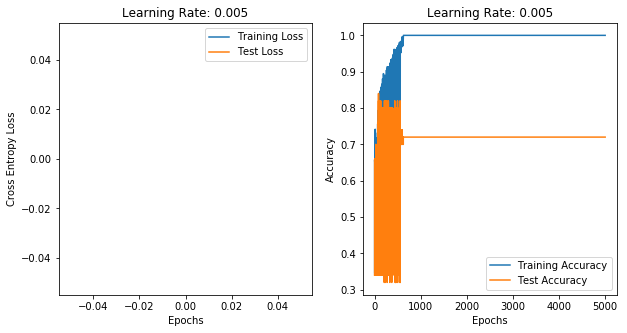

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss_train)
plt.plot(range(epoch),loss_test)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Learning Rate: 0.005')
plt.subplot(1,2,2)
plt.plot(range(epoch),acc_train)
plt.plot(range(epoch),acc_test)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rate: 0.005')

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 5000
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc1 = 0
acc2 = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)
loss_train = []
loss_test = []
acc_train = []
acc_test= []

In [ ]:
lrate = 0.0005

for i in range(epoch):
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    dz = a - y_train.reshape(-1,1)
    dw = np.matmul(x_train.T,dz).T
    db = np.sum(dz)
    w = w - lrate*dw/len(y_train)
    b = b - lrate*db/len(y_train)
    loss_epoch_train = np.sum(-np.multiply(y_train.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_train.reshape(-1,1)),(np.log(1 - a))))/len(y_train)
    loss_train.append(loss_epoch_train)

    #Find the accuracy on the training set
    z = np.matmul(x_train,w.T) + b
    a = sigmoid(z)
    pred = np.where(a > 0.5, 1, 0)
    acc1 = sum(pred == y_train.reshape(-1,1))/len(y_train)
    acc_train.append(acc1)


    #Find the accuracy on test set
    z = np.matmul(x_test,w.T) + b
    a = sigmoid(z)
    pred_test = np.where(a > 0.5, 1, 0)
    loss_epoch_test = np.sum(-np.multiply(y_test.reshape(-1,1), (np.log(a))) - np.multiply((1.0-y_test.reshape(-1,1)),(np.log(1 - a))))/len(y_test)
    loss_test.append(loss_epoch_test)
    acc2 = sum(pred_test == y_test.reshape(-1,1))/len(y_test)
    acc_test.append(acc2)

    print('Epoch:', i+1, 'CE loss:', loss_epoch_train, 'Accuracy_Train:', acc1, 'CE loss:', loss_epoch_test, 'Accuracy_Test:', acc2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


Epoch: 1 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 2 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 3 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 4 CE loss: nan Accuracy_Train: [0.6507177] CE loss: nan Accuracy_Test: [0.34]
Epoch: 5 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 6 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 7 CE loss: nan Accuracy_Train: [0.66985646] CE loss: nan Accuracy_Test: [0.34]
Epoch: 8 CE loss: nan Accuracy_Train: [0.34449761] CE loss: nan Accuracy_Test: [0.66]
Epoch: 9 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 10 CE loss: nan Accuracy_Train: [0.58373206] CE loss: nan Accuracy_Test: [0.8]
Epoch: 11 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 12 CE loss: nan Accuracy_Train: [0.70334928] CE

Epoch: 96 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 97 CE loss: nan Accuracy_Train: [0.53588517] CE loss: nan Accuracy_Test: [0.8]
Epoch: 98 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 99 CE loss: nan Accuracy_Train: [0.79425837] CE loss: nan Accuracy_Test: [0.56]
Epoch: 100 CE loss: nan Accuracy_Train: [0.50717703] CE loss: nan Accuracy_Test: [0.76]
Epoch: 101 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 102 CE loss: nan Accuracy_Train: [0.75119617] CE loss: nan Accuracy_Test: [0.54]
Epoch: 103 CE loss: nan Accuracy_Train: [0.40669856] CE loss: nan Accuracy_Test: [0.66]
Epoch: 104 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 105 CE loss: nan Accuracy_Train: [0.73205742] CE loss: nan Accuracy_Test: [0.5]
Epoch: 106 CE loss: nan Accuracy_Train: [0.3923445] CE loss: nan Accuracy_Test: [0.66]
Epoch: 107 CE loss: nan Accuracy_Train:

Epoch: 195 CE loss: nan Accuracy_Train: [0.43062201] CE loss: nan Accuracy_Test: [0.66]
Epoch: 196 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 197 CE loss: nan Accuracy_Train: [0.84688995] CE loss: nan Accuracy_Test: [0.56]
Epoch: 198 CE loss: nan Accuracy_Train: [0.59808612] CE loss: nan Accuracy_Test: [0.8]
Epoch: 199 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 200 CE loss: nan Accuracy_Train: [0.85167464] CE loss: nan Accuracy_Test: [0.76]
Epoch: 201 CE loss: nan Accuracy_Train: [0.76555024] CE loss: nan Accuracy_Test: [0.5]
Epoch: 202 CE loss: nan Accuracy_Train: [0.44497608] CE loss: nan Accuracy_Test: [0.7]
Epoch: 203 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 204 CE loss: nan Accuracy_Train: [0.86124402] CE loss: nan Accuracy_Test: [0.56]
Epoch: 205 CE loss: nan Accuracy_Train: [0.6507177] CE loss: nan Accuracy_Test: [0.8]
Epoch: 206 CE loss: nan Accuracy_Trai

Epoch: 289 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 290 CE loss: nan Accuracy_Train: [0.89952153] CE loss: nan Accuracy_Test: [0.72]
Epoch: 291 CE loss: nan Accuracy_Train: [0.86602871] CE loss: nan Accuracy_Test: [0.82]
Epoch: 292 CE loss: nan Accuracy_Train: [0.77990431] CE loss: nan Accuracy_Test: [0.46]
Epoch: 293 CE loss: nan Accuracy_Train: [0.50239234] CE loss: nan Accuracy_Test: [0.8]
Epoch: 294 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.34]
Epoch: 295 CE loss: nan Accuracy_Train: [0.89952153] CE loss: nan Accuracy_Test: [0.76]
Epoch: 296 CE loss: nan Accuracy_Train: [0.91866029] CE loss: nan Accuracy_Test: [0.74]
Epoch: 297 CE loss: nan Accuracy_Train: [0.9138756] CE loss: nan Accuracy_Test: [0.72]
Epoch: 298 CE loss: nan Accuracy_Train: [0.88995215] CE loss: nan Accuracy_Test: [0.78]
Epoch: 299 CE loss: nan Accuracy_Train: [0.85645933] CE loss: nan Accuracy_Test: [0.52]
Epoch: 300 CE loss: nan Accuracy_T

Epoch: 389 CE loss: nan Accuracy_Train: [0.92822967] CE loss: nan Accuracy_Test: [0.74]
Epoch: 390 CE loss: nan Accuracy_Train: [0.92822967] CE loss: nan Accuracy_Test: [0.74]
Epoch: 391 CE loss: nan Accuracy_Train: [0.92822967] CE loss: nan Accuracy_Test: [0.76]
Epoch: 392 CE loss: nan Accuracy_Train: [0.93779904] CE loss: nan Accuracy_Test: [0.72]
Epoch: 393 CE loss: nan Accuracy_Train: [0.93779904] CE loss: nan Accuracy_Test: [0.76]
Epoch: 394 CE loss: nan Accuracy_Train: [0.92344498] CE loss: nan Accuracy_Test: [0.74]
Epoch: 395 CE loss: nan Accuracy_Train: [0.90909091] CE loss: nan Accuracy_Test: [0.78]
Epoch: 396 CE loss: nan Accuracy_Train: [0.89473684] CE loss: nan Accuracy_Test: [0.56]
Epoch: 397 CE loss: nan Accuracy_Train: [0.79904306] CE loss: nan Accuracy_Test: [0.82]
Epoch: 398 CE loss: nan Accuracy_Train: [0.71291866] CE loss: nan Accuracy_Test: [0.34]
Epoch: 399 CE loss: nan Accuracy_Train: [0.48803828] CE loss: nan Accuracy_Test: [0.76]
Epoch: 400 CE loss: nan Accuracy

Epoch: 484 CE loss: nan Accuracy_Train: [0.90909091] CE loss: nan Accuracy_Test: [0.8]
Epoch: 485 CE loss: nan Accuracy_Train: [0.84688995] CE loss: nan Accuracy_Test: [0.48]
Epoch: 486 CE loss: nan Accuracy_Train: [0.70334928] CE loss: nan Accuracy_Test: [0.78]
Epoch: 487 CE loss: nan Accuracy_Train: [0.66985646] CE loss: nan Accuracy_Test: [0.32]
Epoch: 488 CE loss: nan Accuracy_Train: [0.64593301] CE loss: nan Accuracy_Test: [0.78]
Epoch: 489 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.32]
Epoch: 490 CE loss: nan Accuracy_Train: [0.784689] CE loss: nan Accuracy_Test: [0.78]
Epoch: 491 CE loss: nan Accuracy_Train: [0.69856459] CE loss: nan Accuracy_Test: [0.32]
Epoch: 492 CE loss: nan Accuracy_Train: [0.49282297] CE loss: nan Accuracy_Test: [0.76]
Epoch: 493 CE loss: nan Accuracy_Train: [0.65550239] CE loss: nan Accuracy_Test: [0.32]
Epoch: 494 CE loss: nan Accuracy_Train: [0.96172249] CE loss: nan Accuracy_Test: [0.74]
Epoch: 495 CE loss: nan Accuracy_Tr

Epoch: 579 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.72]
Epoch: 580 CE loss: nan Accuracy_Train: [0.96172249] CE loss: nan Accuracy_Test: [0.68]
Epoch: 581 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.72]
Epoch: 582 CE loss: nan Accuracy_Train: [0.96172249] CE loss: nan Accuracy_Test: [0.68]
Epoch: 583 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.72]
Epoch: 584 CE loss: nan Accuracy_Train: [0.96650718] CE loss: nan Accuracy_Test: [0.68]
Epoch: 585 CE loss: nan Accuracy_Train: [0.98086124] CE loss: nan Accuracy_Test: [0.7]
Epoch: 586 CE loss: nan Accuracy_Train: [0.97607656] CE loss: nan Accuracy_Test: [0.72]
Epoch: 587 CE loss: nan Accuracy_Train: [0.98086124] CE loss: nan Accuracy_Test: [0.7]
Epoch: 588 CE loss: nan Accuracy_Train: [0.98564593] CE loss: nan Accuracy_Test: [0.72]
Epoch: 589 CE loss: nan Accuracy_Train: [0.98564593] CE loss: nan Accuracy_Test: [0.74]
Epoch: 590 CE loss: nan Accuracy_T

Epoch: 676 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 677 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 678 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 679 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 680 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 681 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 682 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 683 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 684 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 685 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 686 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 687 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 688 CE loss: nan Accuracy_Train: [1.] CE loss

Epoch: 780 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 781 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 782 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 783 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 784 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 785 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 786 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 787 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 788 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 789 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 790 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 791 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 792 CE loss: nan Accuracy_Train: [1.] CE loss

Epoch: 891 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 892 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 893 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 894 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 895 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 896 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 897 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 898 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 899 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 900 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 901 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 902 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 903 CE loss: nan Accuracy_Train: [1.] CE loss

Epoch: 1000 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1001 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1002 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1003 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1004 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1005 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1006 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1007 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1008 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1009 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1010 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1011 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1012 CE loss: nan Accuracy_Train:

Epoch: 1109 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1110 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1111 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1112 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1113 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1114 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1115 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1116 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1117 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1118 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1119 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1120 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1121 CE loss: nan Accuracy_Train:

Epoch: 1217 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1218 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1219 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1220 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1221 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1222 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1223 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1224 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1225 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1226 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1227 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1228 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1229 CE loss: nan Accuracy_Train:

Epoch: 1322 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1323 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1324 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1325 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1326 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1327 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1328 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1329 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1330 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1331 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1332 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1333 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1334 CE loss: nan Accuracy_Train:

Epoch: 1429 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1430 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1431 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1432 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1433 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1434 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1435 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1436 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1437 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1438 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1439 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1440 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1441 CE loss: nan Accuracy_Train:

Epoch: 1532 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1533 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1534 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1535 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1536 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1537 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1538 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1539 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1540 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1541 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1542 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1543 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1544 CE loss: nan Accuracy_Train:

Epoch: 1640 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1641 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1642 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1643 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1644 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1645 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1646 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1647 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1648 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1649 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1650 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1651 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1652 CE loss: nan Accuracy_Train:

Epoch: 1747 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1748 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1749 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1750 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1751 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1752 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1753 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1754 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1755 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1756 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1757 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1758 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1759 CE loss: nan Accuracy_Train:

Epoch: 1850 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1851 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1852 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1853 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1854 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1855 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1856 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1857 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1858 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1859 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1860 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1861 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1862 CE loss: nan Accuracy_Train:

Epoch: 1953 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1954 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1955 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1956 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1957 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1958 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1959 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1960 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1961 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1962 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1963 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1964 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 1965 CE loss: nan Accuracy_Train:

Epoch: 2058 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2059 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2060 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2061 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2062 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2063 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2064 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2065 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2066 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2067 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2068 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2069 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2070 CE loss: nan Accuracy_Train:

Epoch: 2163 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2164 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2165 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2166 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2167 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2168 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2169 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2170 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2171 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2172 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2173 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2174 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2175 CE loss: nan Accuracy_Train:

Epoch: 2273 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2274 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2275 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2276 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2277 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2278 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2279 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2280 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2281 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2282 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2283 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2284 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2285 CE loss: nan Accuracy_Train:

Epoch: 2379 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2380 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2381 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2382 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2383 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2384 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2385 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2386 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2387 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2388 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2389 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2390 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2391 CE loss: nan Accuracy_Train:

Epoch: 2482 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2483 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2484 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2485 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2486 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2487 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2488 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2489 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2490 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2491 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2492 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2493 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2494 CE loss: nan Accuracy_Train:

Epoch: 2589 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2590 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2591 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2592 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2593 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2594 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2595 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2596 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2597 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2598 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2599 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2600 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2601 CE loss: nan Accuracy_Train:

Epoch: 2695 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2696 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2697 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2698 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2699 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2700 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2701 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2702 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2703 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2704 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2705 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2706 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2707 CE loss: nan Accuracy_Train:

Epoch: 2803 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2804 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2805 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2806 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2807 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2808 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2809 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2810 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2811 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2812 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2813 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2814 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2815 CE loss: nan Accuracy_Train:

Epoch: 2909 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2910 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2911 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2912 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2913 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2914 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2915 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2916 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2917 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2918 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2919 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2920 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 2921 CE loss: nan Accuracy_Train:

Epoch: 3018 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3019 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3020 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3021 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3022 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3023 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3024 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3025 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3026 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3027 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3028 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3029 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3030 CE loss: nan Accuracy_Train:

Epoch: 3123 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3124 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3125 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3126 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3127 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3128 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3129 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3130 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3131 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3132 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3133 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3134 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3135 CE loss: nan Accuracy_Train:

Epoch: 3227 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3228 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3229 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3230 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3231 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3232 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3233 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3234 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3235 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3236 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3237 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3238 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3239 CE loss: nan Accuracy_Train:

Epoch: 3334 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3335 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3336 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3337 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3338 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3339 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3340 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3341 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3342 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3343 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3344 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3345 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3346 CE loss: nan Accuracy_Train:

Epoch: 3437 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3438 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3439 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3440 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3441 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3442 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3443 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3444 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3445 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3446 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3447 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3448 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3449 CE loss: nan Accuracy_Train:

Epoch: 3546 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3547 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3548 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3549 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3550 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3551 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3552 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3553 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3554 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3555 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3556 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3557 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3558 CE loss: nan Accuracy_Train:

Epoch: 3653 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3654 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3655 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3656 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3657 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3658 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3659 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3660 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3661 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3662 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3663 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3664 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3665 CE loss: nan Accuracy_Train:

Epoch: 3757 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3758 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3759 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3760 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3761 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3762 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3763 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3764 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3765 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3766 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3767 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3768 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3769 CE loss: nan Accuracy_Train:

Epoch: 3862 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3863 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3864 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3865 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3866 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3867 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3868 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3869 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3870 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3871 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3872 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3873 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3874 CE loss: nan Accuracy_Train:

Epoch: 3965 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3966 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3967 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3968 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3969 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3970 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3971 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3972 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3973 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3974 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3975 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3976 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 3977 CE loss: nan Accuracy_Train:

Epoch: 4073 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4074 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4075 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4076 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4077 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4078 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4079 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4080 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4081 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4082 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4083 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4084 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4085 CE loss: nan Accuracy_Train:

Epoch: 4176 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4177 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4178 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4179 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4180 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4181 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4182 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4183 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4184 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4185 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4186 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4187 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4188 CE loss: nan Accuracy_Train:

Epoch: 4279 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4280 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4281 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4282 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4283 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4284 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4285 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4286 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4287 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4288 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4289 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4290 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4291 CE loss: nan Accuracy_Train:

Epoch: 4387 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4388 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4389 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4390 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4391 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4392 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4393 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4394 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4395 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4396 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4397 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4398 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4399 CE loss: nan Accuracy_Train:

Epoch: 4492 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4493 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4494 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4495 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4496 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4497 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4498 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4499 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4500 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4501 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4502 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4503 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4504 CE loss: nan Accuracy_Train:

Epoch: 4595 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4596 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4597 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4598 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4599 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4600 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4601 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4602 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4603 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4604 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4605 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4606 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4607 CE loss: nan Accuracy_Train:

Epoch: 4700 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4701 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4702 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4703 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4704 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4705 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4706 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4707 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4708 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4709 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4710 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4711 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4712 CE loss: nan Accuracy_Train:

Epoch: 4805 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4806 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4807 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4808 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4809 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4810 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4811 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4812 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4813 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4814 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4815 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4816 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4817 CE loss: nan Accuracy_Train:

Epoch: 4912 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4913 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4914 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4915 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4916 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4917 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4918 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4919 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4920 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4921 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4922 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4923 CE loss: nan Accuracy_Train: [1.] CE loss: nan Accuracy_Test: [0.7]
Epoch: 4924 CE loss: nan Accuracy_Train:

Text(0.5, 1.0, 'Learning Rate: 0.0005')

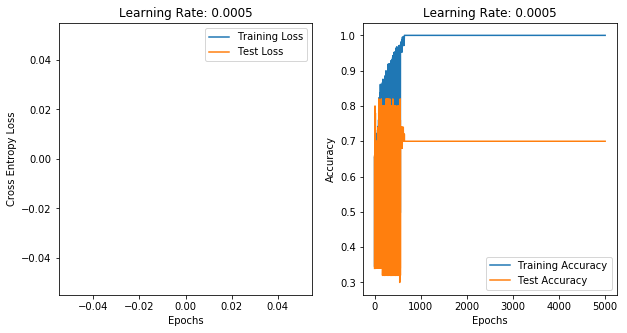

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss_train)
plt.plot(range(epoch),loss_test)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Learning Rate: 0.0005')
plt.subplot(1,2,2)
plt.plot(range(epoch),acc_train)
plt.plot(range(epoch),acc_test)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rate: 0.0005')

In [ ]:
w = np.random.randn(1,12288)*np.sqrt(0.01)
b = np.random.randn()*np.sqrt(0.1)
dw = np.zeros(w.shape)
db = 0
epoch = 1000
loss = 0
loss_epoch_train = 0
loss_epoch_test = 0
acc1 = 0
acc2 = 0
pred = np.zeros(y_train.shape)
pred_test = np.zeros(y_test.shape)
loss_train = []
loss_test = []
acc_train = []
acc_test= []

In [ ]:
lrate = 0.9

for i in range(epoch):
    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)

        if y_train[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)

        dz = a - y_train[j]
        dw += x_train[j]*dz
        db += dz

    w = w - (lrate*dw/len(y_train))
    b = b - (lrate*db/len(y_train))
    loss_epoch_train = loss/len(y_train)
    loss_train.append(loss_epoch_train)

    for j in range(len(y_train)):
        z = np.dot(w,x_train[j]) + b
        a = sigmoid(z)
        pred[j] = np.round(a)
    acc1 = sum(pred == y_train)/len(y_train)
    acc_train.append(acc1)

    loss = 0
    for j in range(len(y_test)):
        z = np.dot(w,x_test[j]) + b
        a = sigmoid(z)
        pred_test[j] = np.round(a)
        if y_test[j] == 1:
            CE = -np.log(a)
        else:
            CE = -np.log(1-a)
        if CE == float('+inf'):
            CE = 0
        loss += np.nan_to_num(CE)
    loss_epoch_test = loss/len(y_test)
    loss_test.append(loss_epoch_test)
    acc2 = sum(pred_test == y_test)/len(y_test)
    acc_test.append(acc2)
    print('Epoch:', i+1, 'CE loss(Train):', loss_epoch_train, 'Accuracy_Train:', acc1, 'CE loss(Test):', loss_epoch_test, 'Accuracy_Test:', acc2)
    dw = np.zeros(w.shape)
    db = 0
    loss = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log


Epoch: 1 CE loss(Train): [12.44976425] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 2 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 3 CE loss(Train): [0.] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 4 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 5 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 6 CE loss(Train): [0.] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 7 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 8 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 9 CE loss(Train): [0.] Accuracy_Train: 0.3444976076555024 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 10 CE loss(Train): [0.] Accuracy_Train:

Epoch: 81 CE loss(Train): [0.] Accuracy_Train: 0.722488038277512 CE loss(Test): [0.] Accuracy_Test: 0.46
Epoch: 82 CE loss(Train): [0.] Accuracy_Train: 0.3827751196172249 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 83 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 84 CE loss(Train): [0.] Accuracy_Train: 0.722488038277512 CE loss(Test): [0.] Accuracy_Test: 0.54
Epoch: 85 CE loss(Train): [0.] Accuracy_Train: 0.3923444976076555 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 86 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 87 CE loss(Train): [0.] Accuracy_Train: 0.7368421052631579 CE loss(Test): [0.] Accuracy_Test: 0.54
Epoch: 88 CE loss(Train): [0.] Accuracy_Train: 0.42105263157894735 CE loss(Test): [0.] Accuracy_Test: 0.68
Epoch: 89 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 90 CE loss(Train): [0.] Accuracy_Train: 

Epoch: 158 CE loss(Train): [0.] Accuracy_Train: 0.7320574162679426 CE loss(Test): [0.] Accuracy_Test: 0.44
Epoch: 159 CE loss(Train): [0.] Accuracy_Train: 0.40669856459330145 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 160 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 161 CE loss(Train): [0.] Accuracy_Train: 0.8325358851674641 CE loss(Test): [0.] Accuracy_Test: 0.6
Epoch: 162 CE loss(Train): [0.] Accuracy_Train: 0.5598086124401914 CE loss(Test): [0.] Accuracy_Test: 0.8
Epoch: 163 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 164 CE loss(Train): [0.] Accuracy_Train: 0.8421052631578947 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 165 CE loss(Train): [0.] Accuracy_Train: 0.7894736842105263 CE loss(Test): [0.] Accuracy_Test: 0.56
Epoch: 166 CE loss(Train): [0.] Accuracy_Train: 0.4449760765550239 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 167 CE loss(Train): [0.] Accura

Epoch: 235 CE loss(Train): [0.] Accuracy_Train: 0.46411483253588515 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 236 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 237 CE loss(Train): [0.] Accuracy_Train: 0.8851674641148325 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 238 CE loss(Train): [0.] Accuracy_Train: 0.861244019138756 CE loss(Test): [0.] Accuracy_Test: 0.78
Epoch: 239 CE loss(Train): [0.] Accuracy_Train: 0.8277511961722488 CE loss(Test): [0.] Accuracy_Test: 0.54
Epoch: 240 CE loss(Train): [0.] Accuracy_Train: 0.569377990430622 CE loss(Test): [0.] Accuracy_Test: 0.78
Epoch: 241 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 242 CE loss(Train): [0.] Accuracy_Train: 0.8755980861244019 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 243 CE loss(Train): [0.] Accuracy_Train: 0.861244019138756 CE loss(Test): [0.] Accuracy_Test: 0.58
Epoch: 244 CE loss(Train): [0.] Accuracy

Epoch: 313 CE loss(Train): [0.] Accuracy_Train: 0.507177033492823 CE loss(Test): [0.] Accuracy_Test: 0.8
Epoch: 314 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 315 CE loss(Train): [0.] Accuracy_Train: 0.9090909090909091 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 316 CE loss(Train): [0.] Accuracy_Train: 0.9138755980861244 CE loss(Test): [0.] Accuracy_Test: 0.76
Epoch: 317 CE loss(Train): [0.] Accuracy_Train: 0.9186602870813397 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 318 CE loss(Train): [0.] Accuracy_Train: 0.9090909090909091 CE loss(Test): [0.] Accuracy_Test: 0.76
Epoch: 319 CE loss(Train): [0.] Accuracy_Train: 0.9090909090909091 CE loss(Test): [0.] Accuracy_Test: 0.66
Epoch: 320 CE loss(Train): [0.] Accuracy_Train: 0.8277511961722488 CE loss(Test): [0.] Accuracy_Test: 0.8
Epoch: 321 CE loss(Train): [0.] Accuracy_Train: 0.7368421052631579 CE loss(Test): [0.] Accuracy_Test: 0.4
Epoch: 322 CE loss(Train): [0.] Accuracy_

Epoch: 391 CE loss(Train): [0.] Accuracy_Train: 0.49282296650717705 CE loss(Test): [0.] Accuracy_Test: 0.78
Epoch: 392 CE loss(Train): [0.] Accuracy_Train: 0.6555023923444976 CE loss(Test): [0.] Accuracy_Test: 0.34
Epoch: 393 CE loss(Train): [0.] Accuracy_Train: 0.9330143540669856 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 394 CE loss(Train): [0.] Accuracy_Train: 0.9425837320574163 CE loss(Test): [0.] Accuracy_Test: 0.76
Epoch: 395 CE loss(Train): [0.] Accuracy_Train: 0.9330143540669856 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 396 CE loss(Train): [0.] Accuracy_Train: 0.937799043062201 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 397 CE loss(Train): [0.] Accuracy_Train: 0.9425837320574163 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 398 CE loss(Train): [0.] Accuracy_Train: 0.9473684210526315 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 399 CE loss(Train): [0.] Accuracy_Train: 0.9473684210526315 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 400 CE loss(Train): [0.] Accur

Epoch: 468 CE loss(Train): [0.] Accuracy_Train: 0.9473684210526315 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 469 CE loss(Train): [0.] Accuracy_Train: 0.9425837320574163 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 470 CE loss(Train): [0.] Accuracy_Train: 0.9521531100478469 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 471 CE loss(Train): [0.] Accuracy_Train: 0.9521531100478469 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 472 CE loss(Train): [0.] Accuracy_Train: 0.9569377990430622 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 473 CE loss(Train): [0.] Accuracy_Train: 0.9521531100478469 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 474 CE loss(Train): [0.] Accuracy_Train: 0.9569377990430622 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 475 CE loss(Train): [0.] Accuracy_Train: 0.9521531100478469 CE loss(Test): [0.] Accuracy_Test: 0.76
Epoch: 476 CE loss(Train): [0.] Accuracy_Train: 0.9473684210526315 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 477 CE loss(Train): [0.] Accura

Epoch: 545 CE loss(Train): [0.] Accuracy_Train: 0.9712918660287081 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 546 CE loss(Train): [0.] Accuracy_Train: 0.9712918660287081 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 547 CE loss(Train): [0.] Accuracy_Train: 0.9665071770334929 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 548 CE loss(Train): [0.] Accuracy_Train: 0.9760765550239234 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 549 CE loss(Train): [0.] Accuracy_Train: 0.9665071770334929 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 550 CE loss(Train): [0.] Accuracy_Train: 0.9665071770334929 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 551 CE loss(Train): [0.] Accuracy_Train: 0.9425837320574163 CE loss(Test): [0.] Accuracy_Test: 0.68
Epoch: 552 CE loss(Train): [0.] Accuracy_Train: 0.9186602870813397 CE loss(Test): [0.] Accuracy_Test: 0.74
Epoch: 553 CE loss(Train): [0.] Accuracy_Train: 0.8516746411483254 CE loss(Test): [0.] Accuracy_Test: 0.48
Epoch: 554 CE loss(Train): [0.] Accuracy_

Epoch: 623 CE loss(Train): [0.] Accuracy_Train: 0.9760765550239234 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 624 CE loss(Train): [0.] Accuracy_Train: 0.9856459330143541 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 625 CE loss(Train): [0.] Accuracy_Train: 0.9808612440191388 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 626 CE loss(Train): [0.] Accuracy_Train: 0.9808612440191388 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 627 CE loss(Train): [0.] Accuracy_Train: 0.9760765550239234 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 628 CE loss(Train): [0.] Accuracy_Train: 0.9808612440191388 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 629 CE loss(Train): [0.] Accuracy_Train: 0.9856459330143541 CE loss(Test): [0.] Accuracy_Test: 0.7
Epoch: 630 CE loss(Train): [0.] Accuracy_Train: 0.9952153110047847 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 631 CE loss(Train): [0.] Accuracy_Train: 0.9856459330143541 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 632 CE loss(Train): [0.] Accuracy_Tra

Epoch: 708 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 709 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 710 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 711 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 712 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 713 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 714 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 715 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 716 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 717 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 718 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy

Epoch: 798 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 799 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 800 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 801 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 802 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 803 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 804 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 805 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 806 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 807 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 808 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy

Epoch: 887 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 888 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 889 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 890 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 891 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 892 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 893 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 894 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 895 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 896 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 897 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy

Epoch: 978 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 979 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 980 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 981 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 982 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 983 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 984 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 985 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 986 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 987 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy_Test: 0.72
Epoch: 988 CE loss(Train): [0.] Accuracy_Train: 1.0 CE loss(Test): [0.] Accuracy

Text(0.5, 1.0, 'Learning Rate: 0.9')

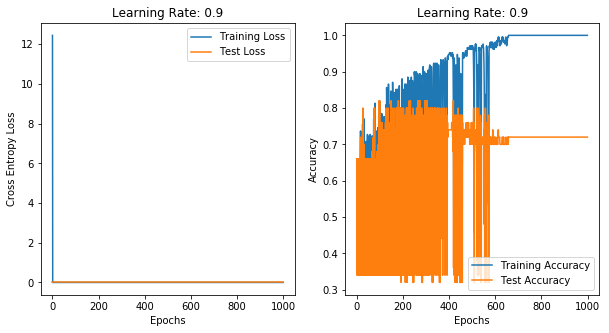

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(epoch),loss_train)
plt.plot(range(epoch),loss_test)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.title('Learning Rate: 0.9')
plt.subplot(1,2,2)
plt.plot(range(epoch),acc_train)
plt.plot(range(epoch),acc_test)
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rate: 0.9')

Include your comments and discussions here (in this text box) for 2.1 (Part1). **To edit, double click on this text.**

In this part of the assignment, a binary classifier was implemented using logistic regression to classify cats vs non-cat images. The network weights were initialized using a Gaussian distribution with mean 0 and variance of 0.01 while the bias term was initialized with a variance of 0.1. The input images were normalized by dividing each pixel value by 255. Both the implementations - matrix version that trains on all images in one go (faster) and iterative version where we loop over each image (slower) were implemented. The following results were obtained using both approaches when the network was trained for 50 epochs using gradient descent using a learning rate of 0.0001.

Training Set--> Matrix:58.8% Iterative:61.7%
Test Set--> Matrix:34% Iterative:36%

Note that the accuracy of both train and test changes when the code is re-run. The reason for these fluctuations is the initialization of the weights is random. Sometimes when the initialization is good, the results turn out better while if the initialization is bad, the results are a little worse. In the next part, an optimal learning rate was found 0.0005 and the network was trained for 50 epochs. The following results were found:

Training Set--> Matrix:62.8% Iterative:65.7%
Test Set--> Matrix:54% Iterative:56%

Both implementations do not give the exact same results because of the random initialization of the weights before training the network. If the same initial weights were used for both the approaches, the results would be the same. However, in the implementation, I just used different weights. For a neural network, the weight initialization is very important. There are better more advanced approaches to initialize the weights like Xaviers initialization which could have given better results. The better the initialization, the faster the network would converge and the better the results would be.

In this assignment, I train the logistic regression to find the optimal parameters such that the classification accuracy is the highest. The weights were initialized using a Gaussian distribution with zero mean and variance of 0.01 while the bias term was initialized using a Gaussian with zero mean and 0.1 variance.

the loss decreases gradually when the learning rates chosen are low and optimal. However, when the learning rate chosen is high, the loss oscillates a lot while also being really high. Although the high learning rate reaches the optimal accuracy, the loss is very high. When the learning rate is set small, it takes much longer for the network to converge. The loss is still gradually decreasing while the accuracy is increasing but the network hasn’t converged yet.

we can see that the loss function first decreases upto a certain value and then starts increasing while the accuracy also increases but converges after a certain point (around 2500 epoch number). After that the network just overfits on the data as the training classification error is almost zero while no improvement on the test set.


Hyper-parameters of the optimal result:
Epochs - 2238
Learning Rate - 0.0005
Training Accuracy - 98%
Testing Accuracy - 74%
Total Number of parameters trained - 12288 (weights) + 1 bias parameter = 12299
The size of the weights is 12288 because our images have a shape of 64*64*3 which means 12288 pixels.

## 2.2 (Part 2)


In this part, you will use the functions that you implemented in the previous step. This time, you will use those functions to tune some hyper-parameters: the  epoch number to stop training, a good value of learning rate to obtain the highest accuracy.

In this part, you are NOT allowed to use KERAS or Tensorflow or PyTorch (you should use NumPy).

In this part, you will need to generate a plot that shows how the loss changes as the epoch increases. See Figure 2 below.

##### **Figure 2:** A Sample plot that shows how the training and the test loss (cost) values change at each epoch.


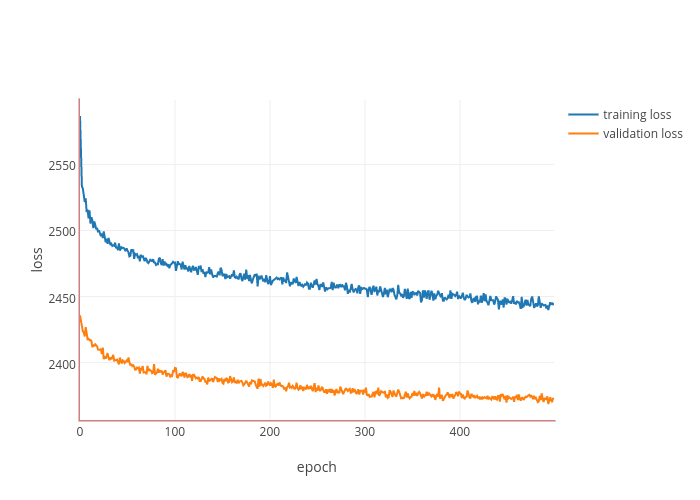

In [ ]:
# Note if you run this code without entering the correct image path according to your own Google Drive, you will not see the image below.
# You do NOT need to run the code in this cell. The image is already shown below.
from IPython.display import Image
Image('images/image2.png')

First: You need to plot "Cost vs. epoch" for both training and test data sets for each learning rate value that you use (show the plots for at least 3 different learning rate values). See Figure 2 for an example. Use a separate plot for each learning rate value.

Remember that in the literature, the terms: loss and cost are being used interchangeably while they both referring to the meaning of cost function. (Note: However, as we studied in the class, both terms: loss and cost also have different meanings in general. In this assignment, we will assume that they both refer to cost value). To do that, during the training, compute the cost at each epoch, and generate epoch vs. loss (cost) plot at the end of the training. Epoch vs. loss plot should display how the value of your cost function changes at every epoch. (See example plot in Figure 2). Note that you should record loss for both, training and test sets, however, only the training data should be used during the training process.

At the end of training:

* you are required to report a set of hyper-parameters yielding the best weights and the bias term on the training data that achieves best classification results in terms of accuracy in the given text box (in a separate cell). Those hyper-parameters that you should study and report are: the total number of epochs, the learning rate and total number of parameters that you trained. Please also explain why you decided to use those particular hyper-parameter values (for example, report at least 5 different learning rate values and and their correspnding accuracy values after a certain number of epochs). Also state how you initialized your weights.

In [ ]:
# Complete training process with different learning rate, compare them with single plot
# for example, lr=0.5, lr=1e-2, lr=1e-4, you should find best learning rate
# You can use train_sgd function inside a loop
# Show validation and training loss plots with different learning rate over epochs
# In this cell, you must use your own functions that you implemented before

Include your comments and discussions here (in this text box) for 2.2 (Part2). **To edit, double click on this text.**

***Both of part 1 and part 2 are done in part 1.***

## 2.3 (Part 3)

In this part, you are allowed to (and you will need to) use KERAS. For computation, you might want to use Google Colab as Colab supports Keras. To get familiarize yourself with Keras, see the below example first.


In [ ]:
#  https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



*   First, we downloaded a Keras example from the given link below:

https://github.com/keras-team/keras-io/blob/master/examples/vision/mnist_convnet.py and showed it above. You should run that code in the previous cell and analyze its structure to get an idea about how to load data, construct a model, how to train and test it.

That particular model in the above example Keras file, uses a simple ConvNet model (let’s call this model as: the Basic ConvNet Model) and trains it on the MNIST dataset for classification. You will use this file  (mainly the model from the file) as your starting template in this assignment. However, you will need to change the data part in that template to use our cat identification dataset.

*    Your first task: edit that template code to train it on our cat vs. noncat dataset and simply show the accuracy value you obtained on the test data after 12 epochs. You  need to make the minimal change in the code for this task. Report your changes in the below text box and the accuracy result that  you obtain from the code.

*    Your next task is understanding the used network model in the given code. Write down the network model (the architecture) from the code in the text box below. Remember the architectures that we studied in the class such as: VGG-16, LeNet,  AlexNet and how each of those architectures were summarized in the slides. You can use one of those formats to model the network used in the code. (You can use text-based modelling as well but describe each details of each layer).

Here is an example for describing a simple model in the text form: Conv ===> Pooling ===> FC ===> softmax. Make sure you also list the number of filters, filter dims, number of units and activation functions for each layer (where applicable). As an alternative, you can draw a figure illustrating the network architecture as well (preferred). You do not need to submit a code for this task.

*     Now, let’s have a look at how changing epoch value affects the network’s performance. Change the epoch (iteration) value to 30 in the code and plot both training and test accuracy vs. epoch. There are many ways to plot that in python. You will use Tensorboard in this part to plot that (hint: check keras.callbacks.TensorBoard() ). Tensorboard can plot your loss function automatically. Your code must generate your plot. In your plot, show both training \& test (validation) losses vs. epoch over 30 epochs.


*      The original code template that you downloaded from GitHub uses Adam as the default optimization algorithm. Let’s see how using another optimization algorithm: Stochastic Gradient Descent (SGD) would perform in this model instead of Adam. Change the optimizer to stochastic gradient descent (SGD) by using the code snippet below in your current network implementation. Plot the accuracy vs. epoch over 30 epochs for both training and testing data for SGD. Also plot the loss (cost) vs. epoch over 30 epochs (use Tensorboard for that). You can use the code snippet given below for setting the optimizer to SGD. (Optional: You are welcome to use additional parameters for SGD, if you prefer).



```

sgd = keras.optimizers.SGD(lr=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

```





*   We know that learning rate is also an important hyper-parameter. Let’s study its effect here with Keras. Use 5 random (but meaningful) learning rates for SGD and train your network at each of those 5 random learning rates separately on our cat dataset. Plot your accuracy vs. epoch results over 30 epochs for each of those learning rate values in a for-loop (over the 5 different learning rates). Which learning rate value yields the best result? (You can show each of those results by either using subplots or by using separate figures. Either approach will be accepted).

*   By looking at all your results that you obtained in this assignment, comment on which optimization algorithm (Adam or SGD) worked better in your case. What did you observe by changing the learning rate to any of those 5 values in the previous step:
were all of those 5 learning rates useful, is using a smaller or a higher value better for the learning rate in SGD? Did you notice any trade-off between the learning rate and convergence? If so, please describe it briefly in the below text box.


*  Note: In some plots, you should see that if you included more iterations/epochs, you would get even better accuracy while in others you may notice that you have already reached to a saturated point where including more iterations does not help.


Include your comments and discussions here (in this text box) for 2.3 (Part3). **To edit, double click on this text.**

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pdb

# from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pdb

# from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

test = h5py.File("test.h5", 'r')
#Convert 3-d images into 1-d by vectorizing the matrix
x_test = np.array(test['test_set_x'])
y_test = np.array(test['test_set_y'])
train = h5py.File('train.h5', 'r')
x_train = np.array(train['train_set_x'])
y_train = np.array(train['train_set_y'])

In [ ]:
#Make batch size smaller
batch_size = 32
epochs = 12

# input image dimensions
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (209, 64, 64, 3)
209 train samples
50 test samples


Test loss: 0.8374084997177124
Test accuracy: 0.3400000035762787


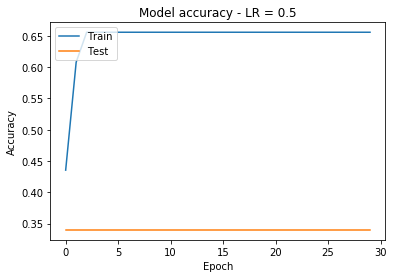

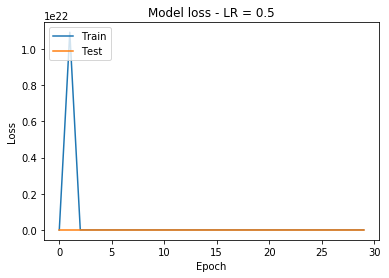

Test loss: 0.7107566046714783
Test accuracy: 0.3199999928474426


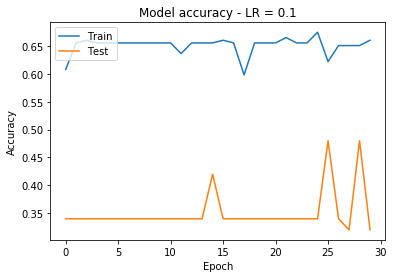

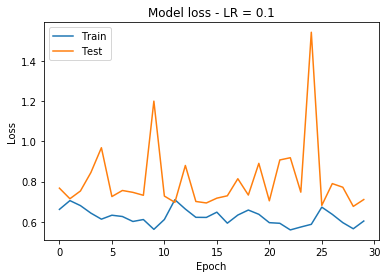

Test loss: 0.6826943755149841
Test accuracy: 0.5799999833106995


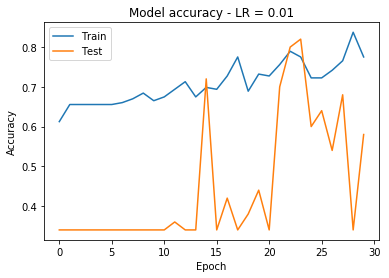

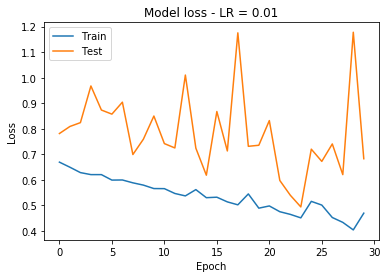

Test loss: 0.8298858046531677
Test accuracy: 0.3400000035762787


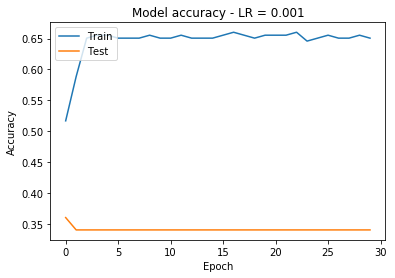

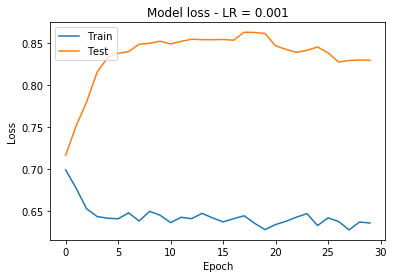

Test loss: 0.7629988551139831
Test accuracy: 0.3400000035762787


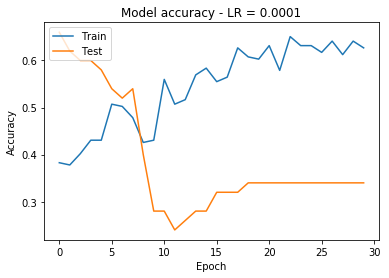

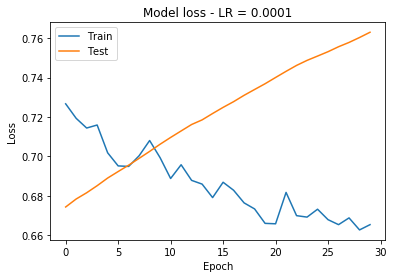

In [ ]:
lr_arr = [0.5, 0.1, 0.01, 0.001, 0.0001]

for lr in lr_arr:
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=lr),
              metrics=['accuracy'])
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy - LR = ' + str(lr))
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss - LR = ' + str(lr))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Test loss: 0.8469175958633423
Test accuracy: 0.3400000035762787


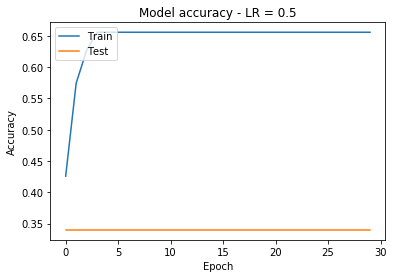

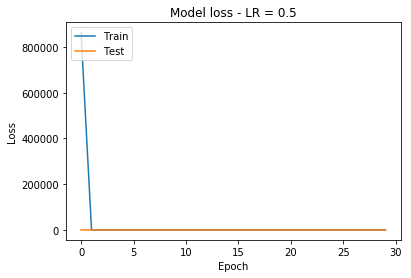

Test loss: 0.8622687983512879
Test accuracy: 0.3400000035762787


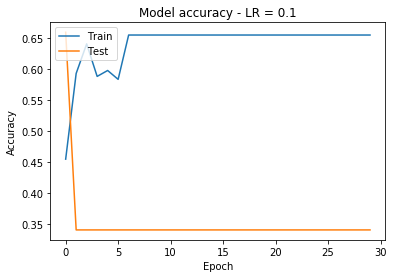

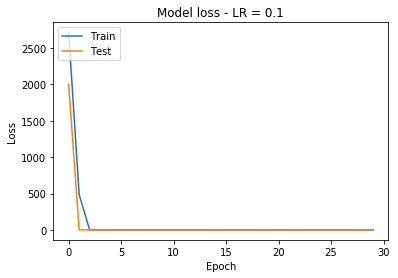

Test loss: 0.7427727198600769
Test accuracy: 0.3400000035762787


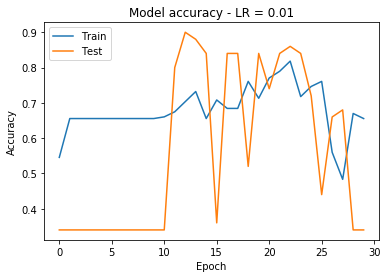

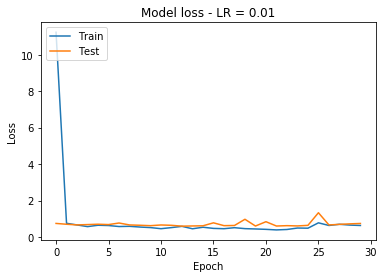

Test loss: 0.968524603843689
Test accuracy: 0.7400000095367432


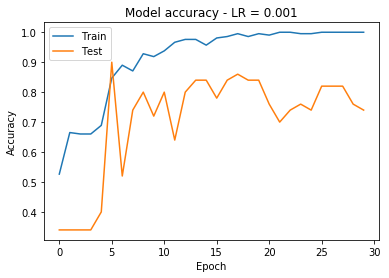

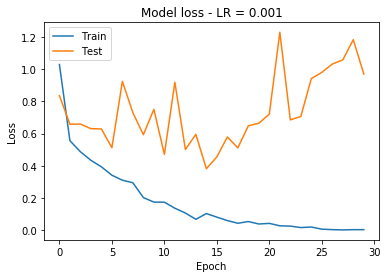

Test loss: 0.4182341694831848
Test accuracy: 0.8600000143051147


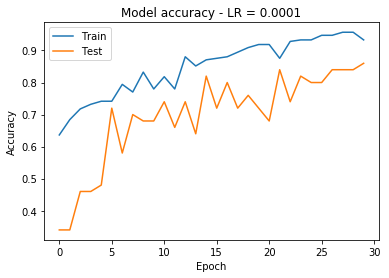

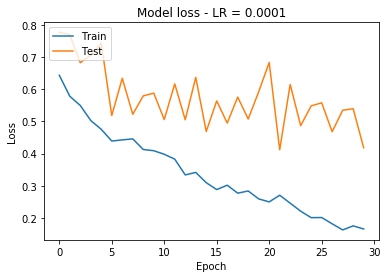

In [ ]:
lr_arr = [0.5, 0.1, 0.01, 0.001, 0.0001]

for lr in lr_arr:
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  # Plot training & validation accuracy values
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy - LR = ' + str(lr))
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss - LR = ' + str(lr))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

To see the effect of Epochs, we set the epoch number to 30. Although in the assignment, we were asked to plot the accuracy and loss function using tensorboard, I just used the history of the model.fit() method to plot those curves since I was not able to make the tensorboard work on google colab. The following plot shows the change in accuracy and loss w.r.t epochs.

To study the effects of learning rate on a network, I chose different learning rates - [0.5, 0.1, 0.05, 0.01, 0.005]. The graphs show the result of accuracy and loss vs epochs (50) for each of the learning rates chosen.

As it can be seen from the graphs above, when the learning rate is set very high, the network is unable to learn anything, it diverges. When we choose the correct range of learning rate, the network converges faster to the optimal parameters. Moreover, when the learning rate is set to a small value, the network takes longer to converge. The learning rate that gives us the best results is 0.0001. In general, higher learning rates results in divergence, while smaller learning rates result in slow convergence. The optimal learning rate is a value in between.

For our dataset, ADAM works better. If we look at the graphs for both the optimizers, ADAM gives us higher accuracy (86%) while SGD gives us an accuracy of 76%. Moreover, SGD’s graph looks very noisy i.e high changes in results after each epoch compared to ADAM which seems to be more stable for this dataset. In SGD, the learning rate is fixed, while in each iteration we shuffle the data which acts as a regularizer resulting in more fluctuations (high changes) than ADAM (sometimes).

END OF HW2.